In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#!pip install IPython 
from IPython.display import Image
from PIL import Image

In [3]:
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import xgboost as xgb

from bayes_opt import BayesianOptimization

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [4]:
from scipy.stats import mannwhitneyu
from scipy.stats import bartlett
from scipy import stats

In [5]:
import statsmodels.api as sm

In [6]:
import os
os.chdir('C:/Users/vz050/OneDrive/바탕 화면/모델링2_프젝')
data = pd.read_csv("국민건강보험공단_건강검진정보_20211229.csv", encoding='CP949')

In [7]:
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [9]:
pd.set_option('display.max_columns',None)

## 데이터 컬럼 설명

#### [Smoking Data 컬럼 명세서]  

컬럼명 | 설명
--- | ---
gender | 성별 (0:남, 1:여)
age | 나이(5단위)
height(cm) | 키
weight(kg) | 무게
waist(cm) | 허리 둘레
eyesight(left) | 시력 (왼쪽)
eyesight(right) | 시력 (오른쪽)
hearing(left) | 청력 (왼쪽)
hearing(right) | 청력 (오른쪽)
systolic  | 수축기 혈압
relaxation | 이완기 혈압
fasting blood sugar | 공복혈당(FBS)
Cholesterol | 콜레스테롤 수치
triglyceride | 트리글리세리드(중성지방) 수치
HDL | 고밀도 지단백 콜레스테롤(몸에 좋음)
LDL | 저밀도 지단백 콜레스테롤(몸에 나쁨)
hemoglobin | 헤모글로빈
Urine protein | 요단백질
serum creatinineAST | 혈청크레아티닌
AST | 아스파르테이트 아미노전이요소
ALT | 알라닌 아미노전이요소
Gtp | 감마 GTP
oral | 구강 검사 상황
dental caries | 충치 보유 여부
tartar | 치석 보유 여부
smoking | 흡연 여부

# 데이터 확인 과정

In [10]:
#raw data
data.head(4)

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,1.0,1.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,1.0,1.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,1.0,2.0,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

In [12]:
data.isna().sum()

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               108
시력(좌)              257
시력(우)              252
청력(좌)              222
청력(우)              230
수축기 혈압            7532
이완기 혈압            7534
식전혈당(공복혈당)        7602
총 콜레스테롤         597694
트리글리세라이드        597678
HDL 콜레스테롤       597685
LDL 콜레스테롤       605529
혈색소               7611
요단백              12141
혈청크레아티닌           7602
(혈청지오티)AST        7601
(혈청지오티)ALT        7602
감마 지티피            7603
흡연상태               343
음주여부               196
구강검진 수검여부            0
치아우식증유무         668617
치석              668618
데이터 공개일자             0
dtype: int64

총 34개의 변수로 가입자 일렬번호와 ① 수진자 기본정보 : 성, 연령, 거주지 시도코드와 같은 기본정보 ② 건강검진결과 및 문진정보 : 신체, 몸무게, 허리둘레 등 신체사이즈 정보와 혈압, 혈당, 콜레스테롤, 요단백, 감마지피티와 같은 병리검사결과 시력과 청력, 구강검사와 같은 진단검사결과 그 외 음주와 흡연 여부에 대한 문진결과로 구성되어있다. 

- 국가중점 개방데이터는 2002년부터 2015년 기간에 해당하는 국민건강보험가입자 표본 데이터이다.
- 범주형 변수들은 문진결과로 만들어진 것. 그래서 NA가 다수임

- 수치형 변수 중 콜레스테롤 관련 변수들은 2008년 이후부터 건강검진 문진항목으로 추가됨. 우리 조는 콜레스테롤 정보가 중요하다고 판단했기 때문에 해당 정보가 있는 2009년 이후의 데이터만 사용하고자 했음.

In [13]:
data.rename(columns = {"연령대 코드(5세단위)" : "연령대", "신장(5Cm단위)" : "신장",
                     "체중(5Kg 단위)" : "체중", "성별코드" : "성별",
                       "수축기 혈압" : "수축기", "이완기 혈압" : "이완기", 
                       "식전혈당(공복혈당)" : "공복혈당",
                     "총 콜레스테롤" : "총콜레스테롤", "HDL 콜레스테롤" : "hdl",
                     "LDL 콜레스테롤" : "ldl", "(혈청지오티)AST" : "ast", "(혈청지오티)ALT" : "alt",
                     "감마 지티피" : "gpt", "치아우식증유무" : "충치" ,"흡연상태" : "흡연"},
          inplace = True)

In [14]:
#의미 없는 변수 제거
data=data.drop(['기준년도','가입자 일련번호','시도코드','데이터 공개일자'],axis=1)

In [15]:
#건강검진 정보가 아예 없는 행들 삭제
print(len(data[data.duplicated()]))
data[data.duplicated()].head()

33


,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기,이완기,공복혈당,총콜레스테롤,트리글리세라이드,hdl,ldl,혈색소,요단백,혈청크레아티닌,ast,alt,gpt,흡연,음주여부,구강검진 수검여부,충치,치석
274557,2,15,145,55,88.0,0.6,0.6,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,NaN,NaN
363676,2,16,155,60,91.0,0.9,0.9,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,NaN,NaN
394226,2,17,130,30,58.0,0.1,0.1,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,NaN,NaN
419666,2,15,150,50,81.0,0.6,0.5,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,NaN,NaN
444815,2,15,150,45,75.0,0.1,0.1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,NaN,NaN


In [16]:
#건강검진 정보가 아예 없는 행들 삭제
data2=data.drop_duplicates()

In [17]:
data2['구강검진 수검여부'].value_counts()

0    668583
1    331384
Name: 구강검진 수검여부, dtype: int64

In [18]:
data2.isna().sum()[['충치','치석']]

충치    668584
치석    668585
dtype: int64

- 완전무작위결측(MCAR) : 결측치가 다른 변수들과 아무런 관련이 없을 때, 상관관계가 낮을 때
- 구강검진 수검을 받지 않은 인원들이 충치,치석여부 정보가 없음. NA가 너무 많기 때문에 변수 삭제(60% 이상이 NA이며, 딱히 분석에 의미 있는 변수가 아니라고 판단) 
- 데이터가 조사된 시점에 따라 문항차이가 발생했고 이로인한 결측치 발생이므로 어쩔 수 없이 수많은 결측행들을 제거(변수를 제거하기에는 의미 있는 변수라고 판단)

In [19]:
# 콜레스테롤 계열 변수를 기준으로 NA가 있는 행 모두 제거 : 약 60만 행 제거
# 타겟변수 : "흡연"에 NA가 없도록 처리 
data3= data2.dropna(subset=['총콜레스테롤','hdl','트리글리세라이드','흡연'], axis=0)
print(data3.shape)

(402139, 27)


In [20]:
# 이후 너무 많은 NA를 갖는 구강검진 계열 변수 자체를 제거
#  
data4= data3.drop(['충치','치석','구강검진 수검여부'], axis=1)
print(data4.shape)

(402139, 24)


In [21]:
data4.isna().sum(1).value_counts().sort_index()

0    392039
1      9910
2       122
3        12
4        22
5        27
6         3
7         4
dtype: int64

- 신체정보 변수 : 허리둘레, 시력, 청력에서 NA 존재
- ldl은 다른 콜레스테롤 변수들을 통해 NA 처리 필요
- (수치형 변수 : 수축기, 이완기, 혈색소, 요단백) NA 처리 필요
- (수치형 변수 : alt, gpt) NA 처리 필요
- (범주형 변수 : 음주여부) NA 존재

In [22]:
df = data4.copy()

In [23]:
df.columns

Index(['성별', '연령대', '신장', '체중', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
       '수축기', '이완기', '공복혈당', '총콜레스테롤', '트리글리세라이드', 'hdl', 'ldl', '혈색소', '요단백',
       '혈청크레아티닌', 'ast', 'alt', 'gpt', '흡연', '음주여부'],
      dtype='object')

## 범주형변수

- 결측값 존재: 허리둘레, 시력, 청력, 단백뇨, 흡연여부, 음주여부, 충치, 치석
1. gender: 1(남자), 2(여자)
2. 청력: 1(정상), 2(비정상) -> 2020년부터 1(정상, 40dB 미만), 2(질환의심, 40db 이상), 3(측정 불가, , 40db 이상)
 - 건강검진 실시기준 법https://www.law.go.kr/%ED%96%89%EC%A0%95%EA%B7%9C%EC%B9%99/%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%20%EC%8B%A4%EC%8B%9C%EA%B8%B0%EC%A4%80/
3. 음주: 0(마시지 않음), 1(마심)
4. 구강검진: 0(안함), 1(함)
5. 충치: 0(없음), 1(있음) 
6. 치석: 0(없음), 1(있음) -> 0,1,2로 분류됨?
7. 흡연: 1(비흡연자), 2(과거 흡연자), 3(현재 흡연자) -> 과거흡연자가 현재는 흡연안하니까 1로 분류 or 현재흡연자와 건강상태가 비슷할 것이므로 3으로 분류

### 타겟 변수 : 흡연 

- 1은 비흡연, 2는 과거흡연, 3은 흡연
- 재범주화를 할지 고민이 필요함

In [24]:
df['흡연'].value_counts()

1.0    257713
2.0     74233
3.0     70193
Name: 흡연, dtype: int64

In [25]:
#삼범주 파이플랏 넣기

In [26]:
# Data
r = [0,1,2]
raw_data = {'비흡연': [ df[df['흡연']==1]['음주여부'].value_counts()[0],   
                          df[df['흡연']==1]['음주여부'].value_counts()[1] ], 
            '과거흡연': [ df[df['흡연']==2]['음주여부'].value_counts()[0], 
                          df[df['흡연']==2]['음주여부'].value_counts()[1] ],
            '흡연': [ df[df['흡연']==3]['음주여부'].value_counts()[0], 
                      df[df['흡연']==3]['음주여부'].value_counts()[1] ]}
smoke_drink_df = pd.DataFrame(raw_data).T

In [27]:
smoke_drink_df

,0,1
비흡연,140954,116708
과거흡연,17671,56554
흡연,12897,57293


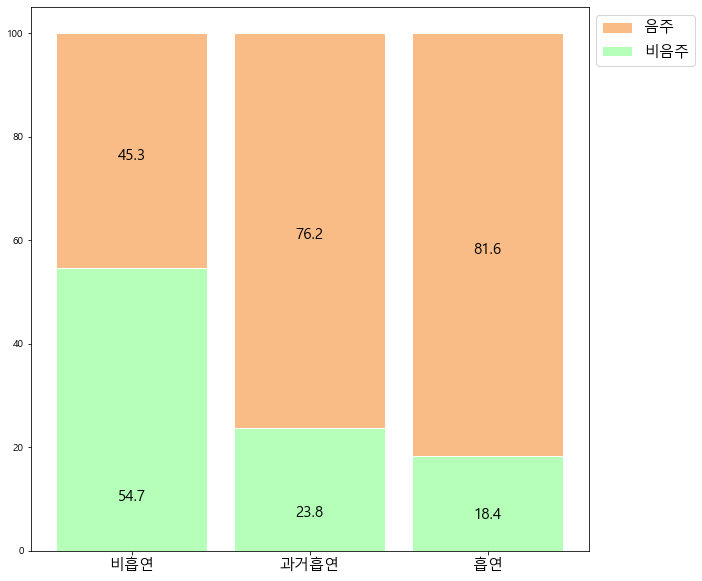

In [28]:
# From raw value to percentage
totals = [i+j for i,j in zip( smoke_drink_df[0], smoke_drink_df[1] )]
non_dr = [i / j * 100 for i,j in zip(smoke_drink_df[0], totals)]
dr = [i / j * 100 for i,j in zip(smoke_drink_df[1], totals)]

# plot 설정
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

# plot
barWidth = 0.85
names = ('비흡연','과거흡연','흡연')

# Create orange Bars
plot2=ax.bar(r, non_dr, color='#b5ffb9', edgecolor='white', width=barWidth, label="비음주")
plot1=ax.bar(r, dr, bottom=non_dr, color='#f9bc86', edgecolor='white', width=barWidth, label="음주")

# Add a legend : 범례순서
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, handles=[plot1,plot2], fontsize=15) 

# 숫자 넣는 부분 : 직접 조절
for rect1 in plot1:
    height1 = rect1.get_height() 
    plt.text(rect1.get_x() + rect1.get_width()/2.0, (100-height1)/2 + 49, '%.1f' % height1, ha='center', va='center', size = 15)
for rect2 in plot2:
    height2 = rect2.get_height()
    plt.text(rect2.get_x() + rect2.get_width()/2.0, height2/10+5, '%.1f' % height2, ha='center', va='center', size = 15)

# Custom x axis
plt.xticks(r, names, size=15)
plt.xlabel("", size=15)
 
# Show graphic
plt.show()

Text(9.05, 0.5, '혈색소')

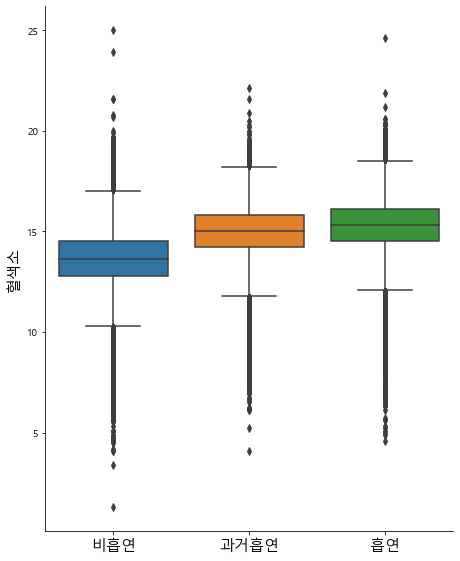

In [29]:
# 특정 수치형 변수 중 혈색소를 통해
# 재범주화의 근거를 댐
names = ('비흡연','과거흡연','흡연')

sns.catplot( data=df, x="흡연", y="혈색소", kind="box",height=8,aspect=0.8)

plt.xticks(r, names, size=15)
plt.xlabel("", size=15)
plt.ylabel("혈색소", size=15)

#### 재범주화 : 2(과거흡연),3(흡연) 값은 2(흡연)으로 재범주화
- 근거1 : 이론상 과거흡연을 했던 사람들은 흡연자들과 큰 차이가 없을 것이다.
- 근거2 : 시각화 상으로도 비흡연자들과 그 외의 집단으로 묶는 것이 적절해보인다.

In [30]:
df.loc[df['흡연']==3,'흡연'] = 2

In [31]:
df['흡연']=df['흡연'].astype('category')
df['흡연'].value_counts()

1.0    257713
2.0    144426
Name: 흡연, dtype: int64

In [32]:
# Data
r = [0,1]
raw_data = {'비음주': [ df[df['음주여부']==0]['흡연'].value_counts()[0],   
                          df[df['음주여부']==0]['흡연'].value_counts()[1] ], 
            '음주': [ df[df['음주여부']==1]['흡연'].value_counts()[0], 
                          df[df['음주여부']==1]['흡연'].value_counts()[1] ]}
smoke_dr_df = pd.DataFrame(raw_data).T

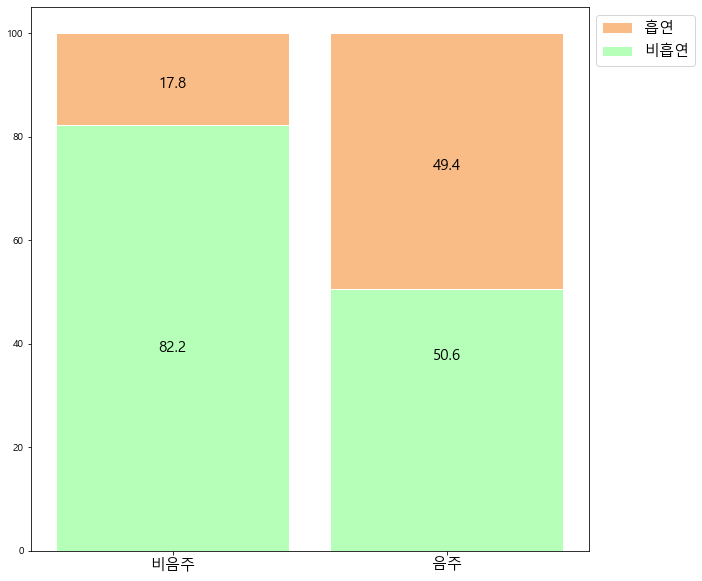

In [33]:
# From raw value to percentage
totals = [i+j for i,j in zip( smoke_dr_df[0], smoke_dr_df[1] )]
non_dr = [i / j * 100 for i,j in zip(smoke_dr_df[0], totals)]
dr = [i / j * 100 for i,j in zip(smoke_dr_df[1], totals)]

# plot 설정
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

# plot
barWidth = 0.85
names = ('비음주','음주')

# Create orange Bars
plot2=ax.bar(r, non_dr, color='#b5ffb9', edgecolor='white', width=barWidth, label="비흡연")
plot1=ax.bar(r, dr, bottom=non_dr, color='#f9bc86', edgecolor='white', width=barWidth, label="흡연")

# Add a legend : 범례순서
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, handles=[plot1,plot2], fontsize=15) 

# 숫자 넣는 부분 : 직접 조절
for rect1 in plot1:
    height1 = rect1.get_height() 
    plt.text(rect1.get_x() + rect1.get_width()/2.0, (100-height1)/2 + 49, '%.1f' % height1, ha='center', va='center', size = 15)
for rect2 in plot2:
    height2 = rect2.get_height()
    plt.text(rect2.get_x() + rect2.get_width()/2.0, height2/20+35, '%.1f' % height2, ha='center', va='center', size = 15)

# Custom x axis
plt.xticks(r, names, size=15)
plt.xlabel("", size=15)
 
# Show graphic
plt.show()

음주를 하는 집단이 비음주 집단에 비해 흡연자 비율이 높다.

### 성별

1은 남자, 2는 여자

In [34]:
df['성별'].value_counts()

2    205101
1    197038
Name: 성별, dtype: int64

In [35]:
print("원데이터 남자 비흡연자 비율은 %.2f" % (161494/(data.loc[data['성별']==1,'흡연'].value_counts().sum()) * 100))
print("원데이터 여자 비흡연자 비율은 %.2f" % (464644/(data.loc[data['성별']==2,'흡연'].value_counts().sum()) * 100))

원데이터 남자 비흡연자 비율은 31.63
원데이터 여자 비흡연자 비율은 94.99


In [36]:
# Data
r = [0,1]
raw_data = {'남자': [ df[df['성별']==1]['흡연'].value_counts()[0],   
                          df[df['성별']==1]['흡연'].value_counts()[1] ], 
            '여자': [ df[df['성별']==2]['흡연'].value_counts()[0], 
                          df[df['성별']==2]['흡연'].value_counts()[1] ]}
smoke_gender_df = pd.DataFrame(raw_data).T

In [37]:
smoke_gender_df

,0,1
남자,133506,63532
여자,194181,10920


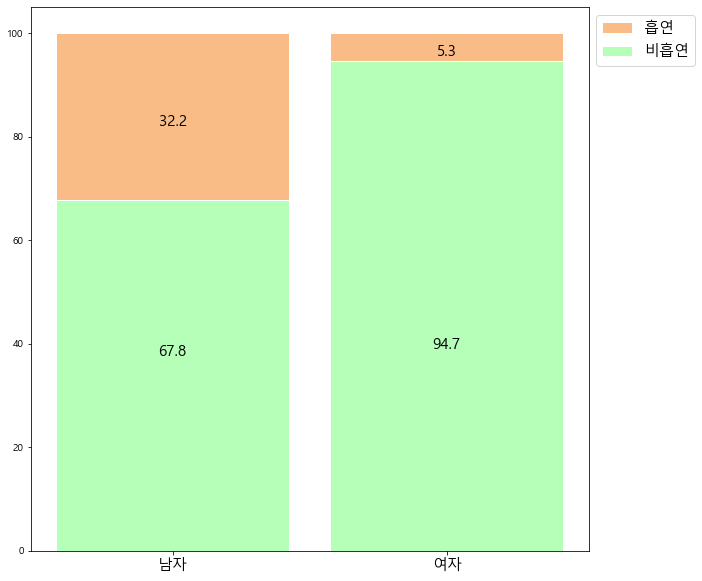

In [38]:
# From raw value to percentage
totals = [i+j for i,j in zip( smoke_gender_df[0], smoke_gender_df[1] )]
male = [i / j * 100 for i,j in zip(smoke_gender_df[0], totals)]
female = [i / j * 100 for i,j in zip(smoke_gender_df[1], totals)]

# plot 설정
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

# plot
barWidth = 0.85
names = ('남자','여자')

# Create orange Bars
plot2=ax.bar(r, male, color='#b5ffb9', edgecolor='white', width=barWidth, label="비흡연")
plot1=ax.bar(r, female, bottom=male, color='#f9bc86', edgecolor='white', width=barWidth, label="흡연")

# Add a legend : 범례순서
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, handles=[plot1,plot2], fontsize=15) 

# 숫자 넣는 부분 : 직접 조절
for rect1 in plot1:
    height1 = rect1.get_height() 
    plt.text(rect1.get_x() + rect1.get_width()/2.0, (100-height1)/2 + 49, '%.1f' % height1, ha='center', va='center', size = 15)
for rect2 in plot2:
    height2 = rect2.get_height()
    plt.text(rect2.get_x() + rect2.get_width()/2.0, height2/20+35, '%.1f' % height2, ha='center', va='center', size = 15)

# Custom x axis
plt.xticks(r, names, size=15)
plt.xlabel("", size=15)
 
# Show graphic
plt.show()

성별에 따른 흡연자 비율이 명확하게 차이가 난다. 여자는 남자에 비해 흡연자 비율이 매우 적다. 

### 연령대

연령대는 40세에서 90세까지 라벨링된 값 다시 풀어주기

In [39]:
df.loc[df['연령대']==9,'연령대']=40
df.loc[df['연령대']==10,'연령대']=45
df.loc[df['연령대']==11,'연령대']=50
df.loc[df['연령대']==12,'연령대']=55
df.loc[df['연령대']==13,'연령대']=60
df.loc[df['연령대']==14,'연령대']=65
df.loc[df['연령대']==15,'연령대']=70
df.loc[df['연령대']==16,'연령대']=75
df.loc[df['연령대']==17,'연령대']=80
df.loc[df['연령대']==18,'연령대']=85

In [40]:
df['연령대'].value_counts().sort_index()

40    85196
45    46689
50    48023
55    45660
60    89053
65    32412
70    23589
75    15553
80    14163
85     1801
Name: 연령대, dtype: int64

### 청력

1은 정상, 2는 비정상, 3은 측정불가

In [41]:
df['청력(좌)'].value_counts()

1.0    383114
2.0     18203
3.0       724
Name: 청력(좌), dtype: int64

In [42]:
df['청력(우)'].value_counts()

1.0    384100
2.0     17256
3.0       683
Name: 청력(우), dtype: int64

### 요단백

In [43]:
df['요단백'].value_counts()

1.0    369381
2.0     16755
3.0      9331
4.0      3312
5.0      1034
6.0       294
Name: 요단백, dtype: int64

- 1(-), 2(±), 3(+1), 4(+2), 5(+3), 6(+4)로 표기됨
- 시험지 검사: -(정상, <15mg/dL), ±(약산성, 15~30mg/dL), 1+(30mg/dL), 2+(100mg/dL), 3+(300mg/dL), 4+(1000mg/dL) 
- 이 때, 하루 300mg 이상의 단백질이 배출되면 단백뇨로 정의하므로, 5~6 범주를 5값으로 재범주화 


In [44]:
df.loc[  (df['요단백']==5) | (df['요단백']==6), '요단백'] = 5

In [45]:
df['요단백']=df['요단백'].astype('category')
df['요단백'].value_counts()

1.0    369381
2.0     16755
3.0      9331
4.0      3312
5.0      1328
Name: 요단백, dtype: int64

- 1(정상), 2(약산성), 3(1+), 4(2+), 5(단백뇨)

In [46]:
# Data
r = [0,1,2,3,4]
raw_data = {'정상': [ df[df['요단백']==1]['흡연'].value_counts()[0],   
                          df[df['요단백']==1]['흡연'].value_counts()[1] ], 
            '약산성': [ df[df['요단백']==2]['흡연'].value_counts()[0], 
                          df[df['요단백']==2]['흡연'].value_counts()[1] ],
           '1+': [ df[df['요단백']==3]['흡연'].value_counts()[0],   
                          df[df['요단백']==3]['흡연'].value_counts()[1] ], 
            '2+': [ df[df['요단백']==4]['흡연'].value_counts()[0], 
                          df[df['요단백']==4]['흡연'].value_counts()[1] ],
           '단백뇨': [ df[df['요단백']==5]['흡연'].value_counts()[0],   
                          df[df['요단백']==5]['흡연'].value_counts()[1] ]}
smoke_prot_df = pd.DataFrame(raw_data).T

In [47]:
smoke_prot_df

,0,1
정상,238535,130846
약산성,9846,6909
1+,5339,3992
2+,1837,1475
단백뇨,708,620


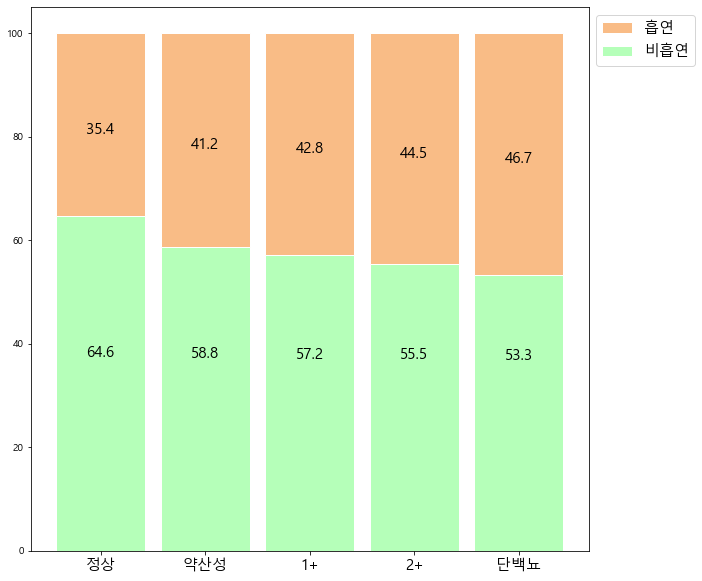

In [48]:
# From raw value to percentage
totals = [i+j for i,j in zip( smoke_prot_df[0], smoke_prot_df[1] )]
non_sm = [i / j * 100 for i,j in zip(smoke_prot_df[0], totals)]
sm = [i / j * 100 for i,j in zip(smoke_prot_df[1], totals)]

# plot 설정
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

# plot
barWidth = 0.85
names = ('정상','약산성','1+','2+','단백뇨')

# Create orange Bars
plot2=ax.bar(r, non_sm, color='#b5ffb9', edgecolor='white', width=barWidth, label="비흡연")
plot1=ax.bar(r, sm, bottom=non_sm, color='#f9bc86', edgecolor='white', width=barWidth, label="흡연")

# Add a legend : 범례순서
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, handles=[plot1,plot2], fontsize=15) 

# 숫자 넣는 부분 : 직접 조절
for rect1 in plot1:
    height1 = rect1.get_height() 
    plt.text(rect1.get_x() + rect1.get_width()/2.0, (100-height1)/2 + 49, '%.1f' % height1, ha='center', va='center', size = 15)
for rect2 in plot2:
    height2 = rect2.get_height()
    plt.text(rect2.get_x() + rect2.get_width()/2.0, height2/20+35, '%.1f' % height2, ha='center', va='center', size = 15)

# Custom x axis
plt.xticks(r, names, size=15)
plt.xlabel("", size=15)
 
# Show graphic
plt.show()

정상범주가 타 범주에 비해 표본수가 굉장히 많으며, 정상 외의 집단은 모두 비슷한 경향을 보임. 따라서 두 개의 집단으로 다시 한 번 재범주화

In [49]:
df.loc[  (df['요단백']==3) | (df['요단백']==4) | (df['요단백']==5) , '요단백'] = 2

In [50]:
df['요단백']=df['요단백'].cat.remove_unused_categories()

In [51]:
df['요단백'].value_counts()

1.0    369381
2.0     30726
Name: 요단백, dtype: int64

In [52]:
# Data
r = [0,1]
raw_data = {'정상': [ df[df['요단백']==1]['흡연'].value_counts()[0],   
                          df[df['요단백']==1]['흡연'].value_counts()[1] ], 
            '이상': [ df[df['요단백']==2]['흡연'].value_counts()[0], 
                          df[df['요단백']==2]['흡연'].value_counts()[1] ]}
smoke_prot2_df = pd.DataFrame(raw_data).T

In [53]:
smoke_prot2_df

,0,1
정상,238535,130846
이상,17730,12996


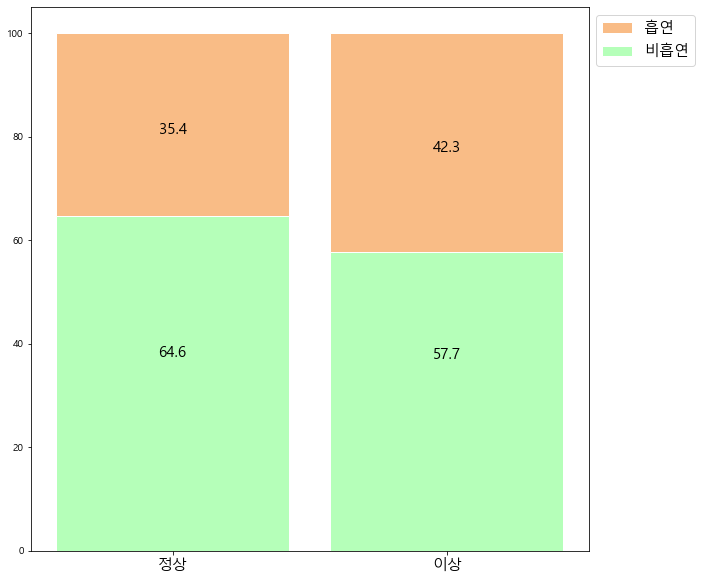

In [54]:
# From raw value to percentage
totals = [i+j for i,j in zip( smoke_prot2_df[0], smoke_prot2_df[1] )]
non_sm = [i / j * 100 for i,j in zip(smoke_prot2_df[0], totals)]
sm = [i / j * 100 for i,j in zip(smoke_prot2_df[1], totals)]

# plot 설정
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

# plot
barWidth = 0.85
names = ('정상','이상')

# Create orange Bars
plot2=ax.bar(r, non_sm, color='#b5ffb9', edgecolor='white', width=barWidth, label="비흡연")
plot1=ax.bar(r, sm, bottom=non_sm, color='#f9bc86', edgecolor='white', width=barWidth, label="흡연")

# Add a legend : 범례순서
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, handles=[plot1,plot2], fontsize=15) 

# 숫자 넣는 부분 : 직접 조절
for rect1 in plot1:
    height1 = rect1.get_height() 
    plt.text(rect1.get_x() + rect1.get_width()/2.0, (100-height1)/2 + 49, '%.1f' % height1, ha='center', va='center', size = 15)
for rect2 in plot2:
    height2 = rect2.get_height()
    plt.text(rect2.get_x() + rect2.get_width()/2.0, height2/20+35, '%.1f' % height2, ha='center', va='center', size = 15)

# Custom x axis
plt.xticks(r, names, size=15)
plt.xlabel("", size=15)
 
# Show graphic
plt.show()

두 집단에서 흡연과 비흡연의 차이가 있어 보이긴 하지만, 애매하므로 Chisq 독립성 검정(요단백,흡연) 진행

### Chisq 독립성 검정(요단백,흡연)

In [55]:
## Part2. Contingency Table & Chi-squaure Model
## 기초 테이블 형성
cont_table =smoke_prot2_df
 
## Part3. 카이제곱 독립성 검정 모델 선언
chi2, p_val, d_f, expected = chi2_contingency([cont_table.loc['정상'], cont_table.loc['이상']])
## 기대값 표 형성
ex = pd.DataFrame(expected, columns = ['non_smoker', 'smoker'], index = ['정상', '이상'])
 
print(  '  '
 , '[Chi-square Analysis Result Report]'
 , 'Chi-square: {}'.format(round(chi2, 2))
 , 'P-value: {}'.format(round(p_val, 4))
 , '--------------------------'
 , 'Expected Values'
 , round(ex,2)
 , '--------------------------'
 , 'Observed Values'
 , cont_table
 , '=========================='
 , ' '
 
 , sep = '\n'
 )

  
[Chi-square Analysis Result Report]
Chi-square: 581.7
P-value: 0.0
--------------------------
Expected Values
    non_smoker     smoker
정상   236585.27  132795.73
이상    19679.73   11046.27
--------------------------
Observed Values
         0       1
정상  238535  130846
이상   17730   12996
 


귀무가설 "H0: 요단백과 흡연은 독립이다."는 유의수준 0.05 하에서 기각할 근거가 충분하다. 성별과 흡연은 독립적이지 않고, 종속이다. 2개로 재범주화한 것 타당하며 흡연과 관계도 있음. 

### 음주여부

0은 음주안함, 1은 음주함

In [56]:
df['음주여부'].value_counts()

1.0    230555
0.0    171522
Name: 음주여부, dtype: int64

### 범주형 변수로 변환

In [57]:
df['흡연']=df['흡연'].astype('category')
df['성별']=df['성별'].astype('category')
df['연령대']=df['연령대'].astype('category')
df['청력(좌)']=df['청력(좌)'].astype('category')
df['청력(우)']=df['청력(우)'].astype('category')
df['음주여부']=df['음주여부'].astype('category')


#### 범주형 변수 시각화

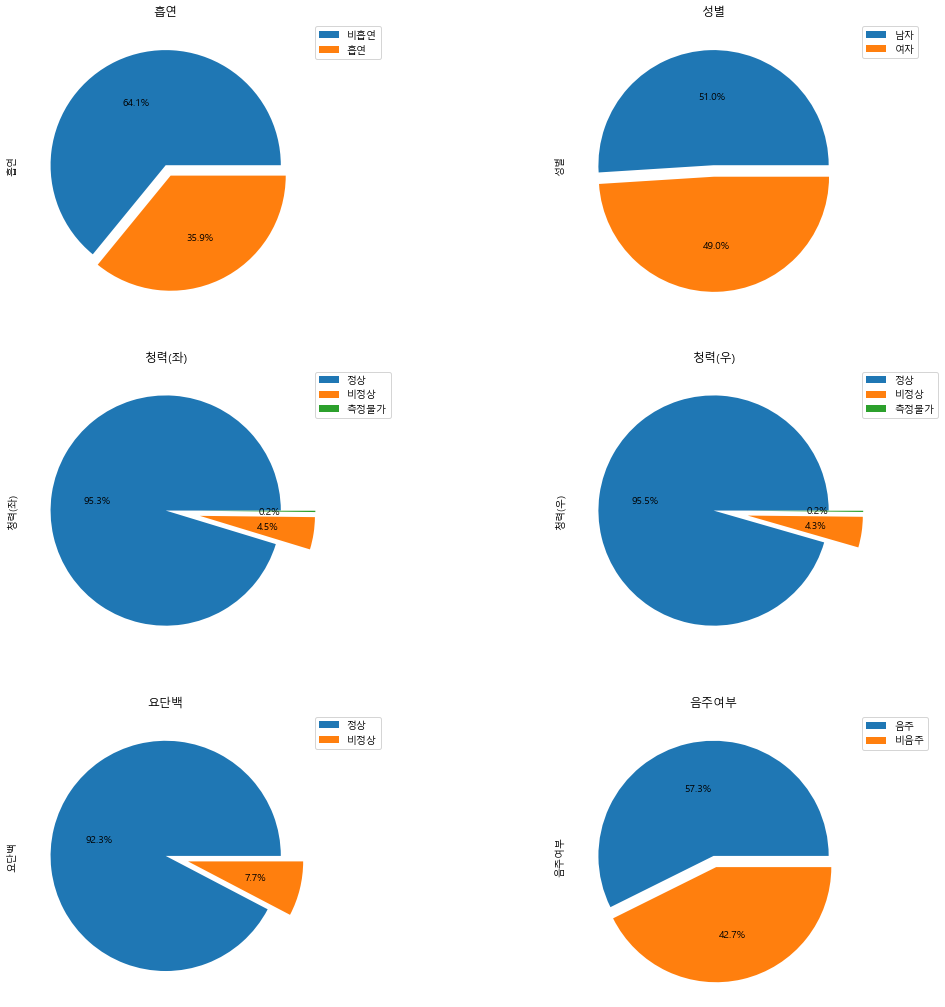

In [58]:
plt.figure(figsize = [18,18], clear = True)

plt.subplot(321)
df['흡연'].value_counts().plot(kind='pie', autopct = '%.1f%%', explode = [0, 0.1], labels=None)
plt.title('흡연')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1 , 
           labels=["비흡연", "흡연"], fontsize=10)

plt.subplot(322)
df['성별'].value_counts().plot(kind='pie', autopct = '%.1f%%', explode = [0, 0.1], labels=None)
plt.title('성별')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1 , 
           labels=["남자", "여자"], fontsize=10)

plt.subplot(323)
df['청력(좌)'].value_counts().plot(kind='pie', autopct = '%.1f%%', explode = [0, 0.3, 0.3], labels=None)
plt.title('청력(좌)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1 , 
           labels=["정상", "비정상","측정불가"], fontsize=10)

plt.subplot(324)
df['청력(우)'].value_counts().plot(kind='pie', autopct = '%.1f%%', explode = [0, 0.3, 0.3], labels=None)
plt.title('청력(우)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1 , 
           labels=["정상", "비정상","측정불가"], fontsize=10)

plt.subplot(325)
df['요단백'].value_counts().plot(kind='pie', autopct = '%.1f%%', explode = [0, 0.2], labels=None)
plt.title('요단백')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1 , 
           labels=["정상", "비정상"], fontsize=10)

plt.subplot(326)
df['음주여부'].value_counts().plot(kind='pie', autopct = '%.1f%%', explode = [0, 0.1], labels=None)
plt.title('음주여부')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1 , 
           labels=["음주", "비음주"], fontsize=10)



plt.show()

수치형 변수와 범주형 변수 분류

In [59]:
category_feature = df.select_dtypes(include='category').columns

In [60]:
print(len(category_feature))
category_feature

7


Index(['성별', '연령대', '청력(좌)', '청력(우)', '요단백', '흡연', '음주여부'], dtype='object')

In [61]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_features=df.select_dtypes(include=numerics).columns

In [62]:
print(len(numerical_features))
numerical_features

17


Index(['신장', '체중', '허리둘레', '시력(좌)', '시력(우)', '수축기', '이완기', '공복혈당', '총콜레스테롤',
       '트리글리세라이드', 'hdl', 'ldl', '혈색소', '혈청크레아티닌', 'ast', 'alt', 'gpt'],
      dtype='object')

## 수치형 변수 처리

<AxesSubplot:>

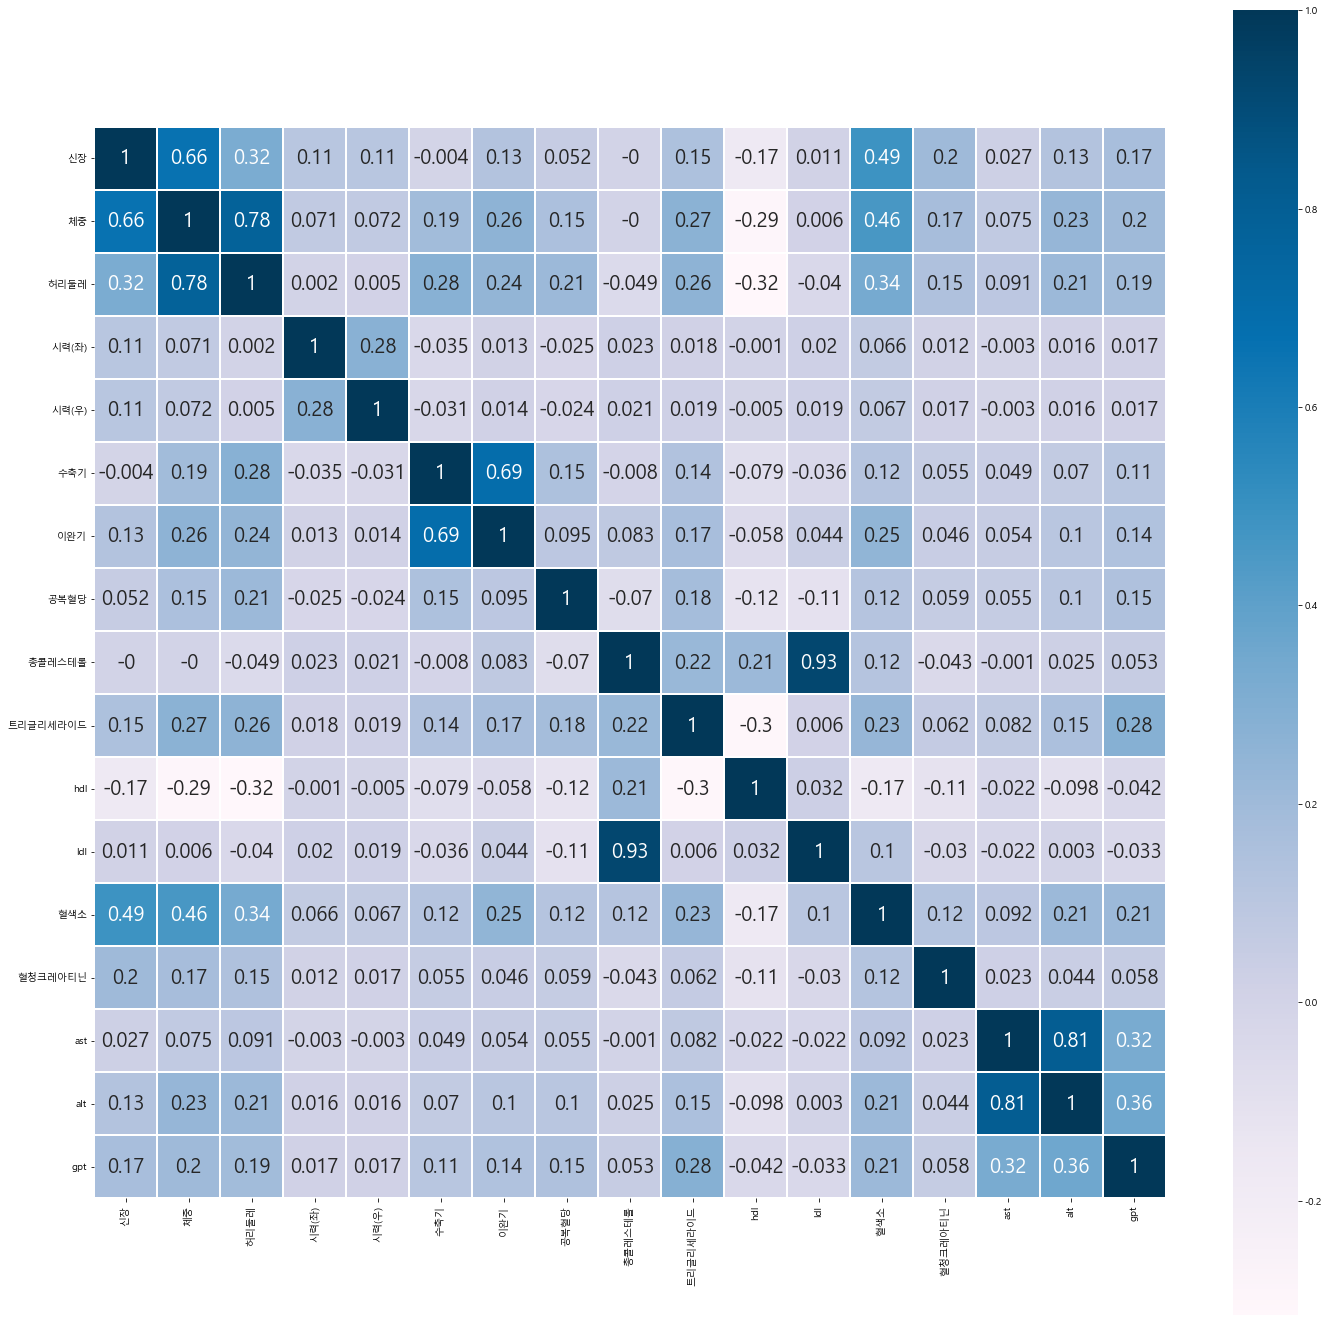

In [63]:
colormap = plt.cm.PuBu
plt.figure(figsize = [24, 24], clear = True, facecolor = "white")
# different colormap

sns.heatmap(round( df[numerical_features].corr(), 3 ), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 20})

- (신체정보 : 신장과 체중, 허리둘레)가 서로 상관계수가 크고 파생변수를 생성하거나 변수를 줄일 필요가 있음.
- (신체정보 : 신장과 체중, 허리둘레)가 혈색소에 대해 0.5에 가까운 상관계수를 갖고 있음.
- 좌,우 시력의 상관성은 그렇게 크지는 않음(0.28).
- 콜레스테롤 변수 계열 중 "총콜레스테롤"과 "ldl"의 상관성이 매우 큼
- 간수치 변수 계열 중 "ast"와 "alt"의 상관성이 매우 큼
- (간수치 변수 : ast, alt, gtp)가 서로 상관성이 있음. 간수치에 대한 파생변수를 생성하거나 변수를 줄일 필요가 있음.

In [64]:
df[numerical_features].describe()

,신장,체중,허리둘레,시력(좌),시력(우),수축기,이완기,공복혈당,총콜레스테롤,트리글리세라이드,hdl,ldl,혈색소,혈청크레아티닌,ast,alt,gpt
count,402139.000000,402139.000000,402079.000000,402019.000000,402023.000000,402129.000000,402129.000000,402139.000000,402139.000000,402139.000000,402139.000000,394297.000000,402132.000000,402139.000000,402139.000000,402138.000000,402138.000000
mean,160.704010,62.751859,82.247045,0.926994,0.929863,124.797993,76.626742,104.096509,198.458488,133.840176,56.767566,115.825271,14.169038,0.850387,27.828132,26.695901,37.131470
std,9.209452,12.300228,9.786217,0.650889,0.664638,14.872161,10.019079,25.303263,43.211843,99.990216,16.515541,39.185834,1.561213,0.409375,26.020732,27.295376,50.681814
min,130.000000,30.000000,8.700000,0.100000,0.100000,64.000000,31.000000,35.000000,54.000000,2.000000,1.000000,1.000000,1.300000,0.000000,1.000000,1.000000,1.000000
25%,155.000000,55.000000,75.900000,0.700000,0.700000,115.000000,70.000000,91.000000,170.000000,77.000000,46.000000,89.000000,13.200000,0.700000,20.000000,16.000000,16.000000
50%,160.000000,60.000000,82.000000,0.900000,0.900000,124.000000,77.000000,99.000000,197.000000,110.000000,55.000000,115.000000,14.100000,0.800000,24.000000,21.000000,24.000000
75%,170.000000,70.000000,88.900000,1.000000,1.000000,134.000000,83.000000,109.000000,225.000000,160.000000,65.000000,140.000000,15.300000,1.000000,30.000000,31.000000,39.000000
max,195.000000,135.000000,999.000000,9.900000,9.900000,260.000000,178.000000,901.000000,2416.000000,6999.000000,960.000000,2395.000000,25.000000,95.000000,8270.000000,5990.000000,1731.000000


### 허리둘레 : 이상치 처리

In [65]:
print( '허리둘레가 999로 표현된 행은 %d개' % len(df.loc[df['허리둘레']==999]) )
df.loc[df['허리둘레']==999]

허리둘레가 999로 표현된 행은 1개


,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기,이완기,공복혈당,총콜레스테롤,트리글리세라이드,hdl,ldl,혈색소,요단백,혈청크레아티닌,ast,alt,gpt,흡연,음주여부
484092,2,40,160,60,999.0,1.5,1.5,1.0,1.0,118.0,74.0,76.0,270.0,298.0,78.0,132.0,11.2,1.0,0.4,16.0,9.0,5.0,1.0,0.0


In [66]:
# 허리둘레 999는 NA로 처리
df.loc[df['허리둘레']==999,'허리둘레']=np.nan

### 시력 : 이상치 처리

In [67]:
print( '시력(좌)가 9.9로 표현된 행은 %d개' % len(df.loc[df['시력(좌)']==9.9]) )
print( '시력(우)가 9.9로 표현된 행은 %d개' % len(df.loc[df['시력(우)']==9.9]) )
print( '시력이 9.9로 표현된 행은 %d개' % len(df.loc[ (df['시력(좌)']==9.9) | (df['시력(우)']==9.9) ]) )

시력(좌)가 9.9로 표현된 행은 1579개
시력(우)가 9.9로 표현된 행은 1674개
시력이 9.9로 표현된 행은 2976개


In [68]:
df.loc[ df['시력(좌)']==9.9, '시력(좌)' ]=np.nan
df.loc[ df['시력(우)']==9.9, '시력(우)' ]=np.nan

# 시각화

### 시각화 : (신체정보 : 신장, 체중, 허리둘레, 시력)

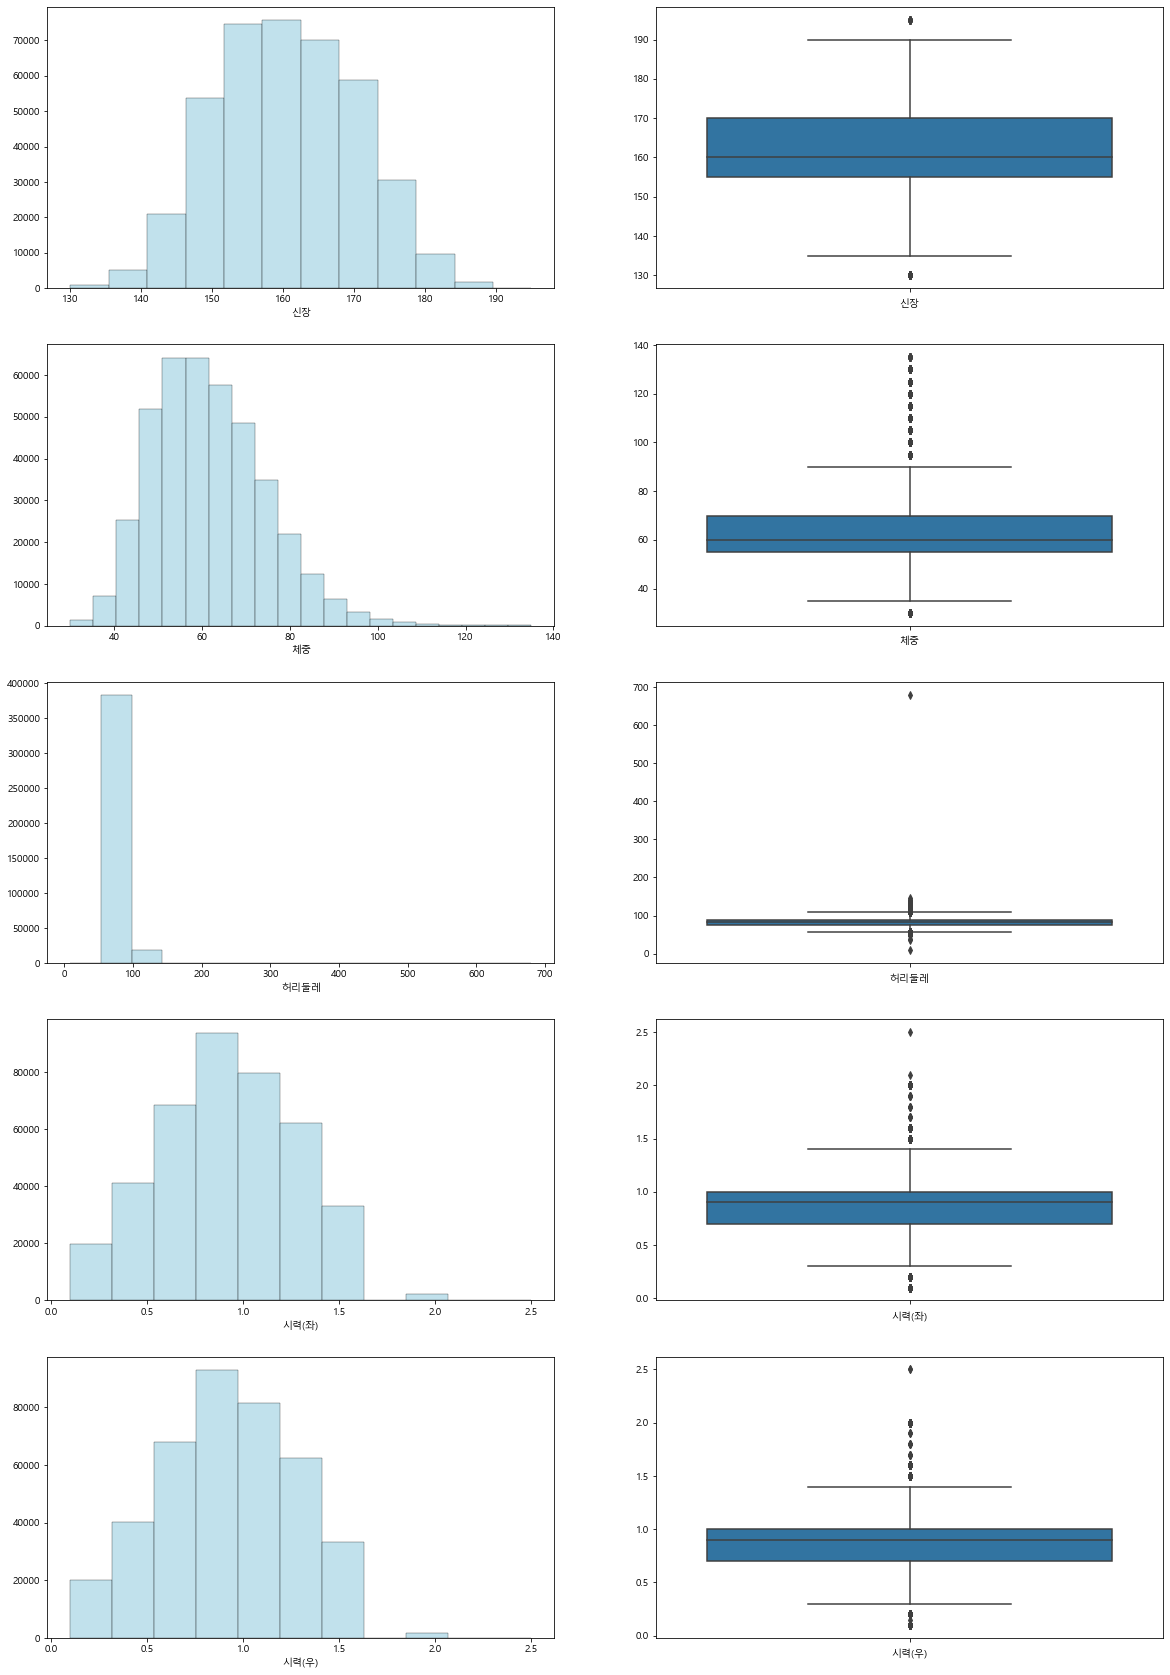

In [69]:
bins1=[ 12, 20, 15, 11, 11 ]

plt.figure(figsize=(20,30))
for idx, col in enumerate( df[numerical_features].columns[0:5] ):
    
    plt.subplot( 5,2,2*idx+1 )
    sns.histplot(df[col], bins=bins1[idx], color='lightblue', linewidth=0.3)
    plt.xlabel(col)
    plt.ylabel('')
    
    plt.subplot( 5,2,2*idx+2 )
    sns.boxplot(y=df[col])
    plt.xlabel(col)
    plt.ylabel('')

plt.show()

- 과해보이는 허리둘레 값 600 발견

In [70]:
df.loc[df['허리둘레']>600] #가능한 값일까?

,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기,이완기,공복혈당,총콜레스테롤,트리글리세라이드,hdl,ldl,혈색소,요단백,혈청크레아티닌,ast,alt,gpt,흡연,음주여부
590866,2,40,155,45,680.0,1.2,1.2,1.0,1.0,99.0,64.0,99.0,177.0,40.0,89.0,80.0,11.9,2.0,0.6,15.0,12.0,11.0,1.0,0.0


위의 값은 이상치로 판단되므로 NA처리

In [71]:
df.loc[df['허리둘레']>600,'허리둘레']=np.nan

In [72]:
df['허리둘레'].isna().sum() # 뒤에서 NA처리

62

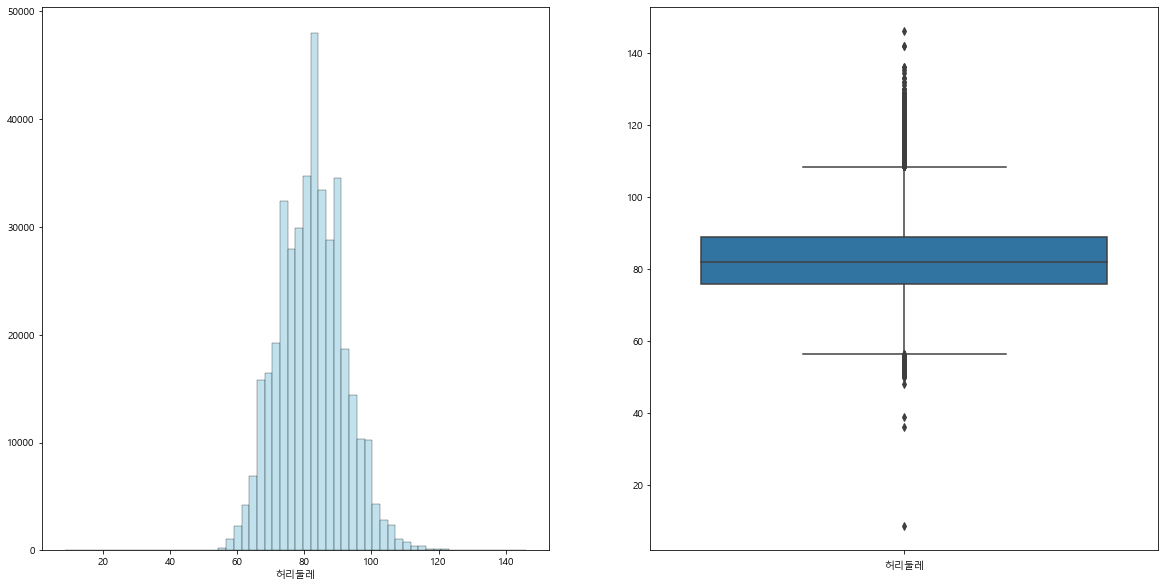

In [73]:
# 허리둘레 다시 시각화
plt.figure(figsize=(20,10))
    
plt.subplot( 1,2,1 )
sns.histplot(df['허리둘레'], bins=60, color='lightblue', linewidth=0.3)
plt.xlabel("허리둘레")
plt.ylabel('')
    
plt.subplot( 1,2,2 )
sns.boxplot(y=df['허리둘레'])
plt.xlabel("허리둘레")
plt.ylabel('')

plt.show()

### 시각화 : (혈압정보 : 수축기, 이완기)

- 대학의학회, 질병관리본부, "고혈압 가이드라인 일차 의료용 요약 정보"

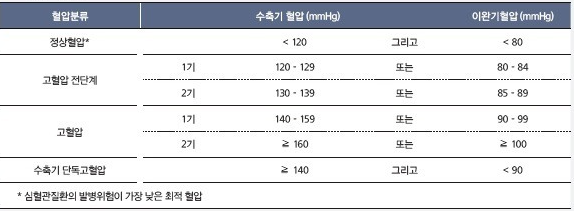

In [74]:
Image.open("C:/Users/vz050/OneDrive/바탕 화면/모델링2_프젝/image.png")

In [75]:
print(np.percentile(df['수축기'].dropna(), [5,95,99,99.9], interpolation='nearest'))
print(np.percentile(df['이완기'].dropna(), [5,95,99,99.9], interpolation='nearest'))

[101. 150. 165. 188.]
[ 60.  93. 102. 117.]


- 고혈압 수치보다도 한참 높은 수치에 해당되는 0.1 percentile만큼 이상치로 간주하여 행 삭제

In [76]:
#755개의 행 삭제
drop_index1 = df[(df['수축기'] >= 188)|(df['이완기'] >= 117)].index
len(drop_index1)

712

In [77]:
df.drop(drop_index1 , inplace=True)

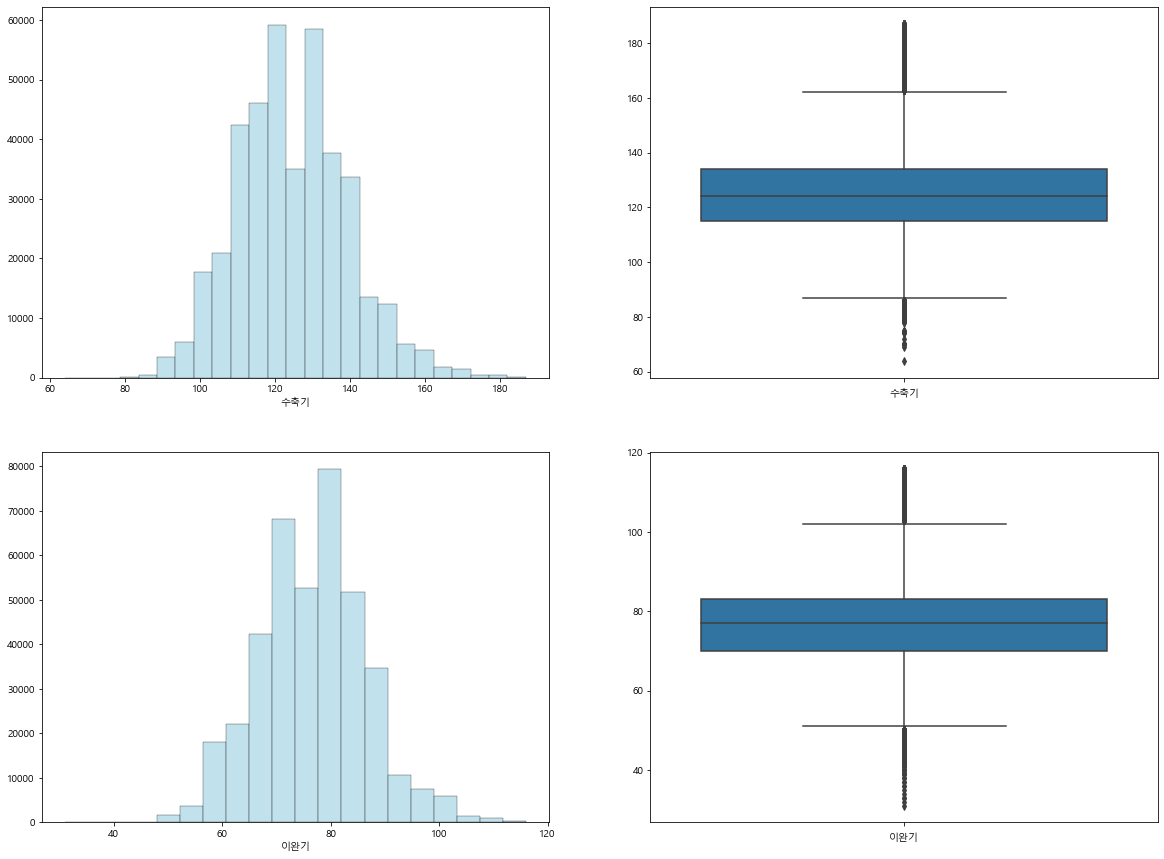

In [78]:
bins2=[ 25, 20 ]

plt.figure(figsize=(20,15))
for idx, col in enumerate( df[numerical_features].columns[5:7] ):
    
    plt.subplot( 2,2,2*idx+1 )
    sns.histplot(df[col], bins=bins2[idx], color='lightblue', linewidth=0.3)
    plt.xlabel(col)
    plt.ylabel('')
    
    plt.subplot( 2,2,2*idx+2 )
    sns.boxplot(y=df[col])
    plt.xlabel(col)
    plt.ylabel('')

plt.show()

In [79]:
#현실에서 있을 법한 수치인지 확인
df.loc[:,['수축기','이완기']].describe()

,수축기,이완기
count,401417.000000,401417.000000
mean,124.690982,76.560574
std,14.648167,9.885366
min,64.000000,31.000000
25%,115.000000,70.000000
50%,124.000000,77.000000
75%,134.000000,83.000000
max,187.000000,116.000000


In [80]:
df.loc[df['수축기']>160,['수축기','이완기']].describe()

,수축기,이완기
count,5290.000000,5290.000000
mean,168.479773,93.734972
std,6.188694,10.969461
min,161.000000,50.000000
25%,164.000000,87.000000
50%,167.000000,94.000000
75%,171.000000,101.000000
max,187.000000,116.000000


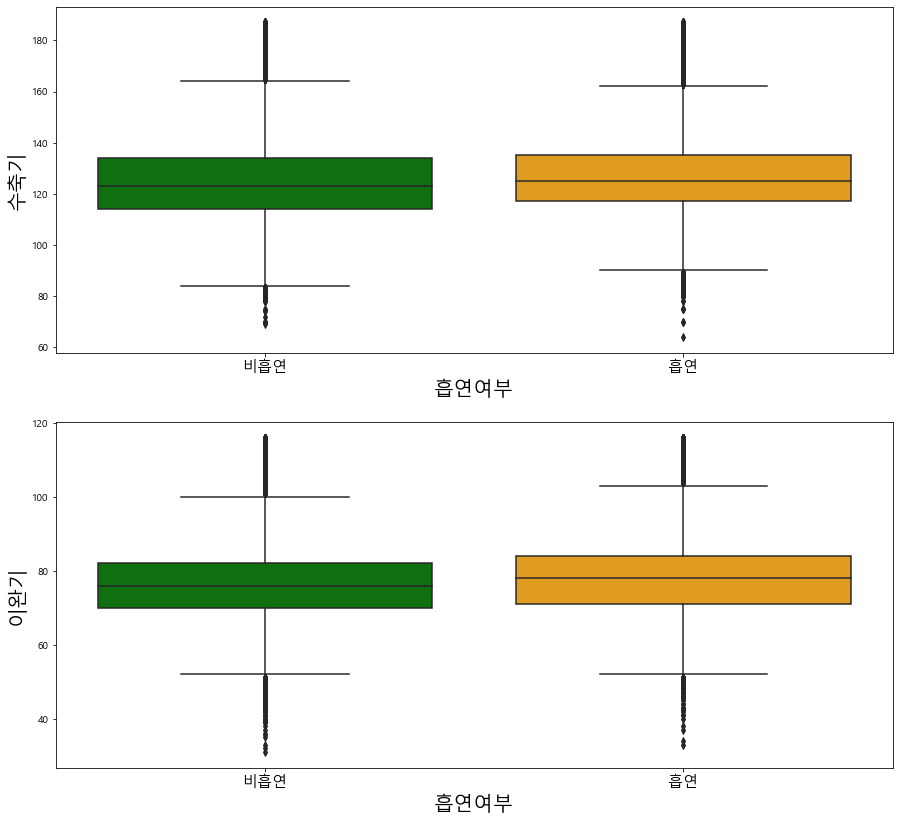

In [81]:
plt.figure(figsize=(15,14))

plt.subplot( 2,1,1 )
sns.boxplot(x="흡연", y="수축기", palette=["green", "orange"], data=df)
plt.xticks([0, 1],['비흡연', '흡연'],size=15)
plt.xlabel("흡연여부", size=20)
plt.ylabel("수축기", size=20)

plt.subplot( 2,1,2 )
sns.boxplot(x="흡연", y="이완기", palette=["green", "orange"], data=df)
plt.xticks([0, 1],['비흡연', '흡연'],size=15)
plt.xlabel("흡연여부", size=20)
plt.ylabel("이완기", size=20)

plt.show()

#### 흡연 집단에 따른 수축기 혈압 차이 확인

- 정규성은 분포형태로 확인

In [82]:
#등분산 검정(bartlett test)
#귀무가설 H0: 흡연, 비흡연 두 집단의 수축기 분산은 같다
bartlett(df.loc[df['흡연']==1,"수축기"],df.loc[df['흡연']==2,"수축기"])

BartlettResult(statistic=1293.7282121083615, pvalue=2.6071840494057615e-283)

유의수준 0.05하에 H0를 기각할 근거가 충분하다. 즉, 두 집단의 분산은 다르다. 

In [83]:
# 이분산 T-test
#귀무가설 H0: 흡연, 비흡연 두 집단의 수축기 평균은 같다
#대립가설 H1: 흡연, 비흡연 두 집단의 수축기 평균은 다르다
stats.ttest_ind( df.loc[df['흡연']==1,"수축기"].dropna(), 
                df.loc[df['흡연']==2,"수축기"].dropna(), 
                equal_var= False, alternative="two-sided")

Ttest_indResult(statistic=-32.059419941613086, pvalue=3.7041722694968e-225)

유의수준 0.05하에 H0를 기각할 근거가 충분하다. 즉, 두 집단의 평균은 다르다.

In [84]:
#귀무가설 H0: 흡연, 비흡연 두 집단의 수축기 평균은 같다
#대립가설 H1: 비흡연 집단의 수축기 평균이 흡연 집단보다 작다
stats.ttest_ind( df.loc[df['흡연']==1,"수축기"].dropna(), 
                df.loc[df['흡연']==2,"수축기"].dropna(), 
                equal_var= False, alternative="less")

Ttest_indResult(statistic=-32.059419941613086, pvalue=1.8520861347484e-225)

유의수준 0.05하에 H0를 기각할 근거가 충분하다. 즉, 비흡연 집단의 수축기 평균이 흡연 집단보다 작다

#### 흡연 집단에 따른 수축기 혈압 차이 확인

In [85]:
#등분산 검정(bartlett test)
#귀무가설 H0: 흡연, 비흡연 두 집단의 이완기 분산은 같다
bartlett(df.loc[df['흡연']==1,"이완기"],df.loc[df['흡연']==2,"이완기"])

BartlettResult(statistic=1.007285136702825, pvalue=0.31555411584874726)

유의수준 0.05하에 H0를 기각할 근거가 충분하지 않다. 즉, 두 집단의 분산은 같다. 

In [86]:
# 등분산 T-test
#귀무가설 H0: 흡연, 비흡연 두 집단의 이완기 평균은 같다
#대립가설 H1: 흡연, 비흡연 두 집단의 이완기 평균은 다르다
stats.ttest_ind( df.loc[df['흡연']==1,"이완기"].dropna(), 
                df.loc[df['흡연']==2,"이완기"].dropna(), alternative="two-sided")

Ttest_indResult(statistic=-74.40766761765973, pvalue=0.0)

유의수준 0.05하에 H0를 기각할 근거가 충분하다. 즉, 두 집단의 평균은 다르다.

In [87]:
#귀무가설 H0: 흡연, 비흡연 두 집단의 이완기 평균은 같다
#대립가설 H1: 비흡연 집단의 이완기 평균이 흡연 집단보다 작다
stats.ttest_ind( df.loc[df['흡연']==1,"이완기"].dropna(), 
                df.loc[df['흡연']==2,"이완기"].dropna(), 
                equal_var= False, alternative="less")

Ttest_indResult(statistic=-74.45665804131524, pvalue=0.0)

유의수준 0.05하에 H0를 기각할 근거가 충분하다. 즉, 비흡연 집단의 이완기 평균이 흡연 집단보다 작다

- 따라서, 수축기 혈압과 이완기 혈압수치는 모두 흡연자 집단에서 조금 더 크게 나타남을 알 수 있다. 상관관계에서도 알 수 있다시피 경향성 비슷.

## 시각화 : (콜레스테롤 정보 : '총콜레스테롤',  '트리글리세라이드',  'hdl',  'ldl')

### <콜레스테롤 변수>
- 방법1) 총콜레스테롤 변수가 ldl 변수와 상관관계도 매우 높을뿐만 아니라, 전반적인 콜레스테롤 정보의 합이라고 볼 수 있으므로 제거
- 방법2) 군집화를 통해 네 가지의 콜레스테롤 변수를 파생변수로 변환
- 방법1을 선택

<총콜레스테롤>
- 혈청 중의 에스텔형, 비에스테형(유리)콜레스테롤의 합
- 정상치는 150 ~ 250mg/dL 약 1/3이 비에스텔형(유리)콜레스테롤이며 나머지가 콜레스테롤에스테르 
---------------------------------
<트리글리세라이드>
- 단순지질 혹은 중성지질을 뜻함
- 글리세롤에 3분자 지방산이 에스테르 합한 것으로서 자연계에서 찾아낼 수 있는 지방유도체 가운데 가장 분포가 넓음
- 정상치는 30 ~ 135mg/dL(0.34~1.52-mmol/ℓ)  
- 트리클리세라이드항목은 2008년부터 건강검진 문진항목으로 추가되었기 때문에, 기준년도가 2002년부터 2007년까지 인 경우 해당 항목 값이 결측 처리되어 제공됨
---------------------------------
< hdl >
- HDL(고밀도 리포단백질)에 포함되는 콜레스테롤
- 작은 입자의 콜레스테롤로 세포에 이끌려간 콜레스테롤을 간으로 돌려주고 혈관 벽에 쌓인 나쁜 콜레스테롤을 없애는 역할을 하는 성분
- 정상치는 30 ~ 65mg/dL
- HDL콜레스테롤 항목은 2008년부터 건강검진 문진항목으로 추가되었기 때문에, 기준년도가 2002년부터 2007년까지 인 경우 해당 항목 값이 결측 처리되어 제공됨
    
---------------------------------
< ldl >
- LDL(저밀도 리포단백질)에 함유된 콜레스테롤
- 입자가 매우 큰 콜레스테롤로 양이 과도하게 증가할 경우,혈관벽에 쌓여서 동맥경화나 각종 질병을 야기 하는 성분
- 170mg/dL 이상일 경우 일반적으로 고LDL혈증으로 봄
- 정상치 130mg/dL 이하
- LDL콜레스테롤 항목은 2008년부터 건강검진 문진항목으로 추가되었기 때문에,기준년도가 2002년부터 2007년까지 인 경우 해당 항목 값이 결측 처리되어 제공됨

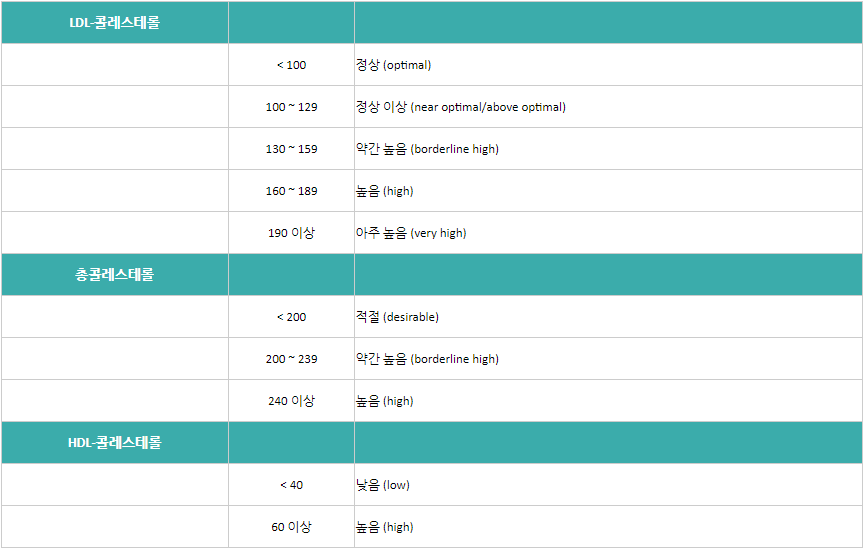

In [88]:
img=Image.open("C:/Users/vz050/OneDrive/바탕 화면/모델링2_프젝/image1.png")
img

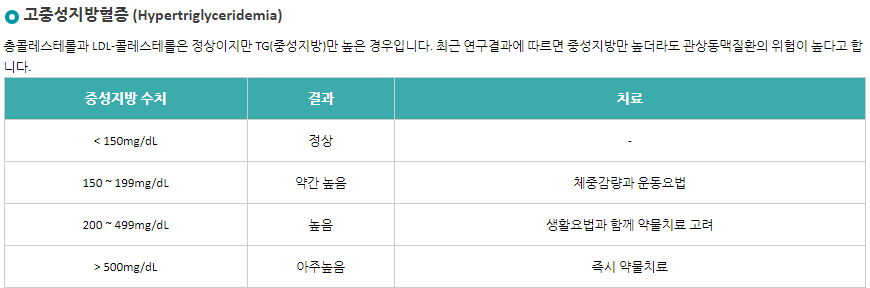

In [89]:
img3=Image.open("C:/Users/vz050/OneDrive/바탕 화면/모델링2_프젝/image3.png")
img3


- 총 콜레스테롤 수치 계산법

LDL + HDL + (중성지방/5) = 총 콜레스테롤

자신의 혈액검사 결과지를 보고 총 콜레스테롤 수치 계산법에 대입해 계산하면 자신의 콜레스테롤 수치에 대해 정확하게 알 수 있다.

예를 들어 LDL이 100, HDL이 60, 중성지방이 150이라면 100+60+(150/5) = 190이 될 것이다.

수식을 통한 계산법을 이해하기 어렵다면 인터넷을 통해 총콜레스테롤 수치를 계산해주는 웹페이지를 통해 쉽게 계산 할 수 있다.

---------------------------------
과거에는 총콜레스테롤 수치만 놓고 질병을 진단하는 경우가 많았지만 최근에는 LDL, HDL, 중성지방 각 수치를 따로 분석해 질병을 진단하고 예방하고 있다.

예를 들어 총콜레스테롤 수치는 200 mg/dL 이하지만 중성지방 혹은 LDL 콜레스테롤 수치가 경계치 혹은 위험치라면 체내 콜레스테롤이 정상 범주에 있다고 보기 어렵기 때문이다.

이러한 이유로 최근에는 고지혈증 대신 이상지질혈증이라고 부르며 고콜레스테롤혈증, 고중성지방혈증, 저고밀도지단백혈증 등으로 세분화 시켜 예방하고 관리한다.

LDL 콜레스테롤 수치 낮춰야 행복하다

In [90]:
df[['총콜레스테롤','트리글리세라이드','hdl','ldl']].describe()

,총콜레스테롤,트리글리세라이드,hdl,ldl
count,401427.000000,401427.000000,401427.000000,393627.000000
mean,198.426553,133.749736,56.768933,115.806830
std,42.991243,99.865504,16.518137,38.925495
min,54.000000,2.000000,1.000000,1.000000
25%,170.000000,77.000000,46.000000,89.000000
50%,197.000000,110.000000,55.000000,115.000000
75%,225.000000,160.000000,65.000000,140.000000
max,2416.000000,6999.000000,960.000000,2395.000000


In [91]:
df[numerical_features].columns[8:12] 

Index(['총콜레스테롤', '트리글리세라이드', 'hdl', 'ldl'], dtype='object')

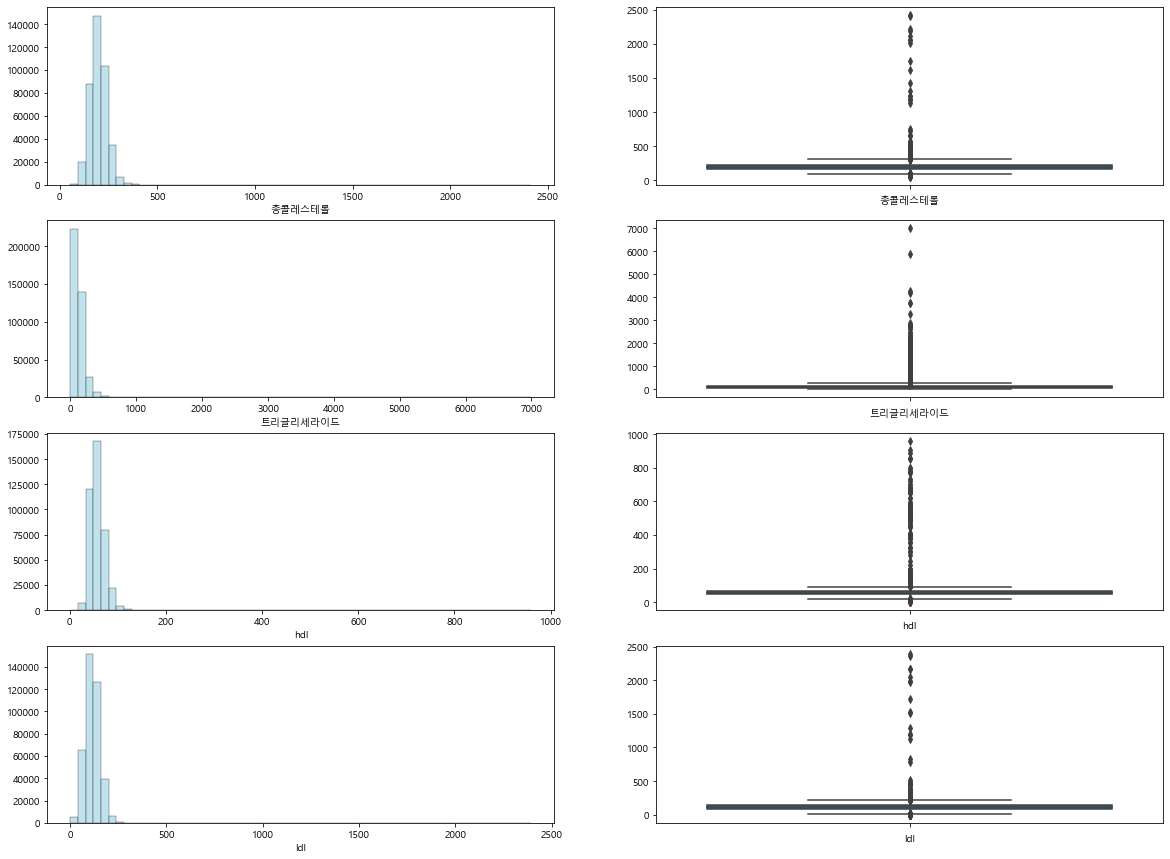

In [92]:
bins3=[ 60, 60, 60, 60 ]

plt.figure(figsize=(20,15))
for idx, col in enumerate( df[numerical_features].columns[8:12] ):
    
    plt.subplot( 4,2,2*idx+1 )
    sns.histplot(df[col], bins=bins3[idx], color='lightblue', linewidth=0.3)
    plt.xlabel(col)
    plt.ylabel('')
    
    plt.subplot( 4,2,2*idx+2 )
    sns.boxplot(y=df[col])
    plt.xlabel(col)
    plt.ylabel('')

plt.show()

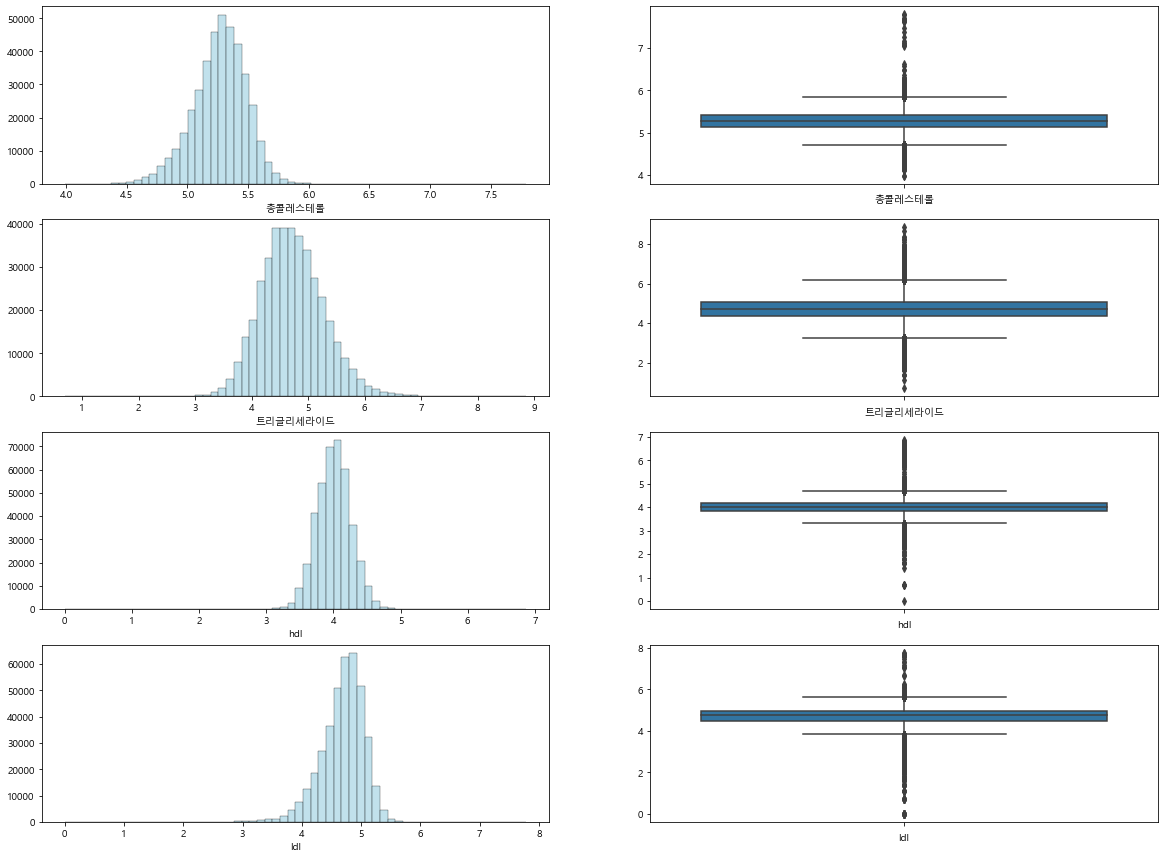

In [93]:
bins3_2=[ 60, 60, 60, 60 ]

plt.figure(figsize=(20,15))
for idx, col in enumerate( df[numerical_features].columns[8:12] ):
    
    plt.subplot( 4,2,2*idx+1 )
    sns.histplot(np.log(df[col]), bins=bins3_2[idx], color='lightblue', linewidth=0.3)
    plt.xlabel(col)
    plt.ylabel('')
    
    plt.subplot( 4,2,2*idx+2 )
    sns.boxplot(y=np.log(df[col]))
    plt.xlabel(col)
    plt.ylabel('')

plt.show()

In [94]:
df.isna().sum()

성별             0
연령대            0
신장             0
체중             0
허리둘레          62
시력(좌)       1696
시력(우)       1782
청력(좌)         98
청력(우)        100
수축기           10
이완기           10
공복혈당           0
총콜레스테롤         0
트리글리세라이드       0
hdl            0
ldl         7800
혈색소            7
요단백         2027
혈청크레아티닌        0
ast            0
alt            1
gpt            1
흡연             0
음주여부          62
dtype: int64

- 2012년부터 LDL콜레스테롤의 계산 값과 측정치 값이 통합됨. 총콜레스테롤, HDL콜레스테롤, 트리글리세라이드 수치로 계산하되, 트리글리세라이드 측정값이 400mg/dl 이상인 경우 실측정한 값이 들어감
- 그러나, 트리글리세라이드가 400이상인 행들의 ldl 실측값이 모두 NA인 것으로 확인됨.
- 도메인을 활용하여 트리글리세라이드가가 800미만인 값을 갖는 행들까지는 공식으로 계산된 ldl을 사용
- 트리글리세라이드가가 800이상인 값을 갖는 행들은 삭제

In [95]:
df.loc[df['트리글리세라이드']>=400,['ldl','트리글리세라이드']]

,ldl,트리글리세라이드
130,NaN,447.0
154,NaN,528.0
335,NaN,437.0
392,NaN,509.0
774,NaN,509.0
...,...,...
999184,NaN,528.0
999470,NaN,471.0
999523,NaN,776.0
999617,NaN,1937.0


In [96]:
df.loc[df['트리글리세라이드']>=400,['ldl','트리글리세라이드']].isna().sum()

ldl         7494
트리글리세라이드       0
dtype: int64

In [97]:
df.loc[df['트리글리세라이드']>=800,['ldl','트리글리세라이드']]

,ldl,트리글리세라이드
3142,NaN,1337.0
5517,NaN,1140.0
5850,NaN,953.0
7299,NaN,1701.0
7978,NaN,1005.0
...,...,...
997556,NaN,1487.0
997709,NaN,1018.0
998256,NaN,880.0
998834,NaN,843.0


In [98]:
df.loc[df['트리글리세라이드']>=800,['ldl','트리글리세라이드']].isna().sum()

ldl         927
트리글리세라이드      0
dtype: int64

In [99]:
drop_index2=df.loc[df['트리글리세라이드']>=800,].index
df.drop(drop_index2 , inplace=True)

### 대체 후 분포 다시보기

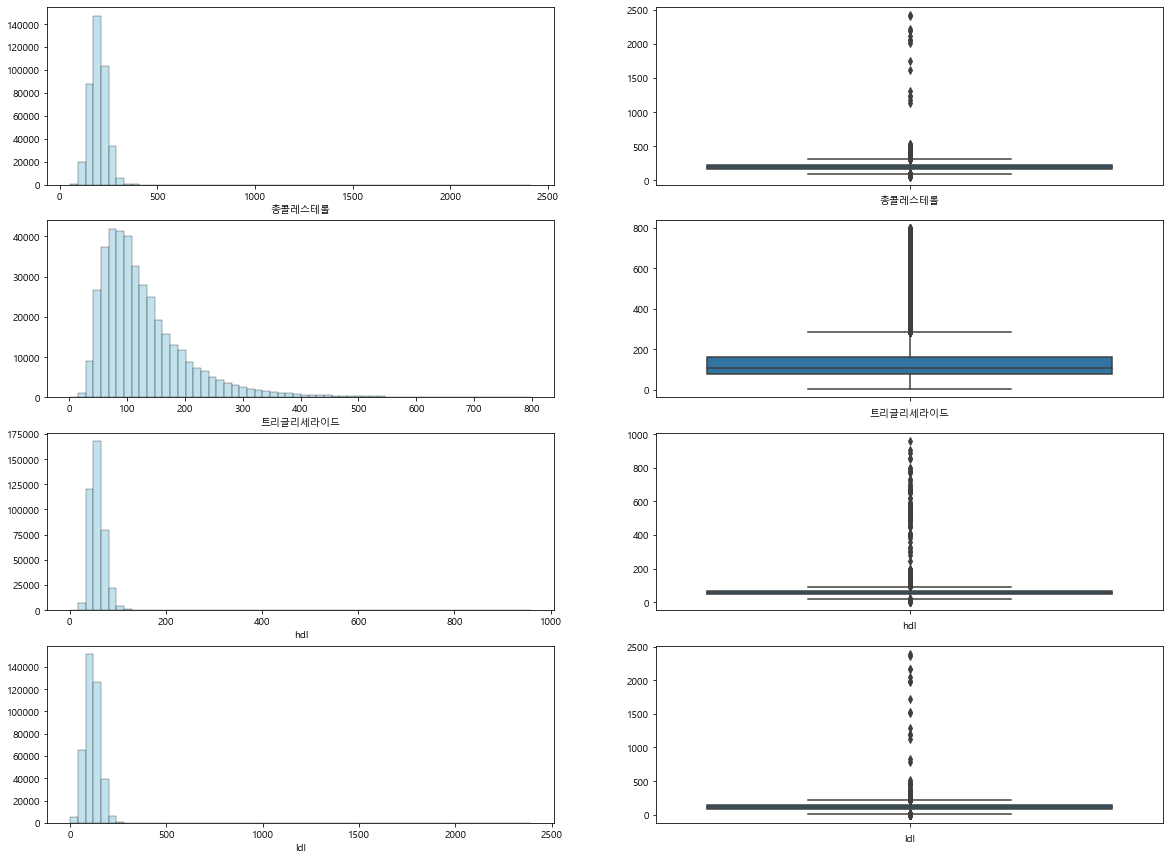

In [100]:
bins3=[ 60, 60, 60, 60 ]

plt.figure(figsize=(20,15))
for idx, col in enumerate( df[numerical_features].columns[8:12] ):
    
    plt.subplot( 4,2,2*idx+1 )
    sns.histplot(df[col], bins=bins3[idx], color='lightblue', linewidth=0.3)
    plt.xlabel(col)
    plt.ylabel('')
    
    plt.subplot( 4,2,2*idx+2 )
    sns.boxplot(y=df[col])
    plt.xlabel(col)
    plt.ylabel('')

plt.show()

총콜레스테롤이 높은 사람들이 다른 값도 큰 경향이 있어보인다..?!

In [101]:
df['ldl'].isna().sum()

6873

In [102]:

#트리글리세라이드가 400미만이면서 ldl이 결측이면 프리드와일드공식으로 대체
df.loc[(df['트리글리세라이드'] < 400) & (df['ldl'].isna() == True), 'ldl'] = (df['총콜레스테롤'] - df['hdl'] - df['트리글리세라이드']/5)
df['ldl'].isna().sum() #307채워짐

6567

In [103]:
#트리글리세라이드가 400이상 800미만이면서 ldl이 결측이면 샘슨공식으로 대체
df.loc[(df['트리글리세라이드'] >= 400) & (df['트리글리세라이드'] < 800) & (df['ldl'].isna() == True), 'ldl'] =  round(df['트리글리세라이드']/0.948 - df['hdl']/0.971 - (df['트리글리세라이드']/8.56 + ((df['트리글리세라이드']*(df['총콜레스테롤']-df['hdl'])/2140) - (df['트리글리세라이드']**2)/16100)) - 9.44, 2)
df['ldl'].isna().sum() #6567채워짐

0

In [104]:
df.loc[df['ldl']<0, ['총콜레스테롤','트리글리세라이드','ldl','hdl']]

,총콜레스테롤,트리글리세라이드,ldl,hdl
84849,188.0,39.0,-140.80,321.0
117063,81.0,141.0,-1.20,54.0
139020,136.0,333.0,-4.60,74.0
211761,109.0,325.0,-3.00,47.0
222848,119.0,121.0,-466.20,561.0
419571,132.0,268.0,-0.60,79.0
487836,109.0,381.0,-16.20,49.0
680092,197.0,52.0,-4.40,191.0
708834,101.0,80.0,-16.00,101.0
803478,94.0,271.0,-22.20,62.0


In [105]:
#음수가 나오는 값들은 신뢰할 수 없는 콜레스테롤 값이므로 행 제거
drop_index5=df.loc[df['ldl']<0, ['총콜레스테롤','트리글리세라이드','ldl','hdl']].index
len(drop_index5)

18

In [106]:
df.drop(drop_index5 , inplace=True)

In [107]:
print(np.percentile(df['총콜레스테롤'], [95,99,99.9], interpolation='nearest'))
print(np.percentile(df['hdl'], [95,99,99.9], interpolation='nearest'))
print(np.percentile(df['ldl'], [95,99,99.9], interpolation='nearest'))

[268. 303. 354.]
[ 83.  99. 124.]
[187.   352.13 577.84]


- 각 호르몬 수치들의 위험수준보다도 한참 높은 수치에 해당되는 1 percentile만큼 이상치로 간주하여 행 삭제

In [108]:
drop_index6=df.loc[(df['총콜레스테롤']>=303) | (df['hdl']>=99) | (df['ldl']>=352),].index
len(drop_index6)

11886

In [109]:
df.drop(drop_index6 , inplace=True)

In [110]:
df.shape

(388596, 24)

### 대체 후 분포 다시보기

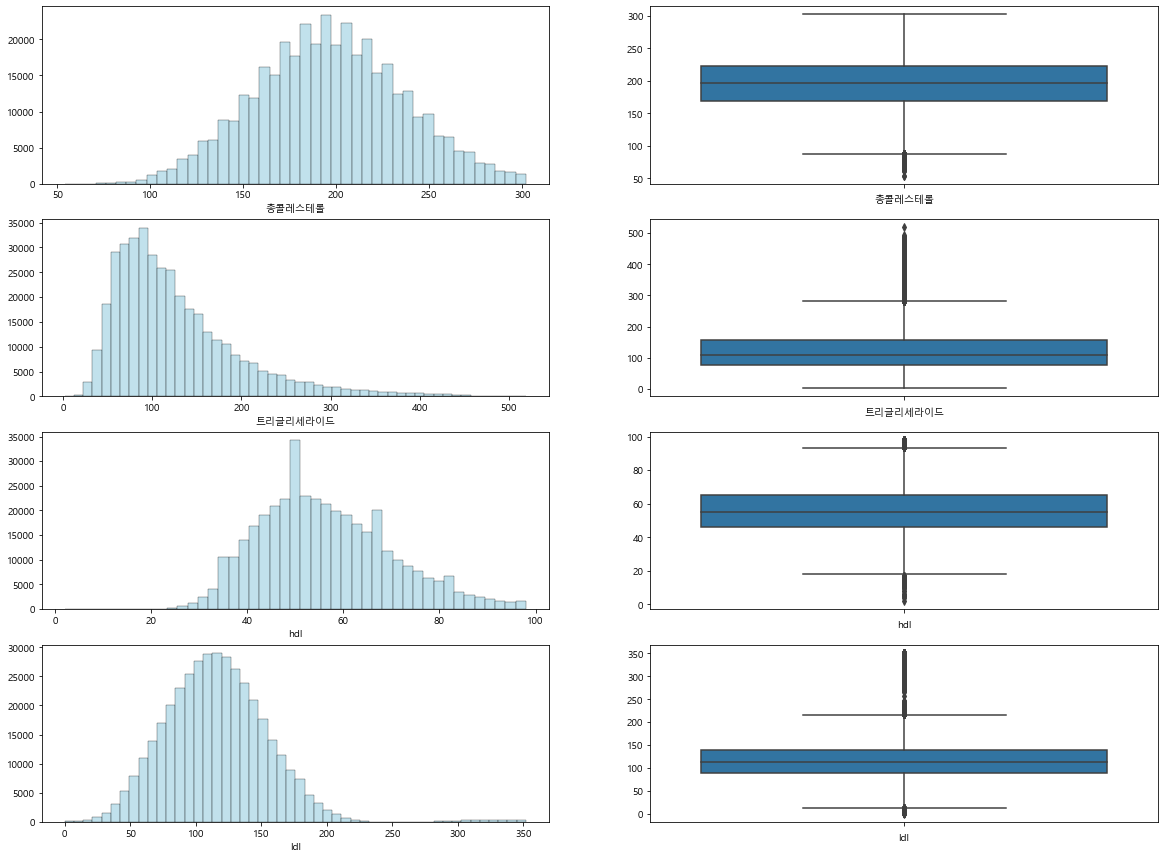

In [111]:
bins3=[ 45, 50, 45, 50 ]

plt.figure(figsize=(20,15))
for idx, col in enumerate( df[numerical_features].columns[8:12] ):
    
    plt.subplot( 4,2,2*idx+1 )
    sns.histplot(df[col], bins=bins3[idx], color='lightblue', linewidth=0.3)
    plt.xlabel(col)
    plt.ylabel('')
    
    plt.subplot( 4,2,2*idx+2 )
    sns.boxplot(y=df[col])
    plt.xlabel(col)
    plt.ylabel('')

plt.show()

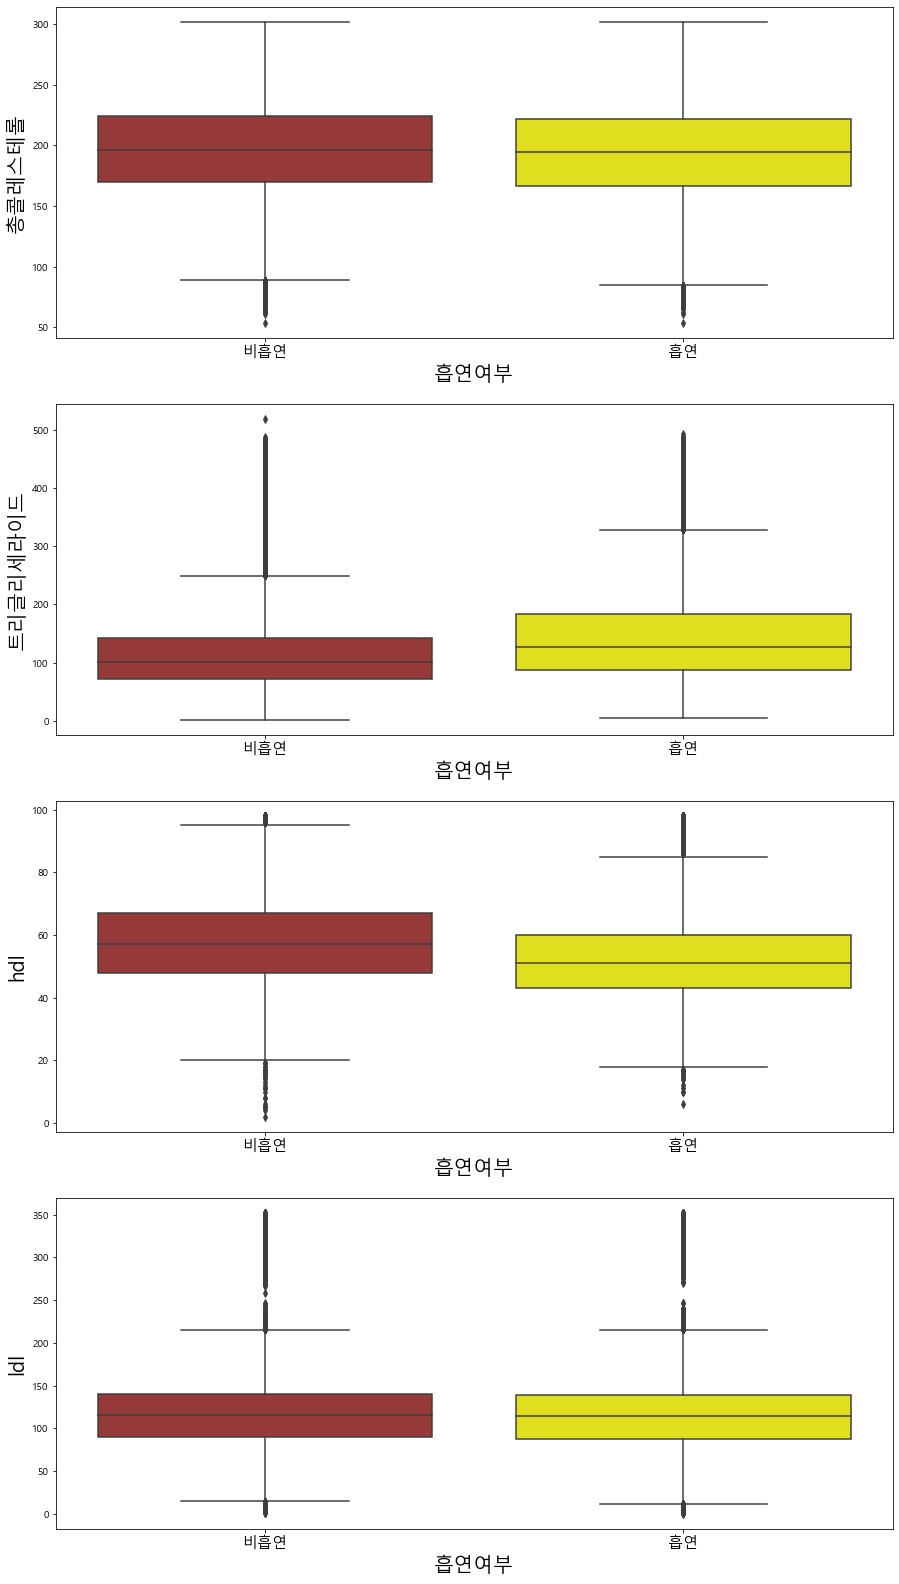

In [112]:
plt.figure(figsize=(15,28))

plt.subplot( 4,1,1 )
sns.boxplot(x="흡연", y="총콜레스테롤", palette=["brown", "yellow"], data=df)
plt.xticks([0, 1],['비흡연', '흡연'],size=15)
plt.xlabel("흡연여부", size=20)
plt.ylabel("총콜레스테롤", size=20)

plt.subplot( 4,1,2 )
sns.boxplot(x="흡연", y="트리글리세라이드", palette=["brown", "yellow"], data=df)
plt.xticks([0, 1],['비흡연', '흡연'],size=15)
plt.xlabel("흡연여부", size=20)
plt.ylabel("트리글리세라이드", size=20)

plt.subplot( 4,1,3 )
sns.boxplot(x="흡연", y="hdl", palette=["brown", "yellow"], data=df)
plt.xticks([0, 1],['비흡연', '흡연'],size=15)
plt.xlabel("흡연여부", size=20)
plt.ylabel("hdl", size=20)

plt.subplot( 4,1,4 )
sns.boxplot(x="흡연", y="ldl", palette=["brown", "yellow"], data=df)
plt.xticks([0, 1],['비흡연', '흡연'],size=15)
plt.xlabel("흡연여부", size=20)
plt.ylabel("ldl", size=20)

plt.show()

총콜레스테롤과 ldl은 두 집단 사이에서 차이를 확인하기 어렵다. 그러나, 트리글리세라이드는 흡연집단에서 더 높고 hdl은 흡연집단에서 더 낮다.

In [113]:
#등분산 검정(bartlett test)
#귀무가설 H0: 흡연, 비흡연 두 집단의 수축기 분산은 같다
bartlett(df.loc[df['흡연']==1,"총콜레스테롤"],df.loc[df['흡연']==2,"총콜레스테롤"])

BartlettResult(statistic=112.44244086912175, pvalue=2.8584400330273774e-26)

유의확률 0.05하에 귀무가설을 기각할 근거가 충분하다. 두 집단의 분산은 같다.

In [114]:
# 이분산 T-test
#귀무가설 H0: 흡연, 비흡연 두 집단의 총콜레스테롤 평균은 같다
#대립가설 H1: 흡연, 비흡연 두 집단의 총콜레스테롤 평균은 다르다
stats.ttest_ind( df.loc[df['흡연']==1,"총콜레스테롤"].dropna(), 
                df.loc[df['흡연']==2,"총콜레스테롤"].dropna(), 
                equal_var= False, alternative="two-sided")

Ttest_indResult(statistic=18.33024635571122, pvalue=5.252923228059789e-75)

유의확률 0.05하에 귀무가설을 기각할 근거가 충분하다. 흡연, 비흡연 두 집단의 총콜레스테롤 평균은 다르다

In [115]:
# 이분산 T-test
#귀무가설 H0: 흡연, 비흡연 두 집단의 총콜레스테롤 평균은 같다
#대립가설 H1: 흡연, 비흡연 두 집단의 총콜레스테롤 평균은 다르다
stats.ttest_ind( df.loc[df['흡연']==1,"총콜레스테롤"].dropna(), 
                df.loc[df['흡연']==2,"총콜레스테롤"].dropna(), 
                equal_var= False, alternative="greater")

Ttest_indResult(statistic=18.33024635571122, pvalue=2.6264616140298944e-75)

유의확률 0.05하에 귀무가설을 기각할 근거가 충분하다. 비흡연 집단의 총콜레스테롤 평균이 흡연 집단보다 더 크다

## 시각화 : ( 그 외 건강검진 수치 : '공복혈당',  '혈색소', '혈청크레아티닌')

In [116]:
df[numerical_features].columns[[7,12,13]]

Index(['공복혈당', '혈색소', '혈청크레아티닌'], dtype='object')

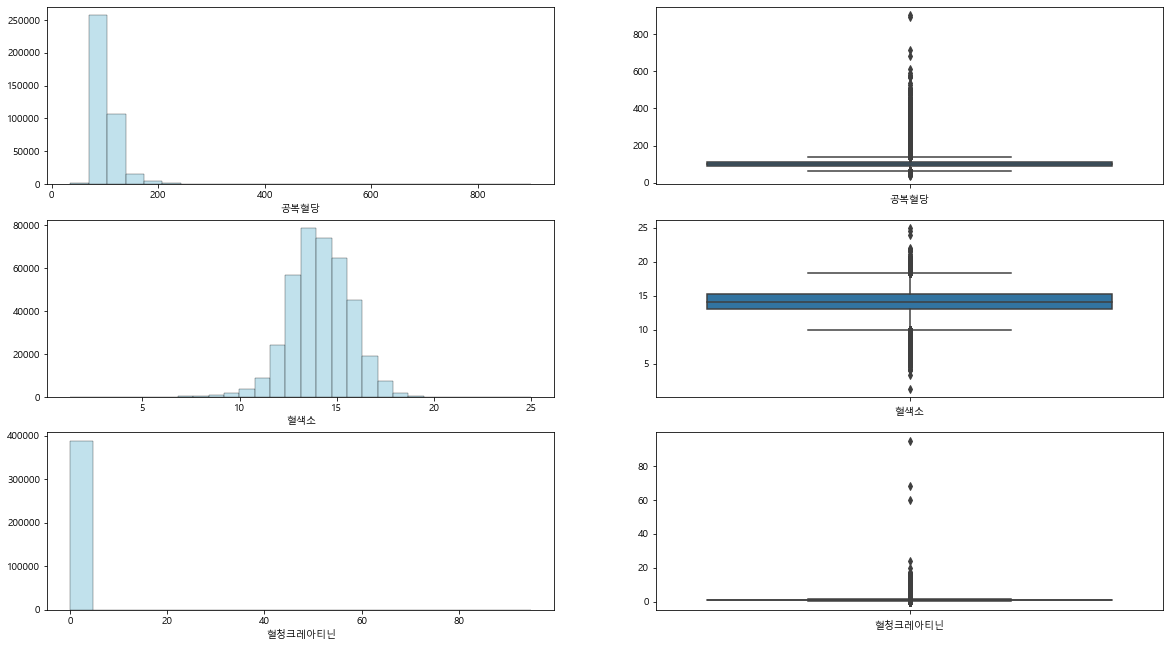

In [117]:
bins4=[ 25, 30, 20 ]

plt.figure(figsize=(20,15))
for idx, col in enumerate( df[numerical_features].columns[[7,12,13]] ):
    
    plt.subplot( 4,2,2*idx+1 )
    sns.histplot(df[col], bins=bins4[idx], color='lightblue', linewidth=0.3)
    plt.xlabel(col)
    plt.ylabel('')
    
    plt.subplot( 4,2,2*idx+2 )
    sns.boxplot(y=df[col])
    plt.xlabel(col)
    plt.ylabel('')

plt.show()

#### 공복혈당
- 대한진단검사의학회
- [정상치] 70 ~ 99 ㎎/ℓ 8시간 이상 공복 후 측정한 혈당이 126 mg/dL 이상인 경우 당뇨병으로 진단이 됩니다. 당뇨병의 증상이 없다면 한번 더 측정한 후 두 번의 결과를 보고 판정을 내리는 것이 정확합니다.
- 도메인 정보를 바탕으로 파생변수 생성
- 70 ~ 99(정상): 1, 100 ~ 125(공복혈당장애): 2, 125이상(당뇨병): 3

In [118]:
df['공복혈당'].describe()

count    388596.000000
mean        103.862641
std          24.735111
min          35.000000
25%          91.000000
50%          99.000000
75%         109.000000
max         901.000000
Name: 공복혈당, dtype: float64

In [119]:
print(np.percentile(df['공복혈당'].dropna(), [5,95,99,99.9], interpolation='nearest'))

[ 81. 145. 207. 315.]


- 공복혈당 수치의 위험수준보다도 한참 높은 수치에 해당되는 1 percentile만큼 이상치로 간주하여 행 삭제

In [120]:
drop_index7=df.loc[(df['공복혈당']>=207)].index
df.drop(drop_index7 , inplace=True)

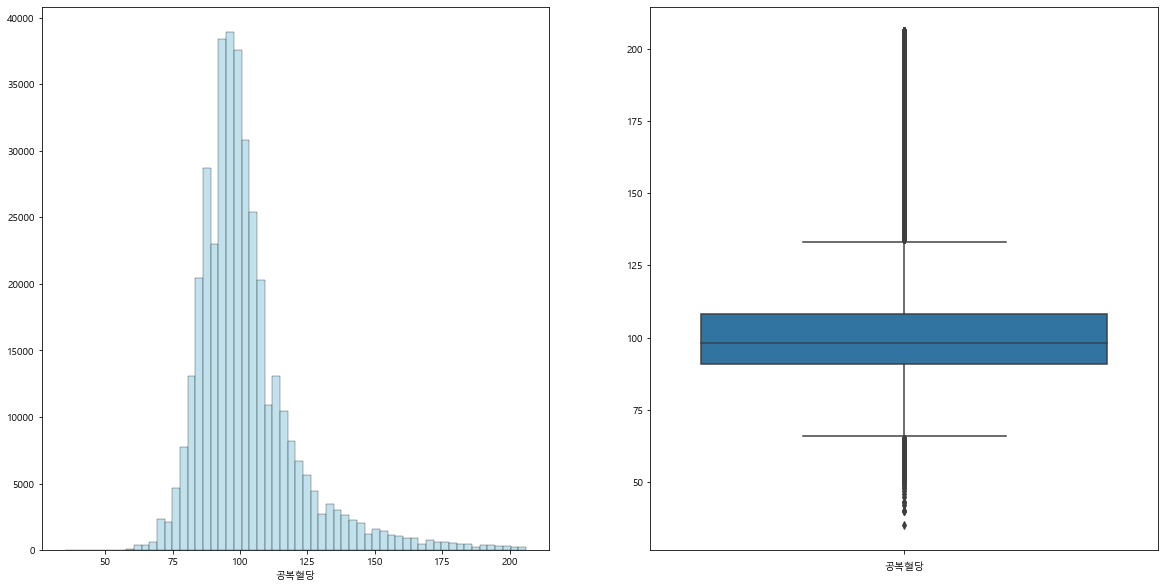

In [121]:
# 공복혈당 다시 시각화
plt.figure(figsize=(20,10))
    
plt.subplot( 1,2,1 )
sns.histplot(df['공복혈당'], bins=60, color='lightblue', linewidth=0.3)
plt.xlabel("공복혈당")
plt.ylabel('')
    
plt.subplot( 1,2,2 )
sns.boxplot(y=df['공복혈당'])
plt.xlabel("공복혈당")
plt.ylabel('')

plt.show()

In [122]:
#1: 저혈당, 2: 정상, 3. 공복혈당장애, 4. 당뇨
df["혈당수준"]=pd.cut(df["공복혈당"],[0,70,100,125,1000], 
                      right=False, labels=[1, 2, 3, 4])

In [123]:
df["혈당수준"]=df["혈당수준"].astype('category')
df["혈당수준"].value_counts().sort_index()

1      1539
2    205252
3    139462
4     38451
Name: 혈당수준, dtype: int64

#### 범주화 후 혈당수준 변수와 흡연여부(타겟) 관계 살피기

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384704 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   성별        384704 non-null  category
 1   연령대       384704 non-null  category
 2   신장        384704 non-null  int64   
 3   체중        384704 non-null  int64   
 4   허리둘레      384643 non-null  float64 
 5   시력(좌)     383086 non-null  float64 
 6   시력(우)     383007 non-null  float64 
 7   청력(좌)     384608 non-null  category
 8   청력(우)     384606 non-null  category
 9   수축기       384694 non-null  float64 
 10  이완기       384694 non-null  float64 
 11  공복혈당      384704 non-null  float64 
 12  총콜레스테롤    384704 non-null  float64 
 13  트리글리세라이드  384704 non-null  float64 
 14  hdl       384704 non-null  float64 
 15  ldl       384704 non-null  float64 
 16  혈색소       384697 non-null  float64 
 17  요단백       382772 non-null  category
 18  혈청크레아티닌   384704 non-null  float64 
 19  ast       384704 non-nu

In [125]:
df['혈당수준'].value_counts().sort_index()

1      1539
2    205252
3    139462
4     38451
Name: 혈당수준, dtype: int64

In [126]:
df['흡연'].value_counts()

1.0    247980
2.0    136724
Name: 흡연, dtype: int64

In [127]:
# Data
r = [0,1,2,3]
raw_data3 = {'저혈당':  [ df[df['혈당수준']==1]['흡연'].value_counts()[0],
                      df[df['혈당수준']==1]['흡연'].value_counts()[1] ],
            '정상': [ df[df['혈당수준']==2]['흡연'].value_counts()[0], 
                   df[df['혈당수준']==2]['흡연'].value_counts()[1] ],
            '공복혈당장애': [ df[df['혈당수준']==3]['흡연'].value_counts()[0], 
                       df[df['혈당수준']==3]['흡연'].value_counts()[1] ],
            '당뇨': [ df[df['혈당수준']==4]['흡연'].value_counts()[0],
                   df[df['혈당수준']==4]['흡연'].value_counts()[1] ]}
smoke_glu_df = pd.DataFrame(raw_data3).T

In [128]:
smoke_glu_df

,0,1
저혈당,999,540
정상,141388,63864
공복혈당장애,84390,55072
당뇨,21203,17248


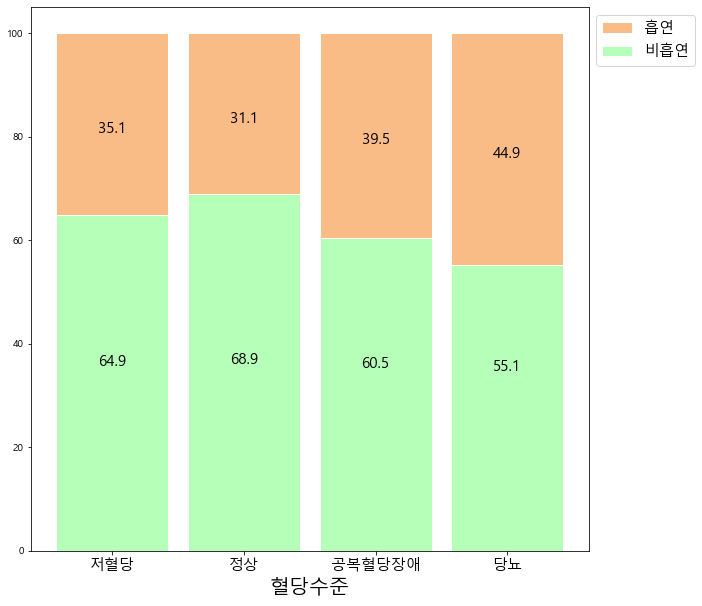

In [129]:
# From raw value to percentage
totals = [i+j for i,j in zip( smoke_glu_df[0], smoke_glu_df[1] )]
non_sm = [i / j * 100 for i,j in zip(smoke_glu_df[0], totals)]
sm = [i / j * 100 for i,j in zip(smoke_glu_df[1], totals)]

# plot 설정
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

# plot
barWidth = 0.85
names = ('저혈당','정상','공복혈당장애', '당뇨')

# Create orange Bars
plot2=ax.bar(r, non_sm, color='#b5ffb9', edgecolor='white', width=barWidth, label="비흡연")
plot1=ax.bar(r, sm, bottom=non_sm, color='#f9bc86', edgecolor='white', width=barWidth, label="흡연")

# Add a legend : 범례순서
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, handles=[plot1,plot2], fontsize=15) 

# 숫자 넣는 부분 : 직접 조절
for rect1 in plot1:
    height1 = rect1.get_height() 
    plt.text(rect1.get_x() + rect1.get_width()/2.0, (100-height1)/2 + 49, '%.1f' % height1, ha='center', va='center', size = 15)
for rect2 in plot2:
    height2 = rect2.get_height()
    plt.text(rect2.get_x() + rect2.get_width()/2.0, height2/10+30, '%.1f' % height2, ha='center', va='center', size = 15)

# Custom x axis
plt.xticks(r, names, size=15)
plt.xlabel("혈당수준", size=20)
 
# Show graphic
plt.show()

- 혈당수준이 정상인 집단의 흡연자 비율이 제일 낮다.
- 혈당수준이 정상보다 높은 공복혈당장애나 당뇨 집단에서는 흡연자 비율이 더욱 큰 경향이 있다.
- 수치형 변수로 사용하는 것도 좋고, 범주형 변수로 사용하는 것도 좋아보임.

#### 혈색소(헤모글로빈)
- 남여에 따라 정상수준이 다름. 정상수치: 남성 13.5-17.5g/dL, 여성 12.5-15.5g/dL

Text(0, 0.5, '혈색소')

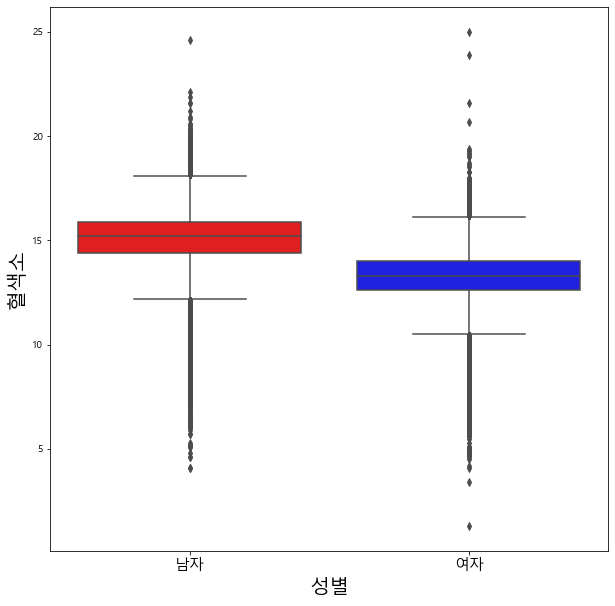

In [130]:
plt.figure(figsize=(10,10))
sns.boxplot(x="성별", y="혈색소", palette=["red", "blue"], data=df)
plt.xticks([0, 1],['남자', '여자'],size=15)
plt.xlabel("성별", size=20)
plt.ylabel("혈색소", size=20)

In [131]:
print( "성별이 남자인 사람들의 혈색소 NA 개수는 %d개" % df.loc[df["성별"]==1,"혈색소"].isna().sum() )
print( "성별이 여자인 사람들의 혈색소 NA 개수는 %d개" % df.loc[df["성별"]==2,"혈색소"].isna().sum() )

성별이 남자인 사람들의 혈색소 NA 개수는 3개
성별이 여자인 사람들의 혈색소 NA 개수는 4개


In [132]:
# 혈색소를 수준별로 범주화한 파생변수 생성
# 성별에 따라 나누는 것이 포인트
df.loc[df['성별']==1,'혈색소_cat']=pd.cut(df.loc[df["성별"]==1,"혈색소"],[0,13.5,17.5,100], 
                      right=False, labels=['낮음', '정상', '높음'])
df.loc[df['성별']==2,'혈색소_cat']=pd.cut(df.loc[df["성별"]==2,"혈색소"],[0,12.5,15.5,100], 
                      right=False, labels=['낮음', '정상', '높음'])

In [133]:
print( "혈색소_cat는 NA가 %d개" % df['혈색소_cat'].isna().sum() ) 
df.loc[df['혈색소_cat'].isna(),]

혈색소_cat는 NA가 7개


,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기,이완기,공복혈당,총콜레스테롤,트리글리세라이드,hdl,ldl,혈색소,요단백,혈청크레아티닌,ast,alt,gpt,흡연,음주여부,혈당수준,혈색소_cat
126697,2,50,160,55,72.0,0.8,0.9,1.0,1.0,117.0,72.0,65.0,238.0,172.0,43.0,160.0,NaN,1.0,0.6,23.0,20.0,NaN,1.0,0.0,1,NaN
218152,1,60,160,60,82.0,1.5,1.0,1.0,1.0,133.0,86.0,90.0,132.0,109.0,46.0,72.0,NaN,1.0,0.9,27.0,27.0,43.0,2.0,0.0,2,NaN
226760,2,60,135,60,95.0,0.1,0.7,1.0,1.0,137.0,90.0,95.0,200.0,92.0,89.0,92.0,NaN,1.0,0.6,21.0,18.0,22.0,1.0,0.0,2,NaN
344219,2,45,150,70,97.0,0.8,0.6,1.0,1.0,116.0,78.0,115.0,202.0,61.0,74.0,116.0,NaN,1.0,0.8,27.0,19.0,20.0,1.0,1.0,3,NaN
401803,1,40,175,65,82.5,0.7,1.0,1.0,1.0,123.0,87.0,107.0,170.0,184.0,44.0,89.0,NaN,1.0,1.0,26.0,33.0,32.0,2.0,1.0,3,NaN
537829,2,55,160,60,80.0,1.2,0.9,1.0,1.0,120.0,70.0,113.0,219.0,343.0,40.0,110.0,NaN,1.0,0.7,49.0,70.0,51.0,2.0,1.0,3,NaN
949047,1,50,175,70,77.0,1.0,0.9,1.0,1.0,130.0,74.0,108.0,240.0,133.0,53.0,160.0,NaN,1.0,0.7,19.0,18.0,13.0,1.0,1.0,3,NaN


In [134]:
df['혈색소_cat']=df['혈색소_cat'].astype("category")
df['혈색소_cat'].value_counts()

정상    321347
낮음     55656
높음      7694
Name: 혈색소_cat, dtype: int64

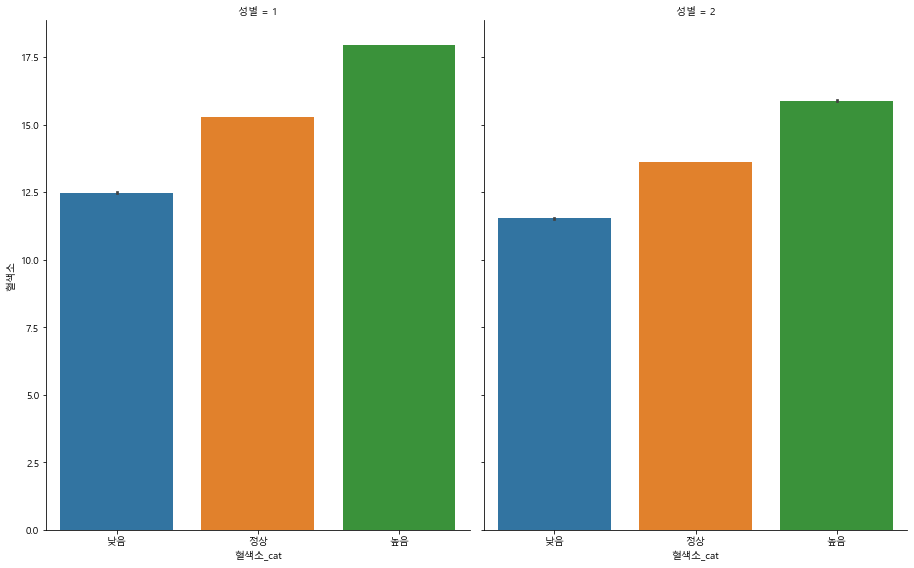

In [135]:
# 적당하게, 범주가 골고루 잘 나뉘었는지 확인

sns.catplot( data=df, x="혈색소_cat", y="혈색소", col="성별", kind="bar",height=8,aspect=0.8)


- 성별에 따른 기준 값이 다르기 때문에, 성별에 따라 혈색소 수준을 다르게 구분해야함.
- 남자와 여자의 혈색소 수준 차이는 없다. 

### 범주화 후 혈색소 변수와 흡연여부(타겟) 관계 살피기

In [136]:
# Data
r = [0,1,2]
raw_data2 = {'낮음': [ df[df['혈색소_cat']=="낮음"]['흡연'].value_counts()[0],   
                          df[df['혈색소_cat']=="낮음"]['흡연'].value_counts()[1] ], 
            '정상': [ df[df['혈색소_cat']=="정상"]['흡연'].value_counts()[0], 
                          df[df['혈색소_cat']=="정상"]['흡연'].value_counts()[1] ],
            '높음': [ df[df['혈색소_cat']=="높음"]['흡연'].value_counts()[0], 
                      df[df['혈색소_cat']=="높음"]['흡연'].value_counts()[1] ]}
smoke_blood2_df = pd.DataFrame(raw_data2).T

In [137]:
smoke_blood2_df

,0,1
낮음,45032,10624
정상,198952,122395
높음,3992,3702


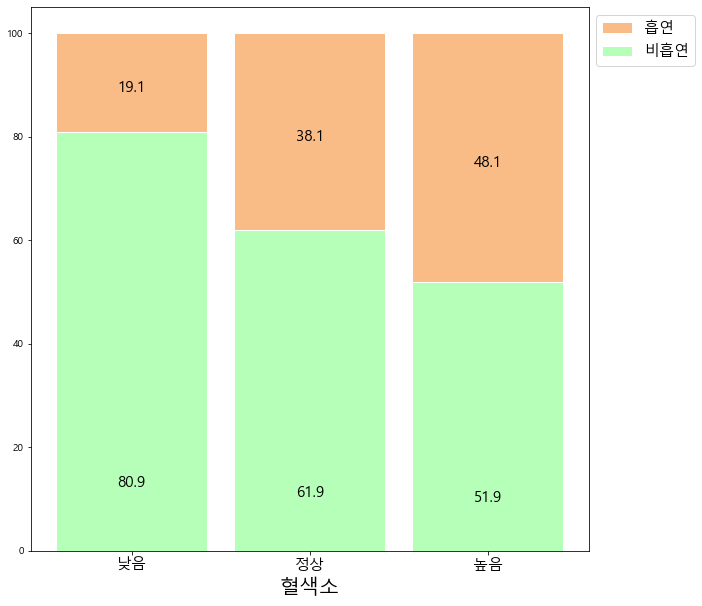

In [138]:
# From raw value to percentage
totals = [i+j for i,j in zip( smoke_blood2_df[0], smoke_blood2_df[1] )]
non_sm = [i / j * 100 for i,j in zip(smoke_blood2_df[0], totals)]
sm = [i / j * 100 for i,j in zip(smoke_blood2_df[1], totals)]

# plot 설정
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

# plot
barWidth = 0.85
names = ('낮음','정상','높음')

# Create orange Bars
plot2=ax.bar(r, non_sm, color='#b5ffb9', edgecolor='white', width=barWidth, label="비흡연")
plot1=ax.bar(r, sm, bottom=non_sm, color='#f9bc86', edgecolor='white', width=barWidth, label="흡연")

# Add a legend : 범례순서
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, handles=[plot1,plot2], fontsize=15) 

# 숫자 넣는 부분 : 직접 조절
for rect1 in plot1:
    height1 = rect1.get_height() 
    plt.text(rect1.get_x() + rect1.get_width()/2.0, (100-height1)/2 + 49, '%.1f' % height1, ha='center', va='center', size = 15)
for rect2 in plot2:
    height2 = rect2.get_height()
    plt.text(rect2.get_x() + rect2.get_width()/2.0, height2/10+5, '%.1f' % height2, ha='center', va='center', size = 15)

# Custom x axis
plt.xticks(r, names, size=15)
plt.xlabel("혈색소", size=20)
 
# Show graphic
plt.show()

- 범주화를 함으로써 흡연과의 관계성을 해석하기 훨씬 쉬워짐.
- 혈색소가 높은 집단의 흡연자 비율이 더 커지는 경향이 있음.
- 혈색소 변수는 수치형 변수 보다는 성별에 따라 기준이 반영된 범주형 변수 사용이 좋아보임.

#### 혈청크레아티닌

- 정상치 0.8~1.7mg/dL
- 대한신장학회, https://ksn.or.kr/general/about/check.php

- 크레아티닌은 크레아틴의 탈수물로 내인성 단백대사의 종말산물로서 신장에서 배설되고 그 증감은 음식물에 관계없이 근육의 발육과 운동에 관계함
- 혈청크레아티닌 농도는 신장 기능장애에 의해 증량함
- 신장 관련된 변수로는 요단백 변수가 있음

https://kosis.kr/statHtml/statHtml.do?orgId=350&tblId=DT_35007_N079
- 혈청크레아티닌 분포에서 2.1이상/합계
- 2.1보다 큰 값은 극히 드물기 때문에 도메인 정보에 의하여 2.1보다 큰 값은 이상치라고 판단하여 행삭제

In [139]:
df['혈청크레아티닌'].describe()

count    384704.000000
mean          0.849281
std           0.406900
min           0.000000
25%           0.700000
50%           0.800000
75%           1.000000
max          95.000000
Name: 혈청크레아티닌, dtype: float64

In [140]:
print(np.percentile(df['혈청크레아티닌'].dropna(), [5,95,99,99.9], interpolation='nearest'))

[0.5 1.2 1.5 5.6]


In [141]:
print( "혈청크레아티닌이 2.1이상인 행은 전체의 %.1f percentile" % round((len(df.loc[df['혈청크레아티닌']>=2.1,['요단백','혈청크레아티닌']])/len(df))*100,2) )
df.loc[df['혈청크레아티닌']>=2.1,['요단백','혈청크레아티닌']]

혈청크레아티닌이 2.1이상인 행은 전체의 0.3 percentile


,요단백,혈청크레아티닌
1536,2.0,6.9
1714,1.0,8.6
1805,1.0,8.7
2148,2.0,4.1
3423,2.0,8.5
...,...,...
990104,2.0,3.1
993688,2.0,5.3
994420,2.0,6.6
995702,NaN,6.1


In [142]:
drop_index8 = df[df['혈청크레아티닌'] >= 2.1].index
df.drop(drop_index8 , inplace=True)

Text(0, 0.5, '혈청크레아티닌')

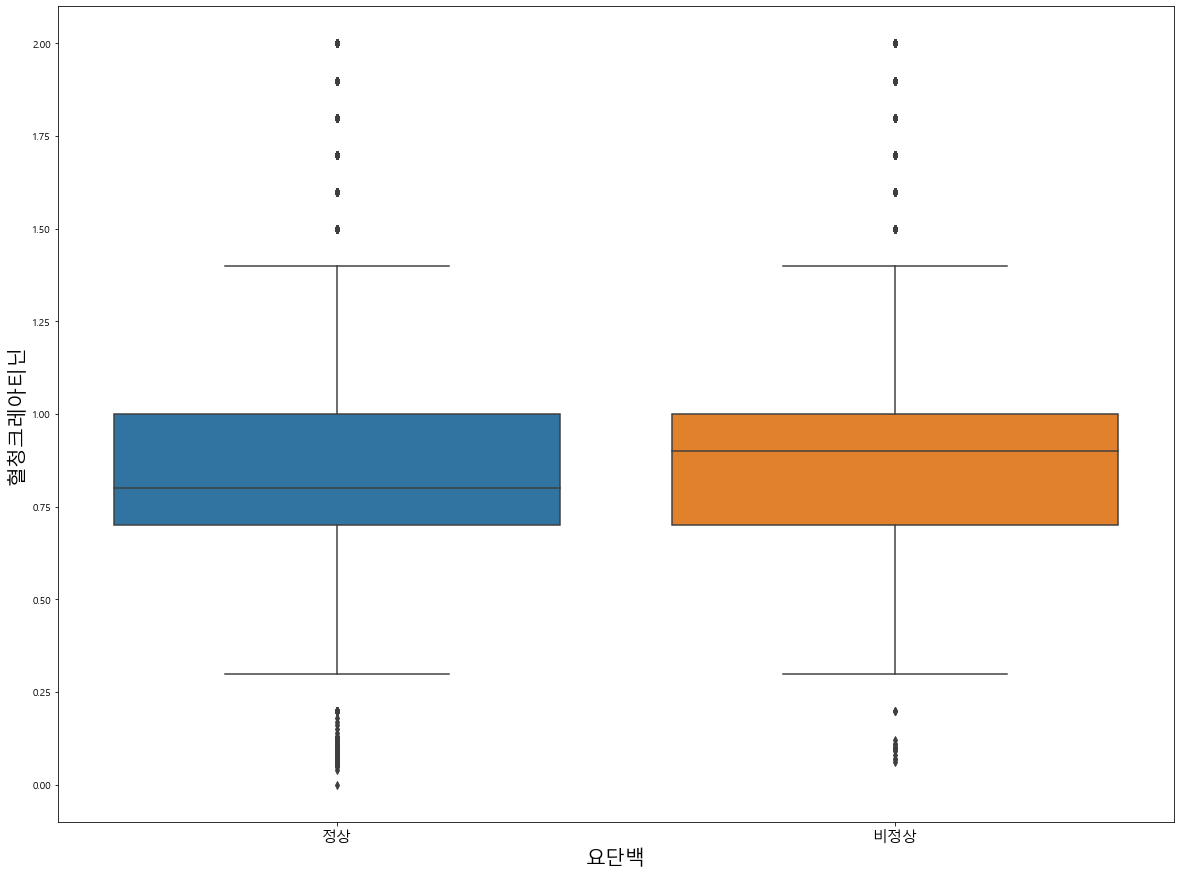

In [143]:
# 극단값 아예 빼고 확대해서 보기
plt.figure(figsize=(20,15))
sns.boxplot( data=df, x="요단백", y="혈청크레아티닌")

plt.xticks([0,1], ["정상" , "비정상"], size=15)
plt.xlabel("요단백", size=20)
plt.ylabel("혈청크레아티닌", size=20)

- 요단백 중앙값이 높게 나타나나지만, 도메인 정보대로 명확하게 요단백과 혈청크레아티닌은 관계가 있어보이지는 않음. 

#### 혈청크레아티닌과 흡연 사이의 관계

Text(0, 0.5, '혈청크레아티닌')

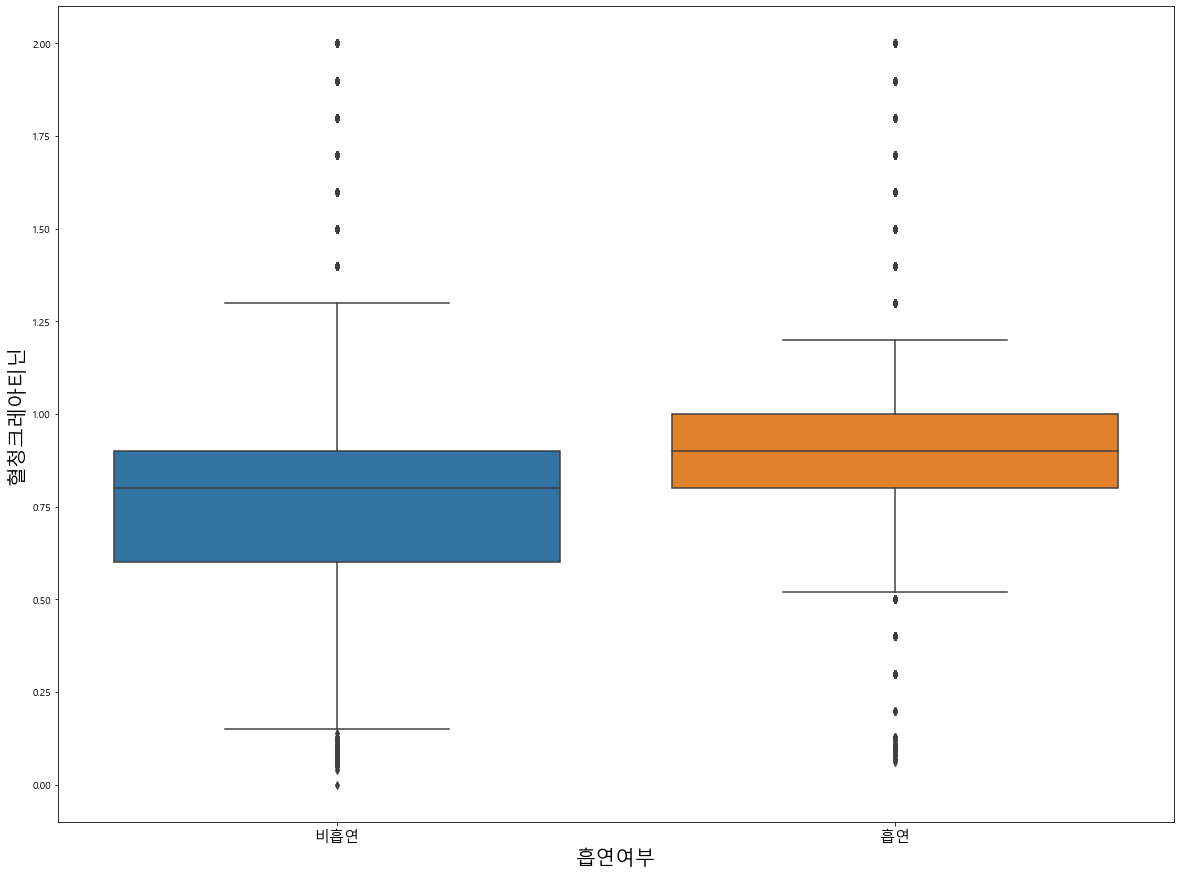

In [144]:
plt.figure(figsize=(20,15))
sns.boxplot( data=df, x="흡연", y="혈청크레아티닌")

plt.xticks([0,1], ["비흡연" , "흡연"], size=15)
plt.xlabel("흡연여부", size=20)
plt.ylabel("혈청크레아티닌", size=20)

In [145]:
print("(비흡연) vs (흡연) : ",mannwhitneyu( df.loc[df['흡연']==1,'혈청크레아티닌'], 
                                              df.loc[df['흡연']==2,'혈청크레아티닌'], alternative='less'))

(비흡연) vs (흡연) :  MannwhitneyuResult(statistic=9384609105.5, pvalue=0.0)


흡연자 집단이 비흡연자 집단에 비해 혈청크레아티닌이 높다.

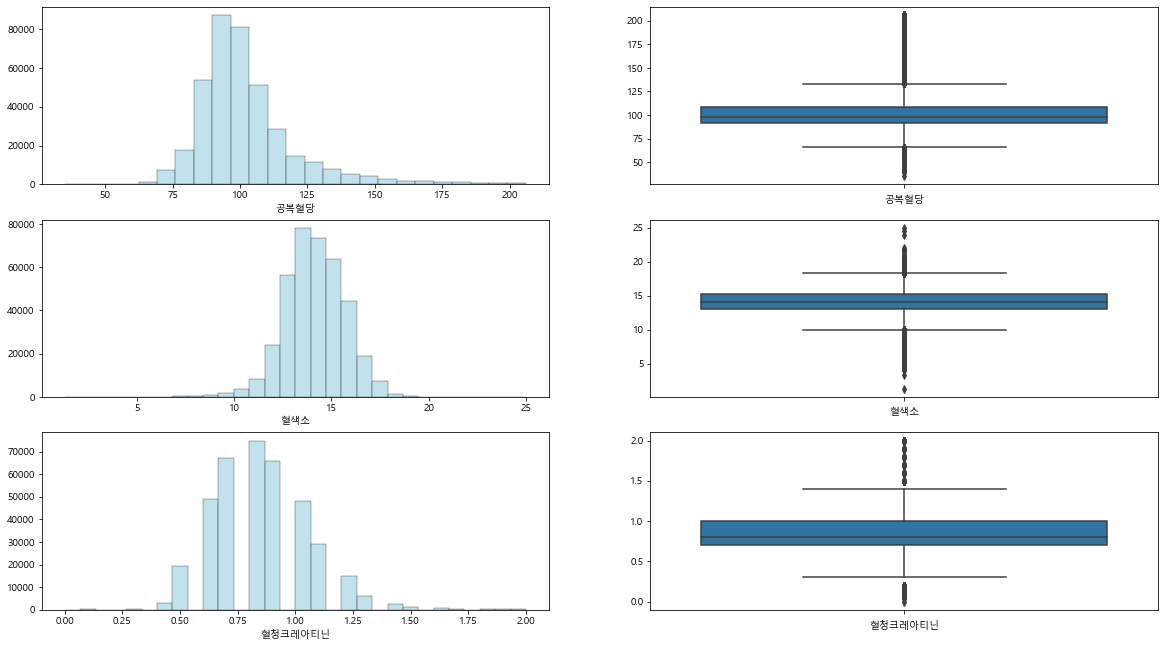

In [146]:
bins4_2=[ 25, 30, 30 ]

plt.figure(figsize=(20,15))
for idx, col in enumerate( df[numerical_features].columns[[7,12,13]] ):
    
    plt.subplot( 4,2,2*idx+1 )
    sns.histplot(df[col], bins=bins4_2[idx], color='lightblue', linewidth=0.3)
    plt.xlabel(col)
    plt.ylabel('')
    
    plt.subplot( 4,2,2*idx+2 )
    sns.boxplot(y=df[col])
    plt.xlabel(col)
    plt.ylabel('')

plt.show()

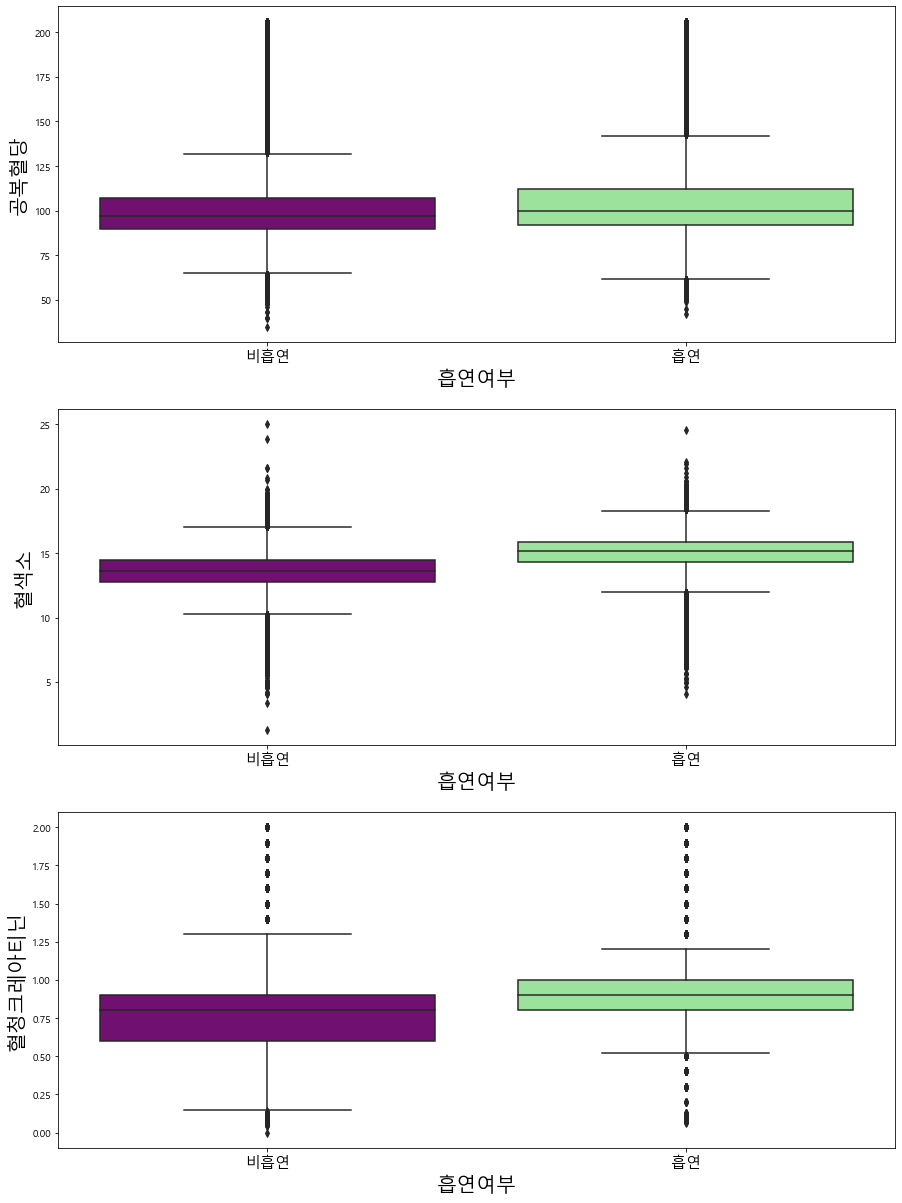

In [147]:
plt.figure(figsize=(15,21))

plt.subplot( 3,1,1 )
sns.boxplot(x="흡연", y="공복혈당", palette=["purple", "lightgreen"], data=df)
plt.xticks([0, 1],['비흡연', '흡연'],size=15)
plt.xlabel("흡연여부", size=20)
plt.ylabel("공복혈당", size=20)

plt.subplot( 3,1,2 )
sns.boxplot(x="흡연", y="혈색소", palette=["purple", "lightgreen"], data=df)
plt.xticks([0, 1],['비흡연', '흡연'],size=15)
plt.xlabel("흡연여부", size=20)
plt.ylabel("혈색소", size=20)

plt.subplot( 3,1,3 )
sns.boxplot(x="흡연", y="혈청크레아티닌", palette=["purple", "lightgreen"], data=df)
plt.xticks([0, 1],['비흡연', '흡연'],size=15)
plt.xlabel("흡연여부", size=20)
plt.ylabel("혈청크레아티닌", size=20)

plt.show()

흡연 집단이 공복혈당, 혈색소, 혈청크레아티닌이 비흡연 집단보다 더 큰 경향이 있다.

In [148]:
#등분산 검정(bartlett test)
#귀무가설 H0: 흡연, 비흡연 두 집단의 공복혈당 분산은 같다
bartlett(df.loc[df['흡연']==1,"공복혈당"],df.loc[df['흡연']==2,"공복혈당"])

BartlettResult(statistic=2233.8988186190104, pvalue=0.0)

In [149]:
#등분산 검정(bartlett test)
#귀무가설 H0: 흡연, 비흡연 두 집단의 혈색소 분산은 같다
bartlett(df.loc[df['흡연']==1,"혈색소"],df.loc[df['흡연']==2,"혈색소"])

BartlettResult(statistic=1008.862696277022, pvalue=2.1273728690850685e-221)

In [150]:
#등분산 검정(bartlett test)
#귀무가설 H0: 흡연, 비흡연 두 집단의 혈청크레아티닌 분산은 같다
bartlett(df.loc[df['흡연']==1,"혈청크레아티닌"],df.loc[df['흡연']==2,"혈청크레아티닌"])

BartlettResult(statistic=141.72235406562402, pvalue=1.1183830508364989e-32)

In [151]:
# 이분산 T-test
#귀무가설 H0: 흡연, 비흡연 두 집단의 총콜레스테롤 평균은 같다
#대립가설 H1: 비흡연 집단의 공복혈당 평균이 흡연 집단보다 작다
stats.ttest_ind( df.loc[df['흡연']==1,"공복혈당"].dropna(), 
                df.loc[df['흡연']==2,"공복혈당"].dropna(), 
                equal_var= False, alternative="less")

Ttest_indResult(statistic=-60.070257416179814, pvalue=0.0)

In [152]:
# 이분산 T-test
#귀무가설 H0: 흡연, 비흡연 두 집단의 혈색소 평균은 같다
#대립가설 H1: 비흡연 집단의 혈색소 평균이 흡연 집단보다 작다
stats.ttest_ind( df.loc[df['흡연']==1,"혈색소"].dropna(), 
                df.loc[df['흡연']==2,"혈색소"].dropna(), 
                equal_var= False, alternative="less")

Ttest_indResult(statistic=-310.6300890717017, pvalue=0.0)

In [153]:
# 이분산 T-test
#귀무가설 H0: 흡연, 비흡연 두 집단의 혈청크레아티닌 평균은 같다
#대립가설 H1: 비흡연 집단의 혈청크레아티닌 평균이 흡연 집단보다 작다
stats.ttest_ind( df.loc[df['흡연']==1,"혈청크레아티닌"].dropna(), 
                df.loc[df['흡연']==2,"혈청크레아티닌"].dropna(), 
                equal_var= False, alternative="less")

Ttest_indResult(statistic=-228.61596268820603, pvalue=0.0)

흡연 집단에서 공복혈당, 혈색소, 혈청크레아티닌이 비흡연 집단보다 더 큰 경향이 있음을 검정결과 알 수 있다.

## 시각화 : ( 간수치 : 'ast',  'alt', 'gpt')

### <간수치 변수>
- 방법1) 상관관계가 높으면서 의미가 다소 겹치는 변수 제거
- 방법2) 군집화를 통해 세 가지의 간수치 정보를 파생변수로 변환
- 방법1을 선택

- "간기능의 올바른 해석", 이현웅
- "해리슨 20판"

- ast : 정상치 0 ~ 40IU/L
- 간 기능을 나타내는 혈액검사상의 수치, 간세포 이외에 심장, 신장, 뇌 , 근육 등에도 존재하는 효소로 이러한 세포들이 손상을 받는 경우 농도가 증가함
----------------------------
- alt : 정상치 0 ~ 40IU/L
- 간 기능을 나타내는 혈액검사상의 수치, ALT는 주로 간세포 안에 존재하는 효소로, 간세포가 손상을 받는 경우 농도가 증가함
----------------------------
- gtp : 정상치 남성 11 ~ 63 IU/L,  여성 8 ~ 35 IU/L
- 간 기능을 나타내는 혈액검사상의 수치, 간 내의 쓸개관(담관)에 존재하는 효소로 글루타민산을 외부에 펩티드나 아미노산 등으로 옮기는 작용을 함, 쓸개즙(담즙) 배설 장애, 간세포 장애 발생 시 혈중에 증가하게 됨

1) 경도: 정상 상한치의 5배 이내 증가(40-200 IU/L) 
 - 흔한 원인: 비알코올성 지방간 질환, 만성 B형 간염 
 
2) 중등도: 정상 상한치의 5-10배 증가(200-400 IU/L)
 - 흔한 원인: 바이러스 간염, 약물에 의한 간손상
 
3) 중증: 정상 상한치의 10배 이상 증가(400 IU/L ~)
 - 흔한 원인: 급성 바이러스성 간염, 허혈성 및 독성 간손상, 자가면역성 간염, 알코올에 의한 간손상
 
4) 1000 IU/L ~
 - 흔한 원인: 바이러스 간염, 허혈성 간염, 독성 및 약제 유발 간염 등

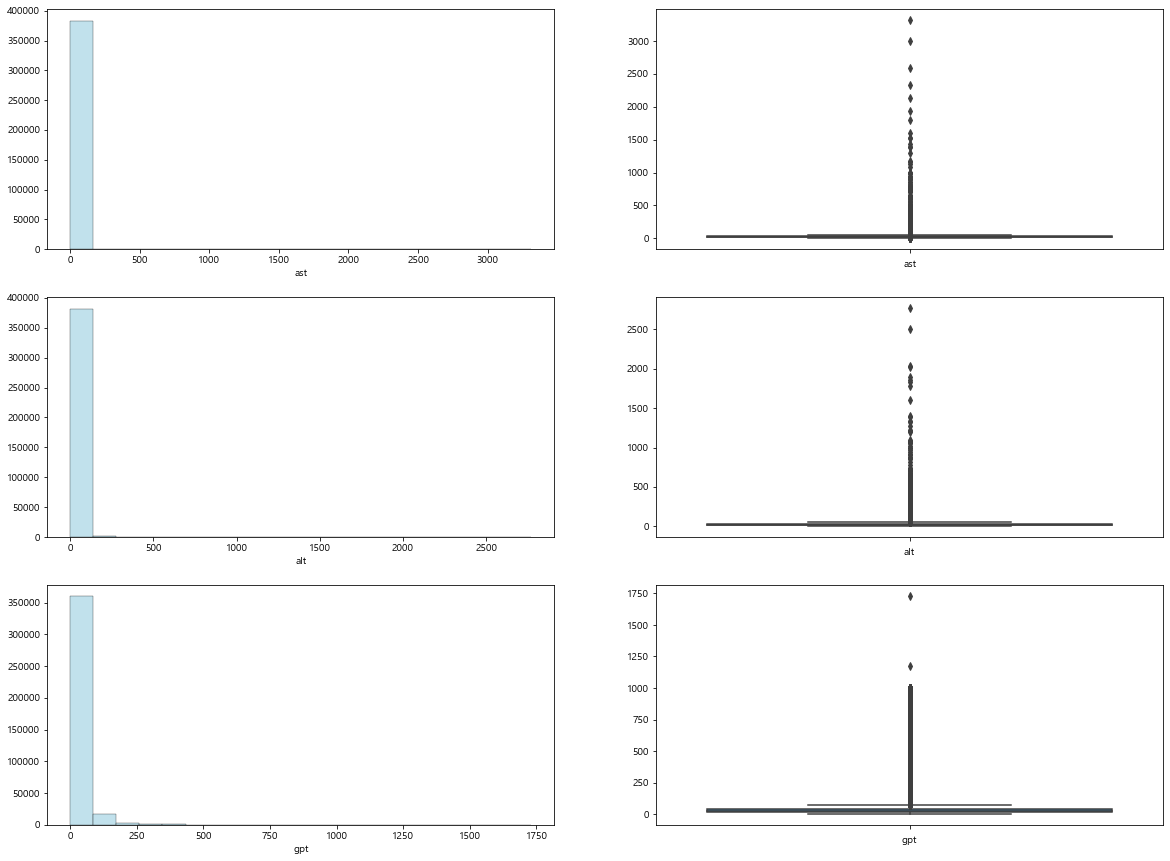

In [154]:
bins5=[ 20, 20, 20 ]

plt.figure(figsize=(20,15))
for idx, col in enumerate( df[numerical_features].columns[14:17] ):
    
    plt.subplot( 3,2,2*idx+1 )
    sns.histplot(data=df, x=df[col], bins=bins5[idx], color='lightblue', linewidth=0.3)
    plt.xlabel(col)
    plt.ylabel('')
    
    plt.subplot( 3,2,2*idx+2 )
    sns.boxplot(y=df[col],data=df)
    plt.xlabel(col)
    plt.ylabel('')

plt.show()

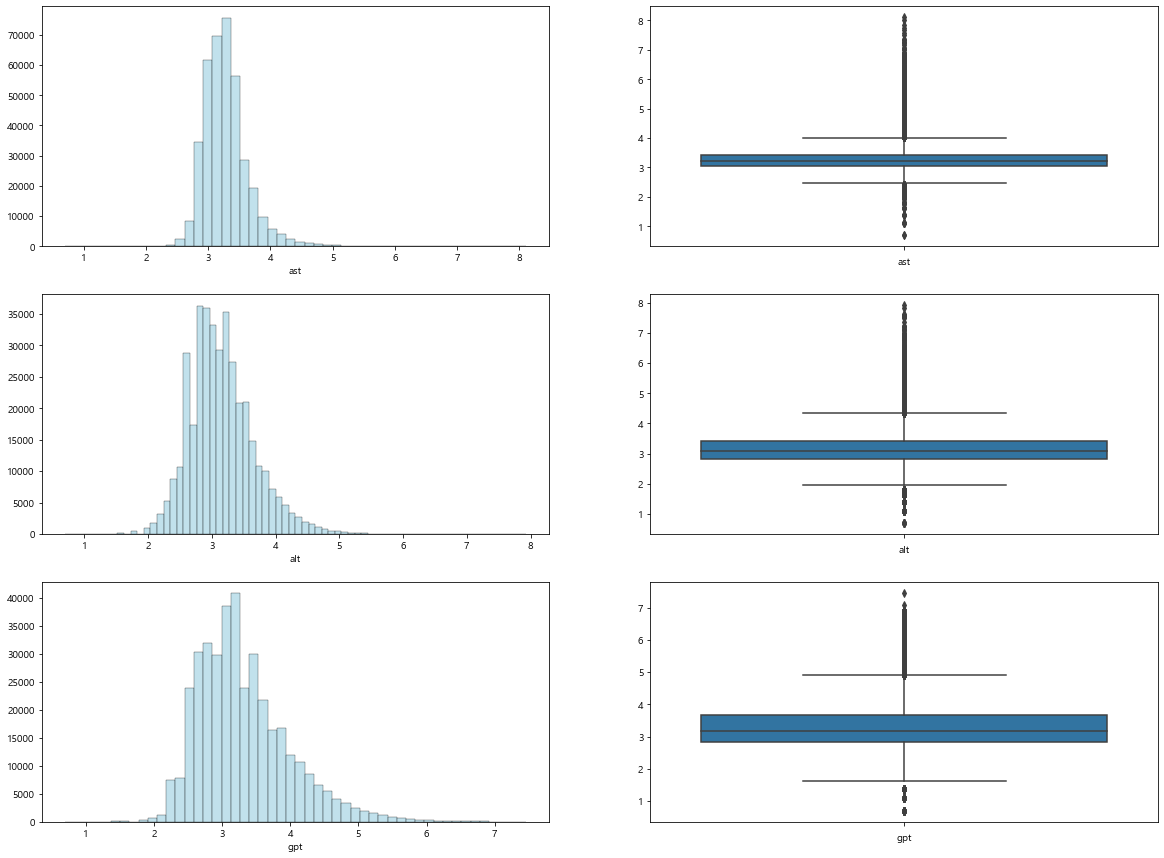

In [155]:
bins6=[ 50, 70, 50 ]

plt.figure(figsize=(20,15))
for idx, col in enumerate( df[numerical_features].columns[14:17] ):
    
    plt.subplot( 3,2,2*idx+1 )
    sns.histplot(np.log(df[col]+1), bins=bins6[idx], color='lightblue', linewidth=0.3)
    plt.xlabel(col)
    plt.ylabel('')
    
    plt.subplot( 3,2,2*idx+2 )
    sns.boxplot(y= np.log(df[col]+1) )
    plt.xlabel(col)
    plt.ylabel('')

plt.show()

대부분의 값들이 왼쪽에 극단적으로 치우쳐져 있어 해석에 어려움이 있다.
따라서 아래에서 로그스케일링을 통해 그래프를 살펴본다.

In [156]:
df[['ast', 'alt', 'gpt']].describe()

,ast,alt,gpt
count,383541.000000,383540.000000,383540.000000
mean,27.563759,26.365644,35.722645
std,21.091797,24.287311,46.214611
min,1.000000,1.000000,1.000000
25%,20.000000,16.000000,16.000000
50%,24.000000,21.000000,23.000000
75%,30.000000,30.000000,38.000000
max,3315.000000,2772.000000,1731.000000


#### 이상한 gpt값 발견?!

In [157]:
print(len(df[df['gpt']==999]))
print(len(df[ (df['gpt']>=800) & (df['gpt']<1500) ]))

69
169


단일 값이 이렇게 많은 count를 갖기 어렵다고 판단. 일부분만 시각화 해보자

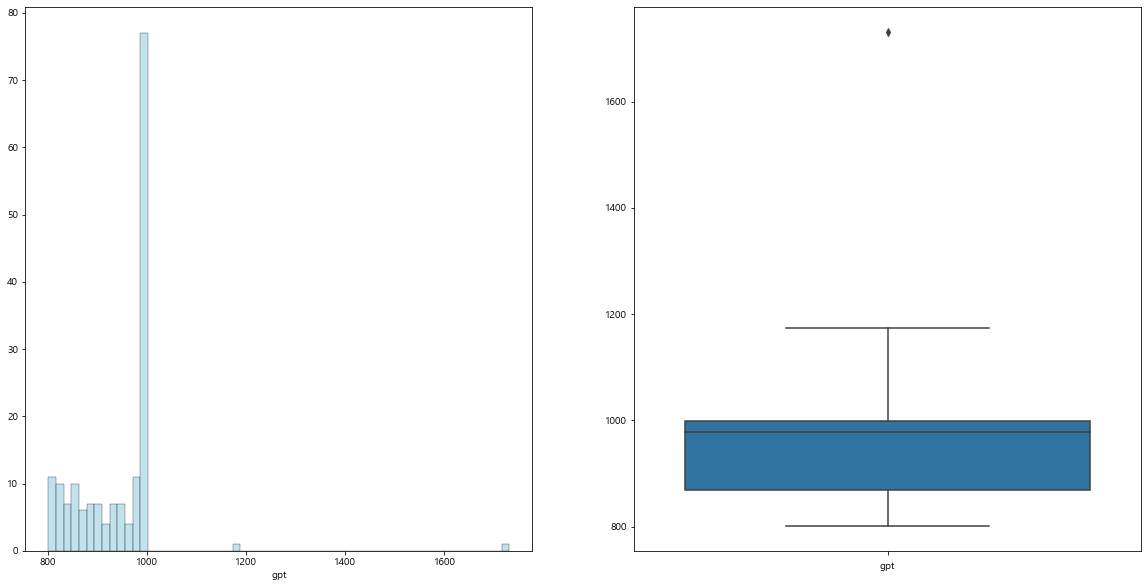

In [158]:
# 이상한 999값의 존재 파악
a=df[ (df['gpt']>=800) & (df['gpt']<2000) ]

plt.figure(figsize=(20,10))
    
plt.subplot( 1,2,1 )
sns.histplot(a['gpt'], bins=60, color='lightblue', linewidth=0.3)
plt.xlabel("gpt")
plt.ylabel('')
    
plt.subplot( 1,2,2 )
sns.boxplot(y=a['gpt'])
plt.xlabel("gpt")
plt.ylabel('')

plt.show()

gpt값이 999인 행들은 모두 NA값이라고 확신. NA처리 할 것!

In [159]:
df.loc[df['gpt']==999,'gpt']=np.nan

In [160]:
print( np.percentile(df['ast'], [95,97.5,99,99.5,99.9], interpolation='nearest') )
print( np.percentile(df['alt'].dropna(), [95,97.5,99,99.5,99.9], interpolation='nearest') )
print( np.percentile(df['gpt'].dropna(), [95,97.5,99,99.5,99.9], interpolation='nearest') )

[ 49.  61.  83. 105. 192.]
[ 58.  75. 102. 126. 220.]
[ 97. 138. 212. 288. 549.]


In [161]:
#36개의 행 삭제
drop_index9 = df[(df['ast'] >= 200)|(df['alt'] >= 200)|(df['gpt'] >= 200)].index
len(drop_index9)

4789

In [162]:
df.drop(drop_index9 , inplace=True)

- 간 수치의 위험수준 중 1 percentile보다 작은 중증수치 400을 이상치 기준으로 행 삭제

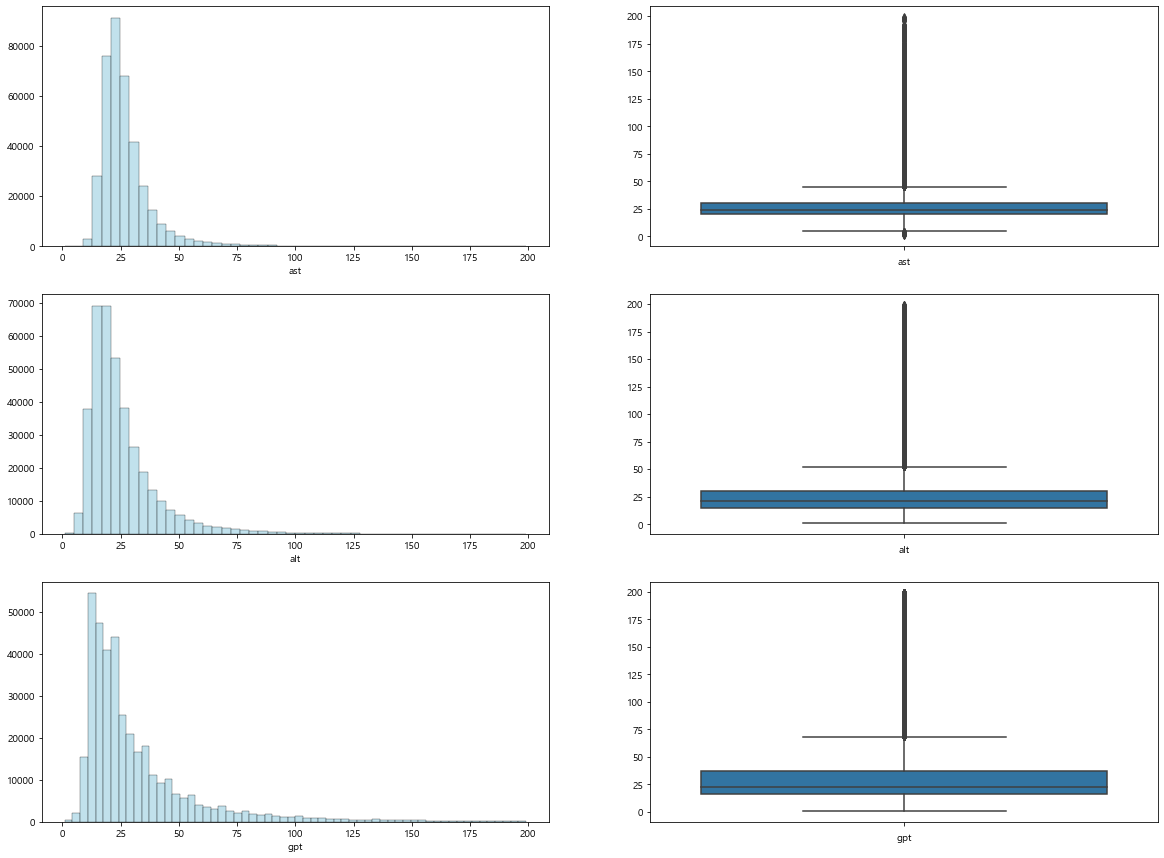

In [163]:
bins5=[ 50, 50, 60 ]

plt.figure(figsize=(20,15))
for idx, col in enumerate( df[numerical_features].columns[14:17] ):
    
    plt.subplot( 3,2,2*idx+1 )
    sns.histplot(data=df, x=df[col], bins=bins5[idx], color='lightblue', linewidth=0.3)
    plt.xlabel(col)
    plt.ylabel('')
    
    plt.subplot( 3,2,2*idx+2 )
    sns.boxplot(y=df[col],data=df)
    plt.xlabel(col)
    plt.ylabel('')

plt.show()

#### 흡연과 간수치 변수들 사이의 관계

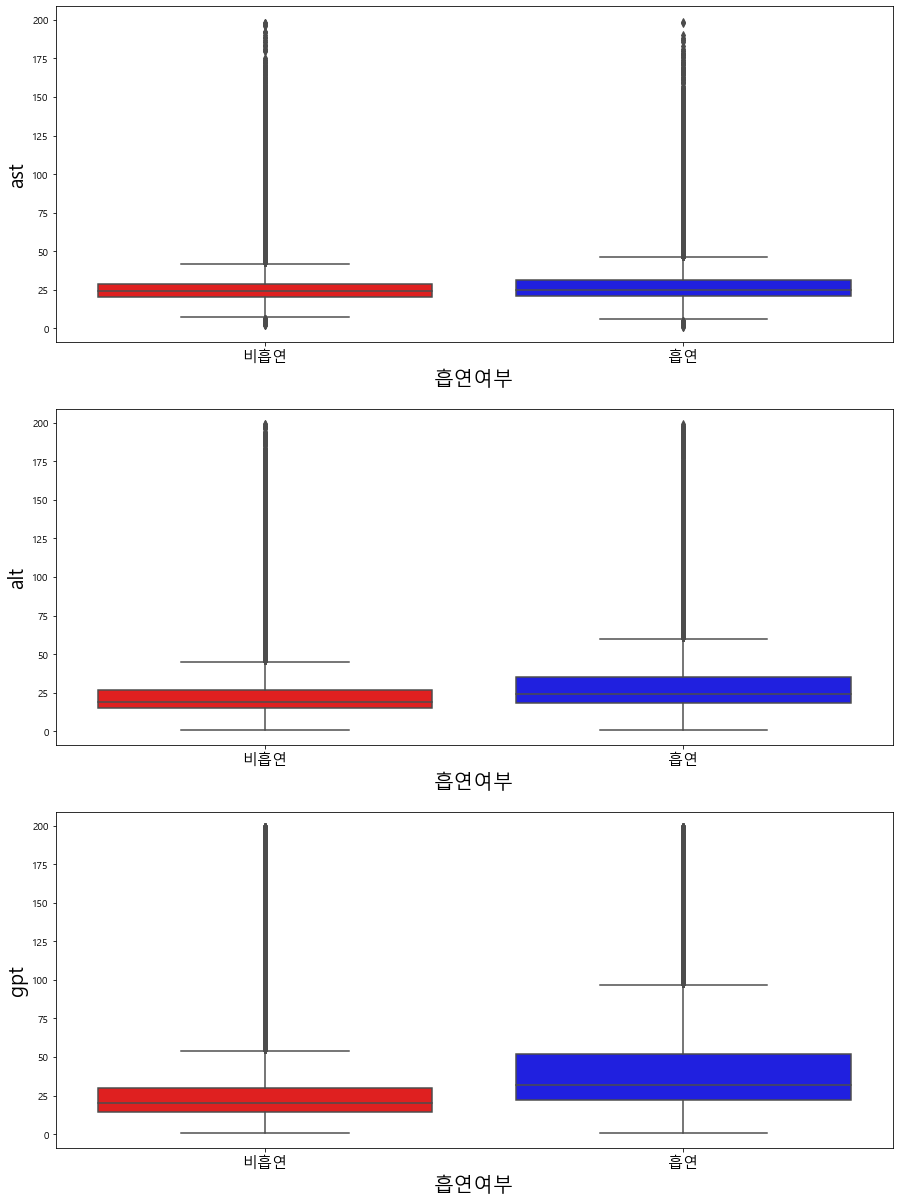

In [164]:
plt.figure(figsize=(15,21))

plt.subplot( 3,1,1 )
sns.boxplot(x="흡연", y="ast", palette=["red", "blue"], data=df)
plt.xticks([0, 1],['비흡연', '흡연'],size=15)
plt.xlabel("흡연여부", size=20)
plt.ylabel("ast", size=20)

plt.subplot( 3,1,2 )
sns.boxplot(x="흡연", y="alt", palette=["red", "blue"], data=df)
plt.xticks([0, 1],['비흡연', '흡연'],size=15)
plt.xlabel("흡연여부", size=20)
plt.ylabel("alt", size=20)

plt.subplot( 3,1,3 )
sns.boxplot(x="흡연", y="gpt", palette=["red", "blue"], data=df)
plt.xticks([0, 1],['비흡연', '흡연'],size=15)
plt.xlabel("흡연여부", size=20)
plt.ylabel("gpt", size=20)

plt.show()

간수치 변수들은 흡연여부에 따라 흡연자집단이 더 높은 경향을 보였다.

In [165]:
#정규성을 따르지 않으므로 비모수 검정 진행
#맨휘트니 U Test
#ast 0, alt 1, gpt 23 개의 NA는 무시하고 진행
print("ast, (비흡연) vs (흡연) : ",mannwhitneyu( df.loc[df['흡연']==1,'ast'].dropna(), 
                                           df.loc[df['흡연']==2,'ast'].dropna(), alternative='less'))
print("alt, (비흡연) vs (흡연) : ",mannwhitneyu( df.loc[df['흡연']==1,'alt'].dropna(), 
                                           df.loc[df['흡연']==2,'alt'].dropna(), alternative='less'))
print("gpt, (비흡연) vs (흡연) : ",mannwhitneyu( df.loc[df['흡연']==1,'gpt'].dropna(), 
                                           df.loc[df['흡연']==2,'gpt'].dropna(), alternative='less'))


ast, (비흡연) vs (흡연) :  MannwhitneyuResult(statistic=14527029922.5, pvalue=0.0)
alt, (비흡연) vs (흡연) :  MannwhitneyuResult(statistic=12151532477.5, pvalue=0.0)
gpt, (비흡연) vs (흡연) :  MannwhitneyuResult(statistic=9247887580.0, pvalue=0.0)


- 귀무가설 "H0: 간수치 변수 @는 흡연여부 집단에 따라 차이가 없다."는 유의수준 0.05 하에서 기각할 근거가 충분하다.
- 세 변수 모두 흡연여부 집단에 따라 평균 값에 차이가 있다.

### 범주화한 ast변수가 흡연(타겟)과 관계가 있는가

In [166]:
df['ast_cat']=pd.cut(df["ast"],[0,40,10000], right=False, labels=['정상', '높음'])

In [167]:
df['ast_cat'].value_counts()

정상    343790
높음     34962
Name: ast_cat, dtype: int64

In [168]:
# Data
r = [0,1]
raw_data3 = { 
            '정상': [ df[df['ast_cat']=="정상"]['흡연'].value_counts()[0], 
                          df[df['ast_cat']=="정상"]['흡연'].value_counts()[1] ],
            '높음': [ df[df['ast_cat']=="높음"]['흡연'].value_counts()[0], 
                      df[df['ast_cat']=="높음"]['흡연'].value_counts()[1] ]}
smoke_ast_df = pd.DataFrame(raw_data3)

In [169]:
smoke_ast_df

,정상,높음
0,226097,19608
1,117693,15354


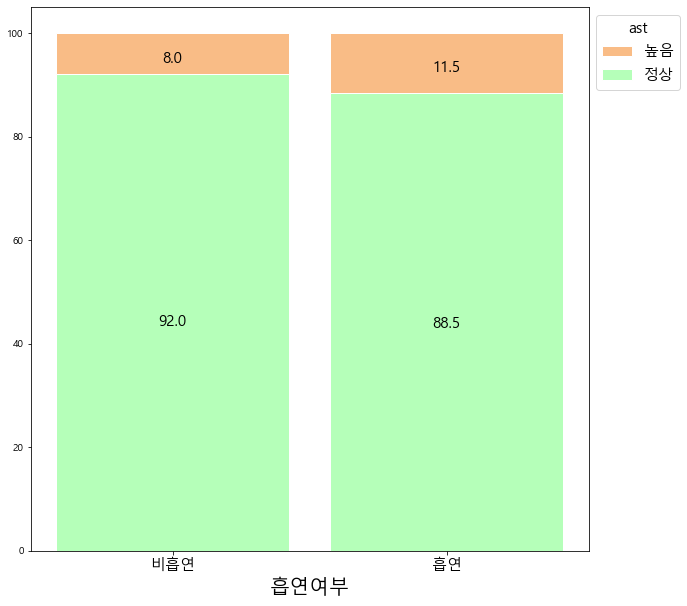

In [170]:
# From raw value to percentage
totals = [i+j for i,j in zip( smoke_ast_df["정상"], smoke_ast_df["높음"] )]
nomal = [i / j * 100 for i,j in zip(smoke_ast_df["정상"], totals)]
high = [i / j * 100 for i,j in zip(smoke_ast_df["높음"], totals)]

# plot 설정
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

# plot
barWidth = 0.85
names = ('비흡연','흡연')

# Create orange Bars
plot2=ax.bar(r, nomal, color='#b5ffb9', edgecolor='white', width=barWidth, label="정상")
plot1=ax.bar(r, high, bottom=nomal, color='#f9bc86', edgecolor='white', width=barWidth, label="높음")

# Add a legend : 범례순서
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, handles=[plot1,plot2], fontsize=15, title="ast",title_fontsize=15) 

# 숫자 넣는 부분 : 직접 조절
for rect1 in plot1:
    height1 = rect1.get_height() 
    plt.text(rect1.get_x() + rect1.get_width()/2.0, (100-height1)/2 + 49, '%.1f' % height1, ha='center', va='center', size = 15)
for rect2 in plot2:
    height2 = rect2.get_height()
    plt.text(rect2.get_x() + rect2.get_width()/2.0, height2/10+35, '%.1f' % height2, ha='center', va='center', size = 15)

# Custom x axis
plt.xticks(r, names, size=15)
plt.xlabel("흡연여부", size=20)
 
# Show graphic
plt.show()

- 흡연자 집단의 ast 정상비율이 더 낮은 경향이 있다.
- 범주형 변수로 사용 별로임

## 결측치 NA처리

In [171]:
print(df.shape)
df2=df.copy()
df2.isna().sum()

(378752, 27)


성별             0
연령대            0
신장             0
체중             0
허리둘레          61
시력(좌)       1571
시력(우)       1646
청력(좌)         96
청력(우)         98
수축기           10
이완기           10
공복혈당           0
총콜레스테롤         0
트리글리세라이드       0
hdl            0
ldl            0
혈색소            7
요단백         1779
혈청크레아티닌        0
ast            0
alt            1
gpt           53
흡연             0
음주여부          59
혈당수준           0
혈색소_cat        7
ast_cat        0
dtype: int64

In [172]:
#결측치 대체에 별 도움이 안될 것 같은 변수 제거
#대체할 행만 더 증가시키는 꼴이라 삭제
df2.drop(['시력(좌)','시력(우)','청력(좌)','청력(우)'],axis=1,inplace=True)

In [173]:
print(df2.shape)
df2.isna().sum(1).value_counts().sort_index()

(378752, 23)


0    376793
1      1938
2        14
3         7
dtype: int64

In [174]:
df2.head()

,성별,연령대,신장,체중,허리둘레,수축기,이완기,공복혈당,총콜레스테롤,트리글리세라이드,hdl,ldl,혈색소,요단백,혈청크레아티닌,ast,alt,gpt,흡연,음주여부,혈당수준,혈색소_cat,ast_cat
0,1,40,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,2,정상,정상
4,2,55,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,3,낮음,정상
5,1,40,185,85,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.0,1.1,25.0,32.0,26.0,2.0,1.0,2,정상,정상
8,2,80,150,50,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,1.0,0.7,42.0,48.0,39.0,1.0,0.0,3,정상,높음
10,2,75,155,55,84.0,128.0,70.0,92.0,152.0,175.0,32.0,85.0,13.0,1.0,0.7,24.0,22.0,12.0,1.0,0.0,2,정상,정상


- 범주형 변수는 최빈 값으로 simple inputation
-----------------------
- ldl 7842개는 먼저 1) 트리글리세라이드를 활용한 공식으로 대체
-----------------------
- 허리둘레(62), 수축기(10), 이완기(10), ast(1), 혈색소(7), 요단백(1883), gpt(101), 음주여부(7) 변수는 MICE(Multivariate Imputation by Chained Equation) 알고리즘을 활용
-----------------------
- 근거 1.knn은 이상치에 민감함 2. 행 개수에 비해 결측치 수가 매우 적은 편임.
-----------------------
- 혈색소_cat는 혈색소 변수가 결측이기 때문에 생긴 결측이므로 먼저 혈색소 변수의 결측치를 대체 한 후 다시 한 번 대체

In [175]:
numerical_features2=df2.select_dtypes(include=numerics).columns
category_feature2 = df2.select_dtypes(include='category').columns

In [176]:
category_feature2

Index(['성별', '연령대', '요단백', '흡연', '음주여부', '혈당수준', '혈색소_cat', 'ast_cat'], dtype='object')

In [177]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit( df2[['요단백','음주여부']] )
imputed_df = imp_mean.transform( df2[['요단백','음주여부']] )
imputed_df2=pd.DataFrame(imputed_df,columns=['요단백','음주여부'])

In [178]:
imputed_df2['요단백']=imputed_df2['요단백'].astype('category')
imputed_df2['음주여부']=imputed_df2['음주여부'].astype('category')

In [179]:
# 결측치가 있던 범주형변수 요단백과 음주여부만 뽑아서 최빈값 대체
print(imputed_df2.shape)
imputed_df2.isna().sum()

(378752, 2)


요단백     0
음주여부    0
dtype: int64

In [180]:
#수치형변수들과 결측치대체된 두 개의 범주형 변수
df3=pd.concat( [  df2[numerical_features2].reset_index(drop=True), imputed_df2], axis=1 )

In [181]:
print(df3.shape)
df3.isna().sum()

(378752, 17)


신장           0
체중           0
허리둘레        61
수축기         10
이완기         10
공복혈당         0
총콜레스테롤       0
트리글리세라이드     0
hdl          0
ldl          0
혈색소          7
혈청크레아티닌      0
ast          0
alt          1
gpt         53
요단백          0
음주여부         0
dtype: int64

In [182]:
print( df2[['성별','연령대']].shape )
df2[['성별','연령대']]

(378752, 2)


,성별,연령대
0,1,40
4,2,55
5,1,40
8,2,80
10,2,75
...,...,...
999992,1,60
999995,2,60
999996,2,55
999998,2,40


In [183]:
#타겟변수를 제외한 모든 기본 변수 (파생변수는 X)
df4=pd.concat( [df3,
             df2[['성별','연령대']].reset_index(drop=True)],
             axis=1)

In [184]:
print(df4.shape)
df4

(378752, 19)


,신장,체중,허리둘레,수축기,이완기,공복혈당,총콜레스테롤,트리글리세라이드,hdl,ldl,혈색소,혈청크레아티닌,ast,alt,gpt,요단백,음주여부,성별,연령대
0,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.1,21.0,27.0,21.0,1.0,0.0,1,40
1,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,0.7,18.0,17.0,14.0,1.0,0.0,2,55
2,185,85,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.1,25.0,32.0,26.0,1.0,1.0,1,40
3,150,50,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,0.7,42.0,48.0,39.0,1.0,0.0,2,80
4,155,55,84.0,128.0,70.0,92.0,152.0,175.0,32.0,85.0,13.0,0.7,24.0,22.0,12.0,1.0,0.0,2,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378747,175,90,99.5,120.0,74.0,98.0,142.0,121.0,38.0,79.0,15.1,0.8,66.0,58.0,36.0,1.0,1.0,1,60
378748,145,55,81.0,132.0,78.0,124.0,178.0,301.0,43.0,75.0,13.6,0.6,21.0,25.0,18.0,1.0,0.0,2,60
378749,160,55,76.5,100.0,64.0,98.0,288.0,93.0,71.0,198.0,14.0,0.8,21.0,14.0,19.0,1.0,1.0,2,55
378750,160,70,91.0,137.0,82.0,111.0,208.0,113.0,59.0,126.0,11.9,1.0,25.0,29.0,13.0,1.0,0.0,2,40


In [185]:
df5=pd.get_dummies(df4)

In [186]:
print(df5.shape)
df5

(378752, 31)


,신장,체중,허리둘레,수축기,이완기,공복혈당,총콜레스테롤,트리글리세라이드,hdl,ldl,혈색소,혈청크레아티닌,ast,alt,gpt,요단백_1.0,요단백_2.0,음주여부_0.0,음주여부_1.0,성별_1,성별_2,연령대_40,연령대_45,연령대_50,연령대_55,연령대_60,연령대_65,연령대_70,연령대_75,연령대_80,연령대_85
0,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.1,21.0,27.0,21.0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
1,155,50,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,0.7,18.0,17.0,14.0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
2,185,85,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.1,25.0,32.0,26.0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
3,150,50,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,0.7,42.0,48.0,39.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
4,155,55,84.0,128.0,70.0,92.0,152.0,175.0,32.0,85.0,13.0,0.7,24.0,22.0,12.0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378747,175,90,99.5,120.0,74.0,98.0,142.0,121.0,38.0,79.0,15.1,0.8,66.0,58.0,36.0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
378748,145,55,81.0,132.0,78.0,124.0,178.0,301.0,43.0,75.0,13.6,0.6,21.0,25.0,18.0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
378749,160,55,76.5,100.0,64.0,98.0,288.0,93.0,71.0,198.0,14.0,0.8,21.0,14.0,19.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
378750,160,70,91.0,137.0,82.0,111.0,208.0,113.0,59.0,126.0,11.9,1.0,25.0,29.0,13.0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0


In [187]:
#####7분걸림####
#먼저 수치형변수로만 갖고 결측치가 있는 수치형변수부터 mice 처리

#변환
from impyute.imputation.cs import mice
np_imputed=mice(df5.values) # mice 학습시작
df_imputed = pd.DataFrame(np_imputed,columns=df5.columns)

# 변환 후 데이터 확인
df_imputed.head(10)

,신장,체중,허리둘레,수축기,이완기,공복혈당,총콜레스테롤,트리글리세라이드,hdl,ldl,혈색소,혈청크레아티닌,ast,alt,gpt,요단백_1.0,요단백_2.0,음주여부_0.0,음주여부_1.0,성별_1,성별_2,연령대_40,연령대_45,연령대_50,연령대_55,연령대_60,연령대_65,연령대_70,연령대_75,연령대_80,연령대_85
0,165.0,60.0,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.1,21.0,27.0,21.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,155.0,50.0,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,0.7,18.0,17.0,14.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,185.0,85.0,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.1,25.0,32.0,26.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,150.0,50.0,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,0.7,42.0,48.0,39.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,155.0,55.0,84.0,128.0,70.0,92.0,152.0,175.0,32.0,85.0,13.0,0.7,24.0,22.0,12.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,160.0,65.0,90.0,138.0,88.0,94.0,223.0,328.0,46.0,111.0,16.6,1.0,29.0,54.0,24.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,155.0,50.0,65.9,114.0,73.0,94.0,254.0,85.0,55.0,182.0,11.8,0.8,24.0,14.0,12.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,165.0,55.0,77.5,130.0,70.0,87.0,174.0,122.0,36.0,113.0,16.0,0.9,18.0,10.0,15.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,155.0,60.0,82.0,139.0,85.0,104.0,195.0,75.0,57.0,112.0,14.3,1.4,33.0,22.0,29.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,155.0,60.0,77.0,136.0,82.0,92.0,175.0,73.0,59.0,101.0,13.7,0.7,35.0,44.0,27.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
#결측치 모두 처리된 것 확인
df_imputed.isna().sum()

신장          0
체중          0
허리둘레        0
수축기         0
이완기         0
공복혈당        0
총콜레스테롤      0
트리글리세라이드    0
hdl         0
ldl         0
혈색소         0
혈청크레아티닌     0
ast         0
alt         0
gpt         0
요단백_1.0     0
요단백_2.0     0
음주여부_0.0    0
음주여부_1.0    0
성별_1        0
성별_2        0
연령대_40      0
연령대_45      0
연령대_50      0
연령대_55      0
연령대_60      0
연령대_65      0
연령대_70      0
연령대_75      0
연령대_80      0
연령대_85      0
dtype: int64

In [189]:
df5_1=df_imputed.copy()
df5_1['흡연']=df2['흡연'].reset_index(drop=True)

In [190]:
df5_1

,신장,체중,허리둘레,수축기,이완기,공복혈당,총콜레스테롤,트리글리세라이드,hdl,ldl,혈색소,혈청크레아티닌,ast,alt,gpt,요단백_1.0,요단백_2.0,음주여부_0.0,음주여부_1.0,성별_1,성별_2,연령대_40,연령대_45,연령대_50,연령대_55,연령대_60,연령대_65,연령대_70,연령대_75,연령대_80,연령대_85,흡연
0,165.0,60.0,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.1,21.0,27.0,21.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,155.0,50.0,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,0.7,18.0,17.0,14.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,185.0,85.0,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.1,25.0,32.0,26.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,150.0,50.0,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,0.7,42.0,48.0,39.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,155.0,55.0,84.0,128.0,70.0,92.0,152.0,175.0,32.0,85.0,13.0,0.7,24.0,22.0,12.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378747,175.0,90.0,99.5,120.0,74.0,98.0,142.0,121.0,38.0,79.0,15.1,0.8,66.0,58.0,36.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
378748,145.0,55.0,81.0,132.0,78.0,124.0,178.0,301.0,43.0,75.0,13.6,0.6,21.0,25.0,18.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
378749,160.0,55.0,76.5,100.0,64.0,98.0,288.0,93.0,71.0,198.0,14.0,0.8,21.0,14.0,19.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
378750,160.0,70.0,91.0,137.0,82.0,111.0,208.0,113.0,59.0,126.0,11.9,1.0,25.0,29.0,13.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 시각화 등 작업을 위해 원핫인코딩 전으로 돌려놓기

In [191]:
df6=df5_1.copy()

df6.loc[df6['성별_1']==1,'성별']=1
df6.loc[df6['성별_2']==1,'성별']=2

df6.loc[df6['연령대_40']==1,'연령대']=40
df6.loc[df6['연령대_45']==1,'연령대']=45
df6.loc[df6['연령대_50']==1,'연령대']=50
df6.loc[df6['연령대_55']==1,'연령대']=55
df6.loc[df6['연령대_60']==1,'연령대']=60
df6.loc[df6['연령대_65']==1,'연령대']=65
df6.loc[df6['연령대_70']==1,'연령대']=70
df6.loc[df6['연령대_75']==1,'연령대']=75
df6.loc[df6['연령대_80']==1,'연령대']=80
df6.loc[df6['연령대_85']==1,'연령대']=85

df6.loc[df6['요단백_1.0']==1,'요단백']=1
df6.loc[df6['요단백_2.0']==1,'요단백']=2

df6.loc[df6['음주여부_0.0']==1,'음주여부']=0
df6.loc[df6['음주여부_1.0']==1,'음주여부']=1



In [192]:
df6['성별']=df6['성별'].astype('category')
df6['연령대']=df6['연령대'].astype('category')
df6['요단백']=df6['요단백'].astype('category')
df6['음주여부']=df6['음주여부'].astype('category')

In [193]:
df6.columns

Index(['신장', '체중', '허리둘레', '수축기', '이완기', '공복혈당', '총콜레스테롤', '트리글리세라이드', 'hdl',
       'ldl', '혈색소', '혈청크레아티닌', 'ast', 'alt', 'gpt', '요단백_1.0', '요단백_2.0',
       '음주여부_0.0', '음주여부_1.0', '성별_1', '성별_2', '연령대_40', '연령대_45', '연령대_50',
       '연령대_55', '연령대_60', '연령대_65', '연령대_70', '연령대_75', '연령대_80', '연령대_85',
       '흡연', '성별', '연령대', '요단백', '음주여부'],
      dtype='object')

In [194]:
df6.drop(['성별_1', '성별_2', '연령대_40', '연령대_45', '연령대_50', '연령대_55', '연령대_60',
       '연령대_65', '연령대_70', '연령대_75', '연령대_80', '연령대_85', '요단백_1.0', '요단백_2.0',
          '음주여부_0.0', '음주여부_1.0'],axis=1,inplace=True)

In [195]:
print(df6.shape)
df6.info()

(378752, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378752 entries, 0 to 378751
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   신장        378752 non-null  float64 
 1   체중        378752 non-null  float64 
 2   허리둘레      378752 non-null  float64 
 3   수축기       378752 non-null  float64 
 4   이완기       378752 non-null  float64 
 5   공복혈당      378752 non-null  float64 
 6   총콜레스테롤    378752 non-null  float64 
 7   트리글리세라이드  378752 non-null  float64 
 8   hdl       378752 non-null  float64 
 9   ldl       378752 non-null  float64 
 10  혈색소       378752 non-null  float64 
 11  혈청크레아티닌   378752 non-null  float64 
 12  ast       378752 non-null  float64 
 13  alt       378752 non-null  float64 
 14  gpt       378752 non-null  float64 
 15  흡연        378752 non-null  category
 16  성별        378752 non-null  category
 17  연령대       378752 non-null  category
 18  요단백       378752 non-null  category
 19  음주여부      

In [196]:
df6.head()

,신장,체중,허리둘레,수축기,이완기,공복혈당,총콜레스테롤,트리글리세라이드,hdl,ldl,혈색소,혈청크레아티닌,ast,alt,gpt,흡연,성별,연령대,요단백,음주여부
0,165.0,60.0,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.1,21.0,27.0,21.0,1.0,1.0,40.0,1.0,0.0
1,155.0,50.0,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,0.7,18.0,17.0,14.0,1.0,2.0,55.0,1.0,0.0
2,185.0,85.0,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.1,25.0,32.0,26.0,2.0,1.0,40.0,1.0,1.0
3,150.0,50.0,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,0.7,42.0,48.0,39.0,1.0,2.0,80.0,1.0,0.0
4,155.0,55.0,84.0,128.0,70.0,92.0,152.0,175.0,32.0,85.0,13.0,0.7,24.0,22.0,12.0,1.0,2.0,75.0,1.0,0.0


## 변수 추가 전처리 : 파생변수생성, 군집화

### <신체정보 변수>
- 신체정보가 내포된 bmi,복부비만도라는 파생변수 생성 : 변수가 줄어드는 효과

#### 파생변수 : bmi 생성

In [197]:
df6['bmi'] = round( df6['체중']/((df6['신장']/100)**2), 1 )
df6[['bmi','체중','신장']]

,bmi,체중,신장
0,22.0,60.0,165.0
1,20.8,50.0,155.0
2,24.8,85.0,185.0
3,22.2,50.0,150.0
4,22.9,55.0,155.0
...,...,...,...
378747,29.4,90.0,175.0
378748,26.2,55.0,145.0
378749,21.5,55.0,160.0
378750,27.3,70.0,160.0


In [198]:
df6["bmi"].describe()

count    378752.000000
mean         24.155253
std           3.540872
min          10.400000
25%          21.500000
50%          23.900000
75%          26.100000
max          57.800000
Name: bmi, dtype: float64

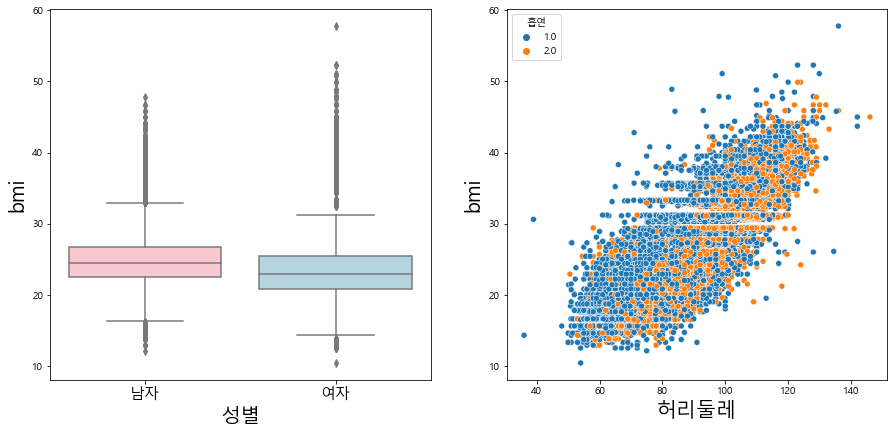

In [199]:
plt.figure(figsize=(15,15))
plt.subplot( 2,2,1 )
sns.boxplot(x="성별", y="bmi", palette=["pink", "lightblue"], data=df6)
plt.xticks([0, 1],['남자', '여자'],size=15)
plt.xlabel("성별", size=20)
plt.ylabel("bmi", size=20)

plt.subplot( 2,2,2 )
sns.scatterplot(x="허리둘레", y="bmi", hue="흡연", data=df6)
plt.xlabel("허리둘레", size=20)
plt.ylabel("bmi", size=20)

plt.show()

- 남여 간의 bmi차이가 나고 bmi와 허리둘레는 비례하는 관계를 보인다.
- 흡연 특징은 어떻게 해석하지?

#### 파생변수 : 복부비만 생성

- 0: 복부비만 아님 / 1: 복부비만임
- 여성은 85이상이 복부비만
- 남성은 90이상이 복부비만

In [200]:
conditions = [(df6['성별']==2)&(df6['허리둘레']>=85),
             (df6['성별']==2)&(df6['허리둘레']<85),
             (df6['성별']==1)&(df6['허리둘레']>=90),
             (df6['성별']==1)&(df6['허리둘레']<90)]
vals = [1,0,1,0]

df6['복부비만'] = np.select(conditions, vals)

In [201]:
df6['복부비만'].value_counts(0)

0    274827
1    103925
Name: 복부비만, dtype: int64

복부비만 여부에 따른 bmi를 확인

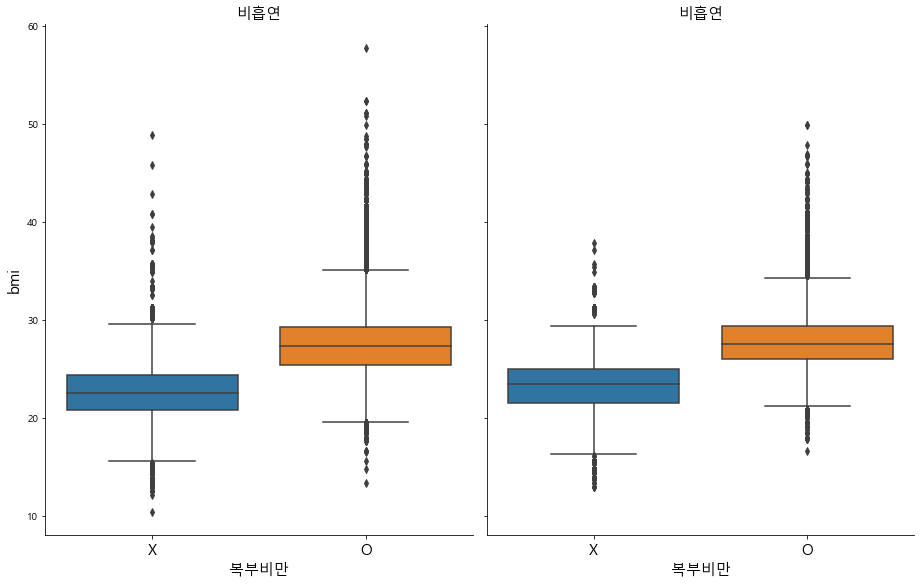

In [202]:
g=sns.catplot( data=df6, x="복부비만", y="bmi", col="흡연", kind="box",height=8,aspect=0.8,legend=None)

g.set_axis_labels("복부비만","bmi",size=15)
g.set_xticklabels(['X', 'O'], size=15)
g.set_titles("비흡연","흡연", size=15)


#### 흡연여부에 따른 복부비만율 비교

In [203]:
# Data
r = [0,1]
raw_data4 = { 
            'X': [ df6[df6['복부비만']==0]['흡연'].value_counts()[0], 
                          df6[df6['복부비만']==0]['흡연'].value_counts()[1] ],
            'O': [ df6[df6['복부비만']==1]['흡연'].value_counts()[0], 
                      df6[df6['복부비만']==1]['흡연'].value_counts()[1] ]}
obesity_smoke_df = pd.DataFrame(raw_data4)

In [204]:
obesity_smoke_df

,X,O
0,184048,61657
1,90779,42268


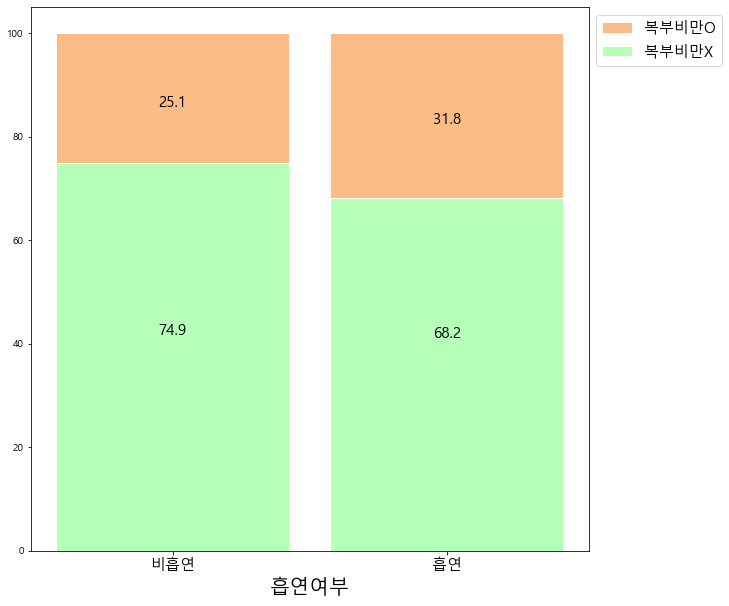

In [205]:
# From raw value to percentage
totals = [i+j for i,j in zip( obesity_smoke_df["X"], obesity_smoke_df["O"] )]
non_ob = [i / j * 100 for i,j in zip(obesity_smoke_df["X"], totals)]
ob = [i / j * 100 for i,j in zip(obesity_smoke_df["O"], totals)]

# plot 설정
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

# plot
barWidth = 0.85
names = ('비흡연','흡연')

# Create orange Bars
plot2=ax.bar(r, non_ob, color='#b5ffb9', edgecolor='white', width=barWidth, label="복부비만X")
plot1=ax.bar(r, ob, bottom=non_ob, color='#f9bc86', edgecolor='white', width=barWidth, label="복부비만O")

# Add a legend : 범례순서
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, handles=[plot1,plot2], fontsize=15) 

# 숫자 넣는 부분 : 직접 조절
for rect1 in plot1:
    height1 = rect1.get_height() 
    plt.text(rect1.get_x() + rect1.get_width()/2.0, (100-height1)/2 + 49, '%.1f' % height1, ha='center', va='center', size = 15)
for rect2 in plot2:
    height2 = rect2.get_height()
    plt.text(rect2.get_x() + rect2.get_width()/2.0, height2/10+35, '%.1f' % height2, ha='center', va='center', size = 15)

# Custom x axis
plt.xticks(r, names, size=15)
plt.xlabel("흡연여부", size=20)
 
# Show graphic
plt.show()

흡연자 집단의 복부비만율이 더 높다.

### 혈당수준

In [206]:
#1: 저혈당, 2: 정상, 3. 공복혈당장애, 4. 당뇨 
df6["혈당수준"]=pd.cut(df6["공복혈당"],[0,70,100,125,1000],  right=False, labels=[1, 2, 3, 4])

In [207]:
df6["혈당수준"]=df6["혈당수준"].astype('category')
df6["혈당수준"].value_counts().sort_index()

1      1503
2    203175
3    136952
4     37122
Name: 혈당수준, dtype: int64

### 혈색소 수준

In [208]:
# 혈색소를 수준별로 범주화한 파생변수 생성
# 성별에 따라 나누는 것이 포인트
df6.loc[df6['성별']==1,'혈색소_cat']=pd.cut(df6.loc[df6["성별"]==1,"혈색소"],[0,13.5,17.5,100], 
                      right=False, labels=['낮음', '정상', '높음'])
df6.loc[df6['성별']==2,'혈색소_cat']=pd.cut(df6.loc[df6["성별"]==2,"혈색소"],[0,12.5,15.5,100], 
                      right=False, labels=['낮음', '정상', '높음'])

In [209]:
df6['혈색소_cat']=df6['혈색소_cat'].astype("category")
df6['혈색소_cat'].value_counts()

정상    317030
낮음     54275
높음      7447
Name: 혈색소_cat, dtype: int64

In [210]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378752 entries, 0 to 378751
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   신장        378752 non-null  float64 
 1   체중        378752 non-null  float64 
 2   허리둘레      378752 non-null  float64 
 3   수축기       378752 non-null  float64 
 4   이완기       378752 non-null  float64 
 5   공복혈당      378752 non-null  float64 
 6   총콜레스테롤    378752 non-null  float64 
 7   트리글리세라이드  378752 non-null  float64 
 8   hdl       378752 non-null  float64 
 9   ldl       378752 non-null  float64 
 10  혈색소       378752 non-null  float64 
 11  혈청크레아티닌   378752 non-null  float64 
 12  ast       378752 non-null  float64 
 13  alt       378752 non-null  float64 
 14  gpt       378752 non-null  float64 
 15  흡연        378752 non-null  category
 16  성별        378752 non-null  category
 17  연령대       378752 non-null  category
 18  요단백       378752 non-null  category
 19  음주여부      378752 non-nu

In [211]:
#df6.to_csv('df6.csv',index=False)

# 모델링

## 필요한 변수만 골라서 사용하기

In [212]:
df6

,신장,체중,허리둘레,수축기,이완기,공복혈당,총콜레스테롤,트리글리세라이드,hdl,ldl,혈색소,혈청크레아티닌,ast,alt,gpt,흡연,성별,연령대,요단백,음주여부,bmi,복부비만,혈당수준,혈색소_cat
0,165.0,60.0,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.1,21.0,27.0,21.0,1.0,1.0,40.0,1.0,0.0,22.0,0,2,정상
1,155.0,50.0,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,0.7,18.0,17.0,14.0,1.0,2.0,55.0,1.0,0.0,20.8,0,3,낮음
2,185.0,85.0,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.1,25.0,32.0,26.0,2.0,1.0,40.0,1.0,1.0,24.8,1,2,정상
3,150.0,50.0,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,0.7,42.0,48.0,39.0,1.0,2.0,80.0,1.0,0.0,22.2,0,3,정상
4,155.0,55.0,84.0,128.0,70.0,92.0,152.0,175.0,32.0,85.0,13.0,0.7,24.0,22.0,12.0,1.0,2.0,75.0,1.0,0.0,22.9,0,2,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378747,175.0,90.0,99.5,120.0,74.0,98.0,142.0,121.0,38.0,79.0,15.1,0.8,66.0,58.0,36.0,2.0,1.0,60.0,1.0,1.0,29.4,1,2,정상
378748,145.0,55.0,81.0,132.0,78.0,124.0,178.0,301.0,43.0,75.0,13.6,0.6,21.0,25.0,18.0,1.0,2.0,60.0,1.0,0.0,26.2,0,3,정상
378749,160.0,55.0,76.5,100.0,64.0,98.0,288.0,93.0,71.0,198.0,14.0,0.8,21.0,14.0,19.0,1.0,2.0,55.0,1.0,1.0,21.5,0,2,정상
378750,160.0,70.0,91.0,137.0,82.0,111.0,208.0,113.0,59.0,126.0,11.9,1.0,25.0,29.0,13.0,1.0,2.0,40.0,1.0,0.0,27.3,1,3,낮음


In [213]:
print(len(df6.columns))
df6.columns

24


Index(['신장', '체중', '허리둘레', '수축기', '이완기', '공복혈당', '총콜레스테롤', '트리글리세라이드', 'hdl',
       'ldl', '혈색소', '혈청크레아티닌', 'ast', 'alt', 'gpt', '흡연', '성별', '연령대', '요단백',
       '음주여부', 'bmi', '복부비만', '혈당수준', '혈색소_cat'],
      dtype='object')

In [214]:
df7=pd.concat([pd.get_dummies( df6.drop(['흡연'],axis=1) ),df6['흡연']],axis=1)
df7['흡연']=df7['흡연'].cat.rename_categories({1:0,2:1})

In [215]:
df7.head()

,신장,체중,허리둘레,수축기,이완기,공복혈당,총콜레스테롤,트리글리세라이드,hdl,ldl,혈색소,혈청크레아티닌,ast,alt,gpt,bmi,복부비만,성별_1.0,성별_2.0,연령대_40.0,연령대_45.0,연령대_50.0,연령대_55.0,연령대_60.0,연령대_65.0,연령대_70.0,연령대_75.0,연령대_80.0,연령대_85.0,요단백_1.0,요단백_2.0,음주여부_0.0,음주여부_1.0,혈당수준_1,혈당수준_2,혈당수준_3,혈당수준_4,혈색소_cat_낮음,혈색소_cat_정상,혈색소_cat_높음,흡연
0,165.0,60.0,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.1,21.0,27.0,21.0,22.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
1,155.0,50.0,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,0.7,18.0,17.0,14.0,20.8,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0
2,185.0,85.0,94.0,114.0,72.0,86.0,234.0,183.0,50.0,147.0,16.4,1.1,25.0,32.0,26.0,24.8,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1
3,150.0,50.0,82.0,136.0,65.0,104.0,177.0,61.0,63.0,101.0,13.3,0.7,42.0,48.0,39.0,22.2,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0
4,155.0,55.0,84.0,128.0,70.0,92.0,152.0,175.0,32.0,85.0,13.0,0.7,24.0,22.0,12.0,22.9,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0


In [216]:
len(df7.columns)

41

## XGBOOST

In [217]:
train, test= train_test_split(df7, test_size=0.2, 
                              random_state=0)
train_df, valid_df= train_test_split(train, test_size=0.25, 
                                     random_state=0)

In [218]:
X_train=train_df.drop(['흡연'],axis=1)
Y_train=train_df['흡연']
X_valid=valid_df.drop(['흡연'],axis=1)
Y_valid=valid_df['흡연']

In [219]:
evals0 = [(X_train, Y_train),(X_valid, Y_valid)]

In [220]:
xgb_0 = XGBClassifier(n_estimators = 100, max_depth = 5, learning_rate = 0.01, n_jobs=-1,
                                objective='binary:logistic')

xgb_0.fit(X_train, Y_train, eval_set = evals0, eval_metric = "logloss",early_stopping_rounds = 200, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [221]:
pred_xgb_0 = xgb_0.predict(X_valid)

print("Train Set 결과")
print("accuracy_score : ",round(accuracy_score(Y_valid, pred_xgb_0),3))
print("recall_score : ",round(recall_score(Y_valid, pred_xgb_0),3))
print("precision_score : ",round(precision_score(Y_valid, pred_xgb_0),3))
print("f1_score : ",round(f1_score(Y_valid, pred_xgb_0),3))

Train Set 결과
accuracy_score :  0.821
recall_score :  0.88
precision_score :  0.693
f1_score :  0.775


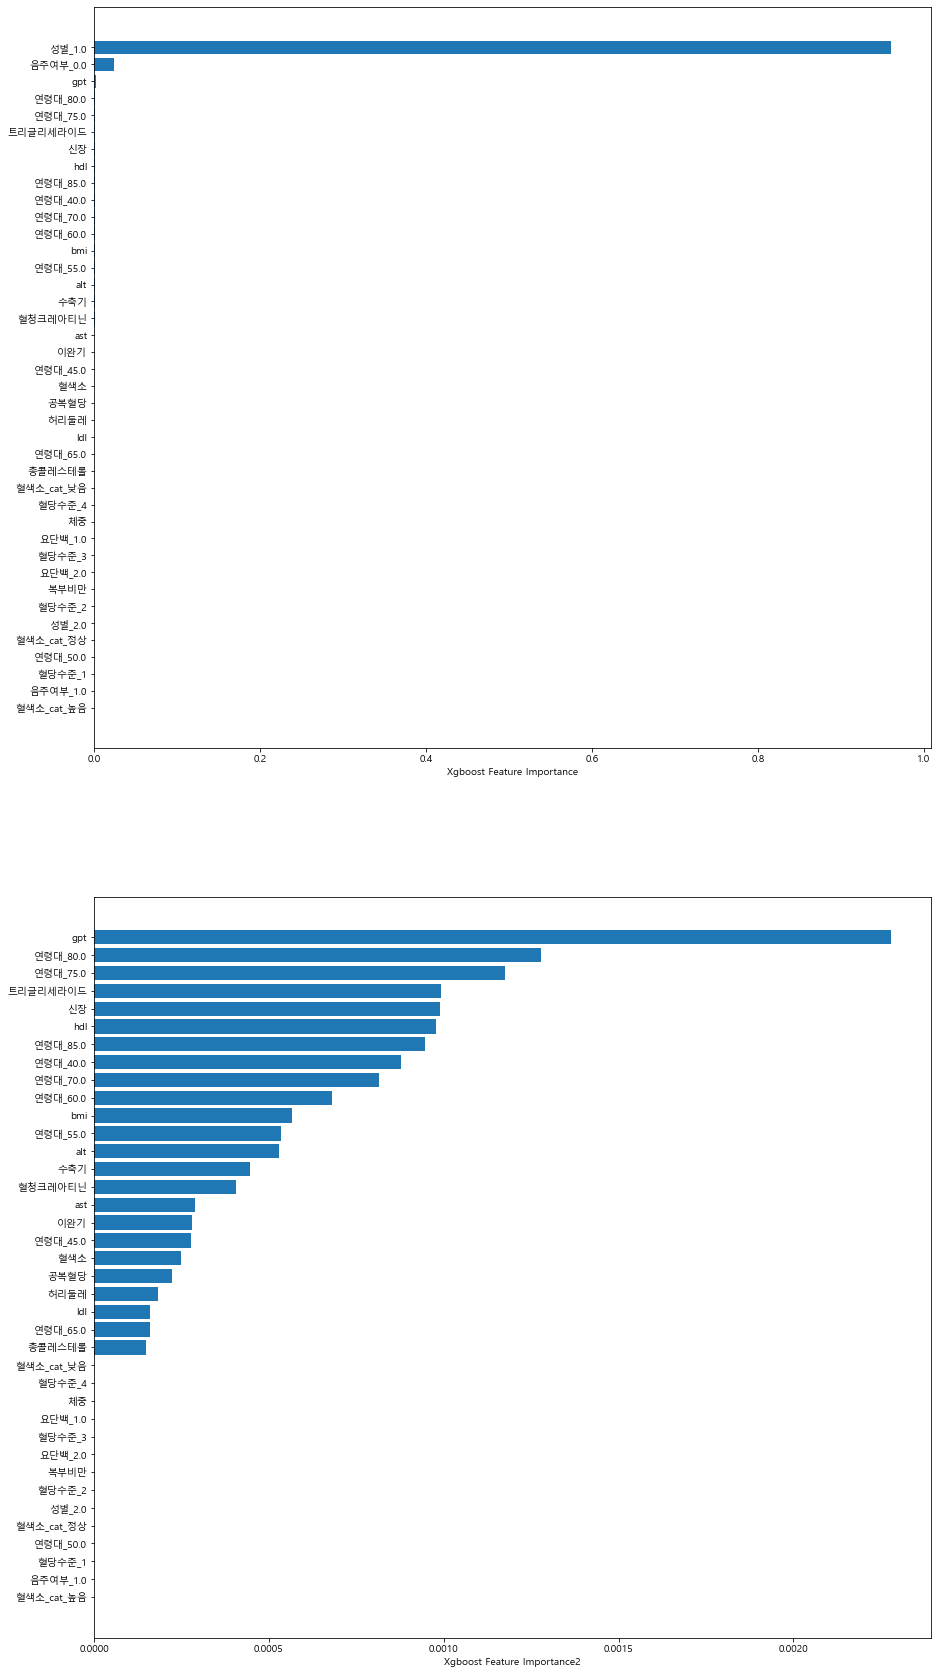

In [222]:
plt.figure(figsize=(15,30))
plt.subplot( 2,1,1 )
sorted_idx0 = xgb_0.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx0], xgb_0.feature_importances_[sorted_idx0])
plt.xlabel("Xgboost Feature Importance")

plt.subplot( 2,1,2 )
sorted_idx0 = xgb_0.feature_importances_.argsort()[0:38]
plt.barh(X_train.columns[sorted_idx0][0:38], xgb_0.feature_importances_[sorted_idx0][0:38])
plt.xlabel("Xgboost Feature Importance2")

plt.show()

### 변수선택

In [223]:
#연령대
#신장, 체중, 허리둘레 -> bmi, 복부비만
#ast -> alt
#ldl -> 총콜레스테롤
#혈색소 -> 혈색소_cat
df8=pd.concat([pd.get_dummies( df6[['수축기', '이완기', '공복혈당', 
                                          '총콜레스테롤', '트리글리세라이드', 'hdl', 
                                           '혈청크레아티닌','alt', 'gpt', 
                                          '성별', '연령대', '요단백','음주여부',
                                          'bmi', '복부비만', '혈당수준', '혈색소_cat']] ),df6['흡연']],axis=1)
df8['흡연']=df8['흡연'].cat.rename_categories({1:0,2:1})

In [224]:
df8.head()

,수축기,이완기,공복혈당,총콜레스테롤,트리글리세라이드,hdl,혈청크레아티닌,alt,gpt,bmi,복부비만,성별_1.0,성별_2.0,연령대_40.0,연령대_45.0,연령대_50.0,연령대_55.0,연령대_60.0,연령대_65.0,연령대_70.0,연령대_75.0,연령대_80.0,연령대_85.0,요단백_1.0,요단백_2.0,음주여부_0.0,음주여부_1.0,혈당수준_1,혈당수준_2,혈당수준_3,혈당수준_4,혈색소_cat_낮음,혈색소_cat_정상,혈색소_cat_높음,흡연
0,127.0,79.0,90.0,188.0,58.0,58.0,1.1,27.0,21.0,22.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
1,144.0,89.0,110.0,220.0,171.0,53.0,0.7,17.0,14.0,20.8,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0
2,114.0,72.0,86.0,234.0,183.0,50.0,1.1,32.0,26.0,24.8,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1
3,136.0,65.0,104.0,177.0,61.0,63.0,0.7,48.0,39.0,22.2,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0
4,128.0,70.0,92.0,152.0,175.0,32.0,0.7,22.0,12.0,22.9,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0


In [225]:
train1, test1= train_test_split(df8, test_size=0.2, 
                              random_state=0)
train_df1, valid_df1= train_test_split(train1, test_size=0.25, 
                                     random_state=0)

In [226]:
X_train1=train_df1.drop(['흡연'],axis=1)
Y_train1=train_df1['흡연']
X_valid1=valid_df1.drop(['흡연'],axis=1)
Y_valid1=valid_df1['흡연']

In [227]:
evals1 = [(X_train1, Y_train1),(X_valid1, Y_valid1)]

In [228]:
dtrain1 = xgb.DMatrix(data=X_train1, label=Y_train1)
dtest1 = xgb.DMatrix(data=X_valid1, label=Y_valid1)
 
 
def xgb_evaluate(max_depth, gamma, colsample_bytree,min_child_weight,eta,subsample):
    params = {'eval_metric': 'auc',
              'objective':'binary:logistic',
              'min_child_weight': min_child_weight,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain1, num_boost_round=100, nfold=5, metrics = 'auc',early_stopping_rounds=50, 
                       stratified=True, seed=0)    
    
    return cv_result['test-auc-mean'].iloc[-1] #제일 큰 값

xgb_bo1 = BayesianOptimization(xgb_evaluate, {'max_depth': (2, 10), 
                                             'gamma': (0, 10),
                                             'colsample_bytree': (0.2, 1),
                                            'min_child_weight': (1, 20),
                                            'eta':(0.1, 0.3),
                                            'subsample':(0.5,1.0)},random_state = 0 )
 
xgb_bo1.maximize(init_points=3, n_iter=20, acq='ei')
  # Bayesian optimization 객체 생성
  # f : 탐색 대상 함수, params : hyperparameter 집합
  # verbose = 2 항상 출력, verbose = 1 최댓값일 때 출력, verbose = 0 출력 안함
  # random_state : Bayesian Optimization 상의 랜덤성이 존재하는 부분을 통제 


  # 메소드를 이용해 최대화 과정 수행
  # init_points :  초기 Random Search 갯수
  # n_iter : 반복 횟수 (몇개의 입력값-함숫값 점들을 확인할지! 많을 수록 정확한 값을 얻을 수 있다.)
  # acq : Acquisition Function들 중 Expected Improvement(EI) 를 사용
  # xi : exploration 강도 (기본값은 0.0)

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.8881   |  0.6391   |  0.243    |  6.028    |  6.359    |  9.049    |  0.8229   |
|  2        |  0.8878   |  0.5501   |  0.2784   |  9.637    |  5.068    |  16.04    |  0.7644   |
|  3        |  0.8875   |  0.6544   |  0.2851   |  0.7104   |  2.697    |  1.384    |  0.9163   |
|  4        |  0.8879   |  0.2393   |  0.1376   |  6.63     |  6.414    |  8.883    |  0.5135   |
|  5        |  0.8882   |  0.4948   |  0.1487   |  5.546    |  6.741    |  9.332    |  0.9374   |
|  6        |  0.8881   |  0.8368   |  0.2181   |  4.953    |  5.571    |  9.048    |  0.5673   |
|  7        |  0.8876   |  0.9847   |  0.2536   |  5.16     |  6.577    |  8.565    |  0.9168   |
|  8        |  0.8883   |  0.3729   |  0.1446   |  5.388    |  6.561    |  9.355    |  0.9817   |
|  9        |  0.887

In [229]:
max_params1 = xgb_bo1.max['params']
max_params1

{'colsample_bytree': 0.7938672990569744,
 'eta': 0.12048809944807176,
 'gamma': 6.013957638155746,
 'max_depth': 6.518970067574378,
 'min_child_weight': 9.449131295002271,
 'subsample': 0.9883459496015293}

In [230]:
max_params1['colsample_bytree'] = round(max_params1['colsample_bytree'],2)
max_params1['eta'] = round(max_params1['eta'],2)
max_params1['gamma'] = int(max_params1['gamma'])
max_params1['max_depth'] = int(max_params1['max_depth'])
max_params1['min_child_weight'] = int(max_params1['min_child_weight'])
max_params1['subsample'] = round(max_params1['subsample'],2)
print(max_params1)

{'colsample_bytree': 0.79, 'eta': 0.12, 'gamma': 6, 'max_depth': 6, 'min_child_weight': 9, 'subsample': 0.99}


In [231]:
model_BO_xgb_tuend1 = XGBClassifier(**max_params1)
model_BO_xgb_tuend1.fit(X_train1, Y_train1, eval_set = evals1, eval_metric = "logloss",early_stopping_rounds = 200, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.79,
              early_stopping_rounds=None, enable_categorical=False, eta=0.12,
              eval_metric=None, gamma=6, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.119999997, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=9,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

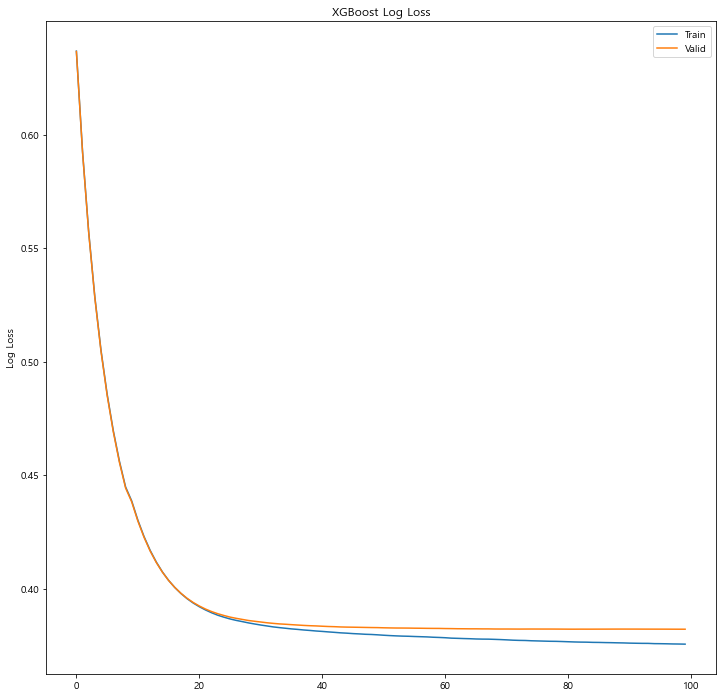

In [232]:
#retrieve performance metrics
results1 = model_BO_xgb_tuend1.evals_result()
epochs1 = len(results1['validation_0']['logloss'])
x_axis1 = range(0, epochs1)

# plot log loss
fig, ax = plt.subplots(figsize=(12,12))
ax.plot(x_axis1, results1['validation_0']['logloss'], label='Train')
ax.plot(x_axis1, results1['validation_1']['logloss'], label='Valid')
ax.legend()

plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

In [233]:
pred_xgb_1 = model_BO_xgb_tuend1.predict(X_valid1)

print("Valid Set 결과")
print("accuracy_score : ",round(accuracy_score(Y_valid1, pred_xgb_1),3))
print("recall_score : ",round(recall_score(Y_valid1, pred_xgb_1),3))
print("precision_score : ",round(precision_score(Y_valid1, pred_xgb_1),3))
print("f1_score : ",round(f1_score(Y_valid1, pred_xgb_1),3))

Valid Set 결과
accuracy_score :  0.822
recall_score :  0.861
precision_score :  0.701
f1_score :  0.773


In [234]:
len(df8.columns)

35

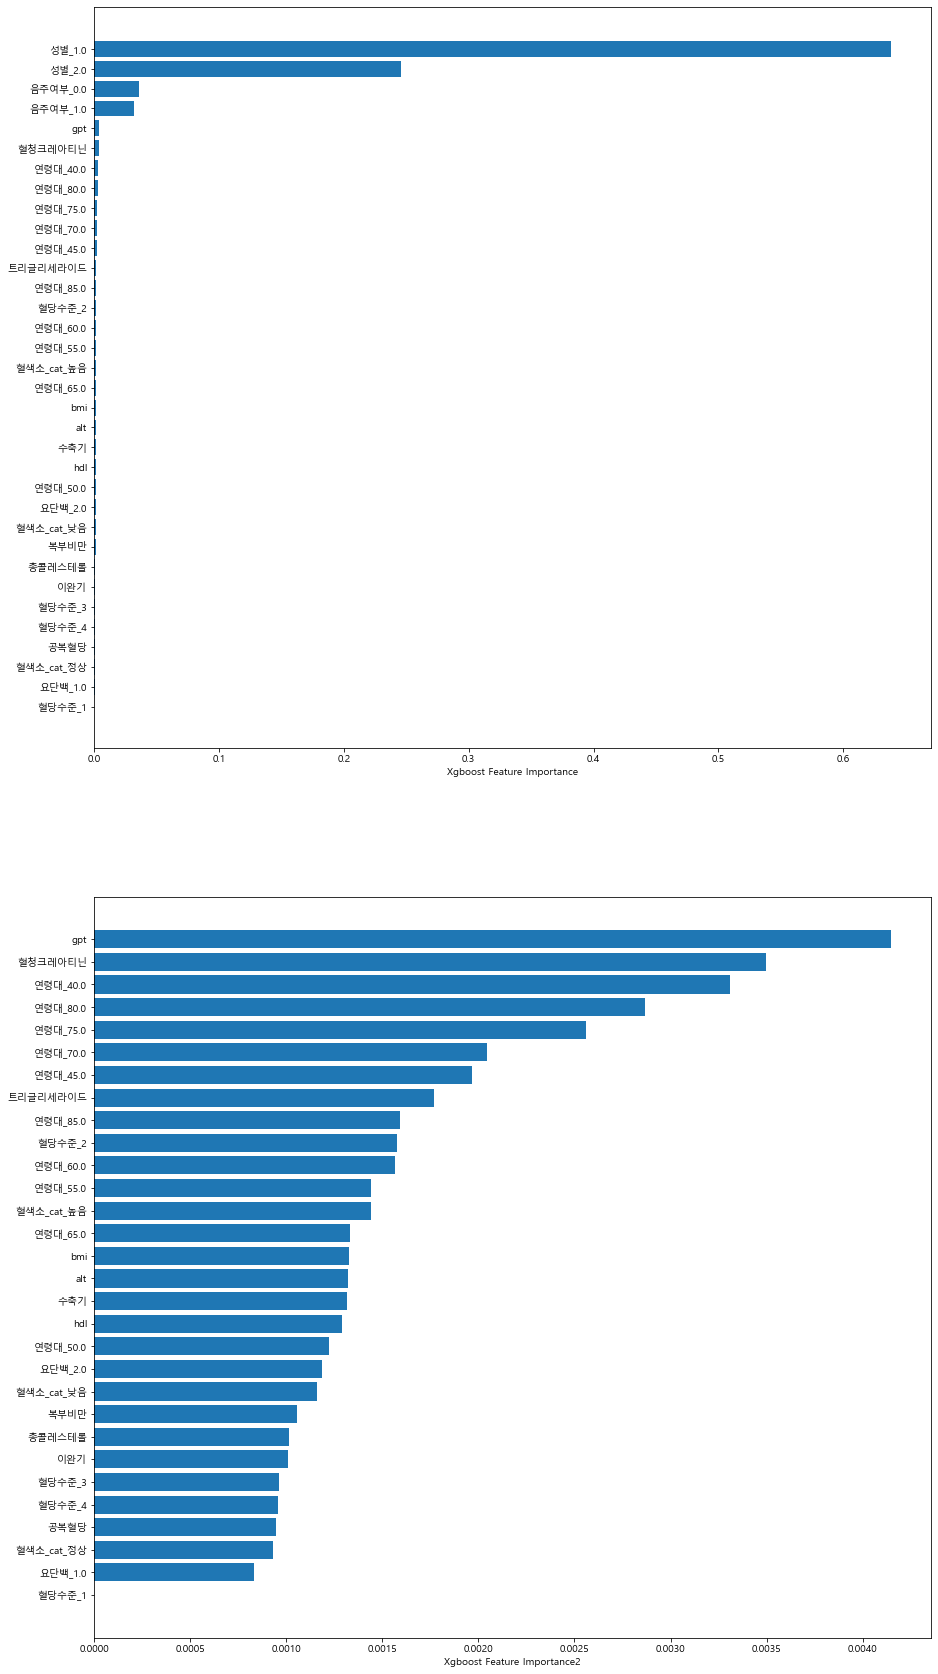

In [235]:
plt.figure(figsize=(15,30))
plt.subplot( 2,1,1 )
sorted_idx1 = model_BO_xgb_tuend1.feature_importances_.argsort()
plt.barh(X_train1.columns[sorted_idx1], model_BO_xgb_tuend1.feature_importances_[sorted_idx1])
plt.xlabel("Xgboost Feature Importance")

plt.subplot( 2,1,2 )
sorted_idx1 = model_BO_xgb_tuend1.feature_importances_.argsort()[0:30]
plt.barh(X_train1.columns[sorted_idx1][0:30], model_BO_xgb_tuend1.feature_importances_[sorted_idx1][0:30])
plt.xlabel("Xgboost Feature Importance2")

plt.show()

성별,음주여부,혈청크레아티닌,gpt 순으로 변수중요도가 높음

요단백,(혈당수준,공복혈당) 더 빼볼만함.

https://zzinnam.tistory.com/entry/XGboost-%EC%A3%BC%EC%9A%94-%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-with-%ED%8C%8C%EC%9D%B4%EC%8D%AC, 참고코드


## Randomforest

튜닝 전

In [236]:
model_rf0 = RandomForestClassifier(n_jobs = -1, random_state=0)
model_rf0.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [237]:
pred_rf_0 = model_rf0.predict(X_valid)

print("Valid Set 결과")
print("accuracy_score : ",round(accuracy_score(Y_valid, pred_rf_0),3))
print("recall_score : ",round(recall_score(Y_valid, pred_rf_0),3))
print("precision_score : ",round(precision_score(Y_valid, pred_rf_0),3))
print("f1_score : ",round(f1_score(Y_valid, pred_rf_0),3))

Valid Set 결과
accuracy_score :  0.819
recall_score :  0.845
precision_score :  0.701
f1_score :  0.766


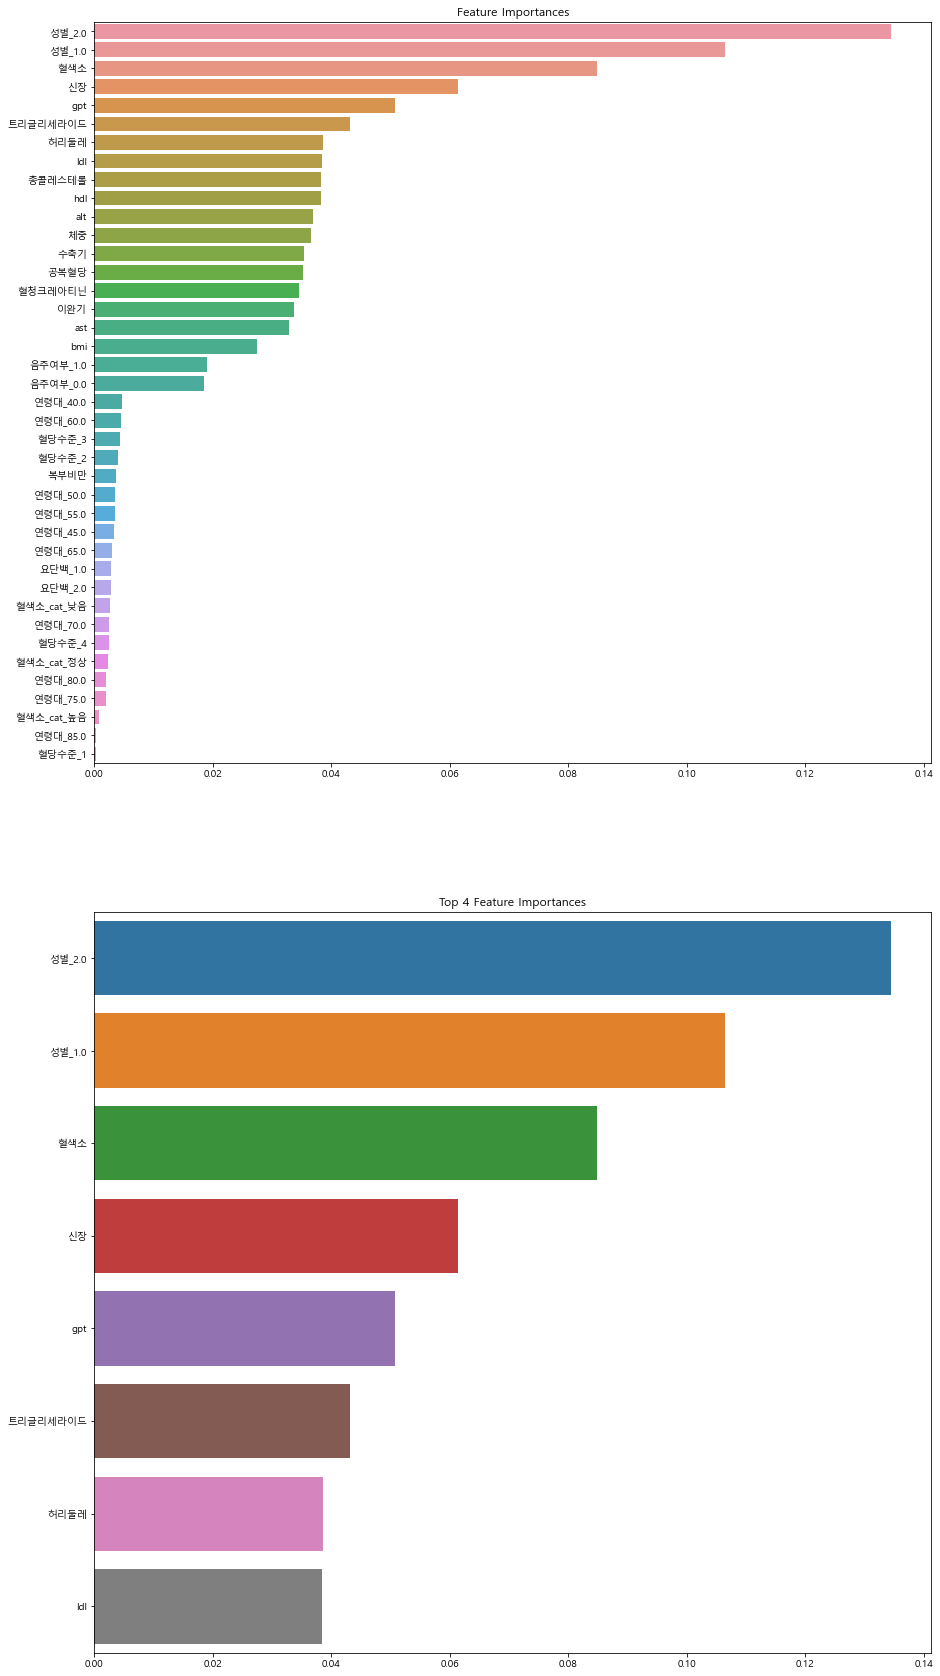

In [238]:
rf0_importances_values = model_rf0.feature_importances_
rf0_importances = pd.Series(rf0_importances_values, index = X_train.columns)
rf0_top8 = rf0_importances.sort_values(ascending=False)[:8]

plt.figure(figsize=(15,30))

plt.subplot( 2,1,1 )
plt.title('Feature Importances')
sns.barplot(x=rf0_importances.sort_values(ascending=False), 
            y=rf0_importances.sort_values(ascending=False).index)

plt.subplot( 2,1,2 )
plt.title('Top 4 Feature Importances')
sns.barplot(x=rf0_top8, y=rf0_top8.index)

plt.show()

연령대,혈색소,요단백,혈당수준,복부비만? 뺄만 해보임

### 변수선택 및 베이지안 최적화

X_train1은 변수선택을 한 df8로 만들어진 데이터프레임

In [239]:
print(X_train1.shape)
print(Y_train1.shape)
print(X_valid1.shape)
print(Y_valid1.shape)

(227250, 34)
(227250,)
(75751, 34)
(75751,)


In [240]:
rf_parameter_bounds = { 'n_estimators' : (80, 300),
           'max_depth' :  (10, 20),
           'min_samples_leaf' : (4, 12),
           'min_samples_split' :  (5, 20)
            }

def rf_bo(n_estimators, max_depth, min_samples_leaf, min_samples_split):
    bo_params = {
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'min_samples_leaf' : int(round(min_samples_leaf)),
        'min_samples_split' : int(round(min_samples_split)),
    }
    
    rf_train_BO = RandomForestClassifier(**bo_params)

    rf_train_BO.fit(X_train1,Y_train1)
    score = accuracy_score(rf_train_BO.predict(X_valid1),Y_valid1)
    return score

In [241]:
BO_rf1 = BayesianOptimization(f = rf_bo, pbounds = rf_parameter_bounds, random_state = 0)

BO_rf1.maximize(init_points = 5, n_iter = 20)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.8218   |  15.49    |  9.722    |  14.04    |  199.9    |
|  2        |  0.8217   |  14.24    |  9.167    |  11.56    |  276.2    |
|  3        |  0.8208   |  19.64    |  7.068    |  16.88    |  196.4    |
|  4        |  0.8212   |  15.68    |  11.4     |  6.066    |  99.17    |
|  5        |  0.8215   |  10.2     |  10.66    |  16.67    |  271.4    |
|  6        |  0.8213   |  15.96    |  10.43    |  15.01    |  192.7    |
|  7        |  0.8212   |  14.47    |  5.046    |  14.59    |  118.8    |
|  8        |  0.8215   |  16.15    |  10.85    |  17.54    |  216.5    |
|  9        |  0.8208   |  19.12    |  6.268    |  15.0     |  98.82    |
|  10       |  0.8215   |  18.46    |  9.934    |  10.17    |  205.7    |
|  11       |  0.8218   |  15.47    |  9.583    |  14.1     |  200.0    |
|  12       |  0.8217   |  16.56    | 

In [242]:
max_params1 = BO_rf1.max['params']
max_params1

{'max_depth': 17.421032798109245,
 'min_samples_leaf': 9.346611777858287,
 'min_samples_split': 13.51507007327338,
 'n_estimators': 199.62239541988583}

In [243]:
max_params1['max_depth'] = int(max_params1['max_depth'])
max_params1['min_samples_leaf'] = int(max_params1['min_samples_leaf'])
max_params1['min_samples_split'] = int(max_params1['min_samples_split'])
max_params1['n_estimators'] = int(max_params1['n_estimators'])
print(max_params1)

{'max_depth': 17, 'min_samples_leaf': 9, 'min_samples_split': 13, 'n_estimators': 199}


In [244]:
model_BO_rf_tuend1 = RandomForestClassifier(**max_params1, n_jobs=-1)

In [245]:
model_BO_rf_tuend1.fit(X_train1, Y_train1)

RandomForestClassifier(max_depth=17, min_samples_leaf=9, min_samples_split=13,
                       n_estimators=199, n_jobs=-1)

In [246]:
pred_rf_1 = model_BO_rf_tuend1.predict(X_valid1)

print("Valid Set 결과")
print("accuracy_score : ",round(accuracy_score(Y_valid1, pred_rf_1),3))
print("recall_score : ",round(recall_score(Y_valid1, pred_rf_1),3))
print("precision_score : ",round(precision_score(Y_valid1, pred_rf_1),3))
print("f1_score : ",round(f1_score(Y_valid1, pred_rf_1),3))

Valid Set 결과
accuracy_score :  0.821
recall_score :  0.863
precision_score :  0.699
f1_score :  0.772


성능이 오히려 향상됐다 

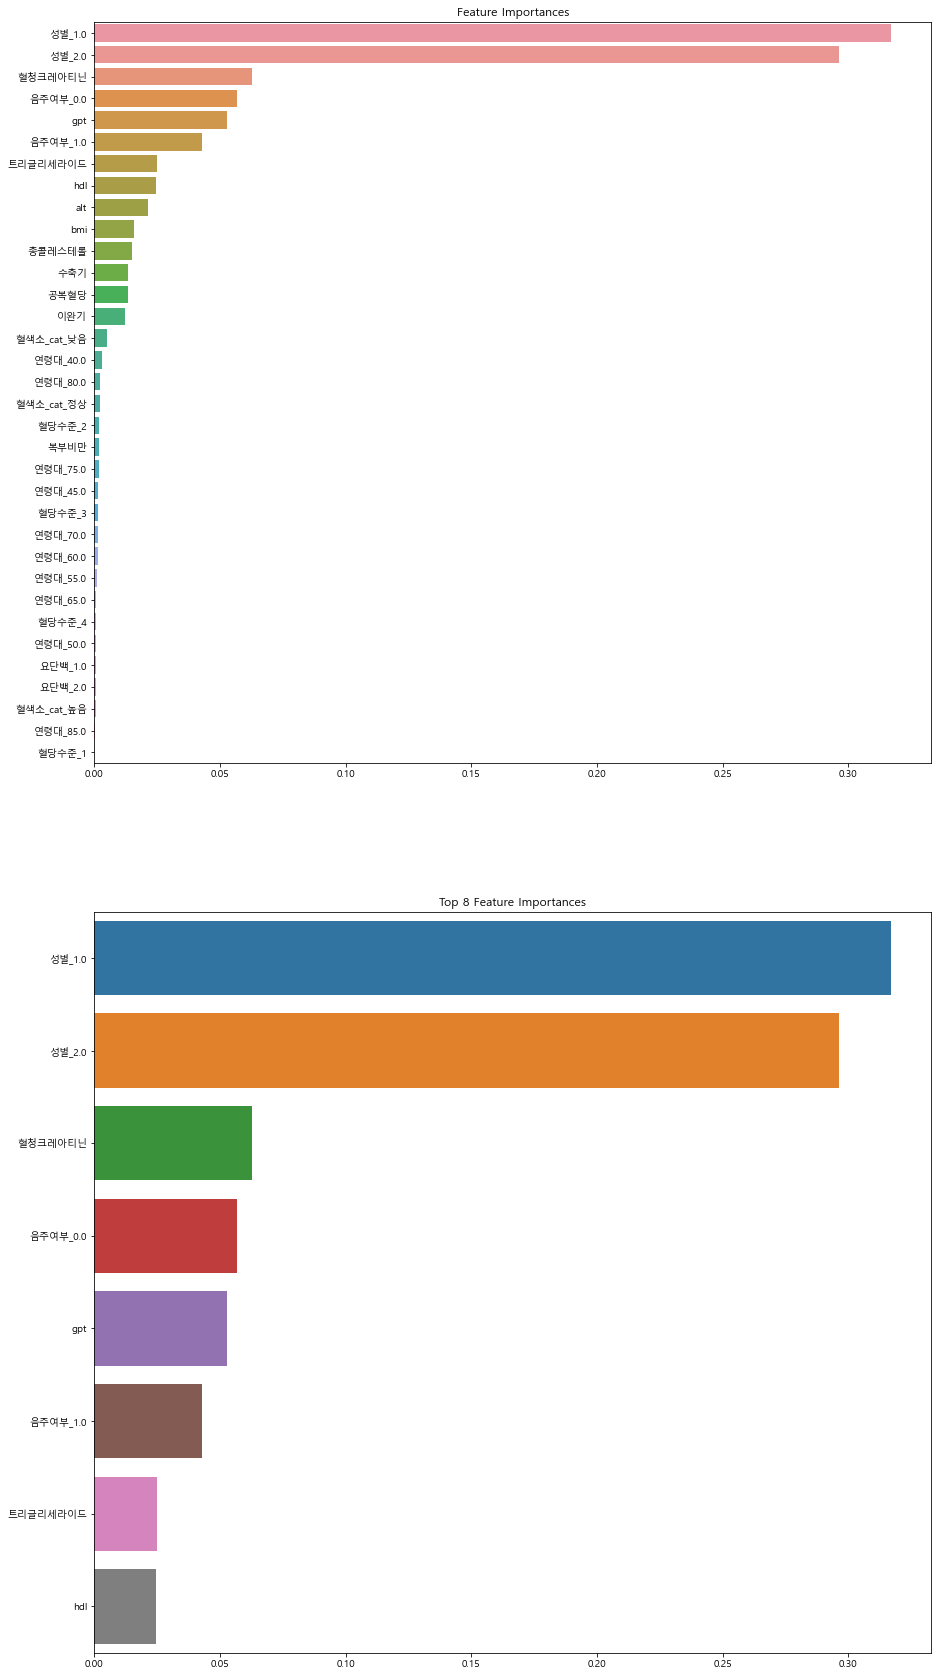

In [251]:
#변수중요도
rf1_importances_values = model_BO_rf_tuend1.feature_importances_
rf1_importances = pd.Series(rf1_importances_values, index = X_train1.columns)
rf1_top8 = rf1_importances.sort_values(ascending=False)[:8]

plt.figure(figsize=(15,30))

plt.subplot( 2,1,1 )
plt.title('Feature Importances')
sns.barplot(x=rf1_importances.sort_values(ascending=False), 
            y=rf1_importances.sort_values(ascending=False).index)

plt.subplot( 2,1,2 )
plt.title('Top 8 Feature Importances')
sns.barplot(x=rf1_top8, y=rf1_top8.index)

plt.show()

- 성별,gpt, 트리글리세라이드, 총콜레스테롤, hdl, 혈청크레아티닌, alt이 변수 중요도가 높은 편
- 혈당,요단백,혈당수준,혈색소_cat는 변수중요도가 낮음

## Logistic Regressor

In [255]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378752 entries, 0 to 378751
Data columns (total 41 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   신장          378752 non-null  float64 
 1   체중          378752 non-null  float64 
 2   허리둘레        378752 non-null  float64 
 3   수축기         378752 non-null  float64 
 4   이완기         378752 non-null  float64 
 5   공복혈당        378752 non-null  float64 
 6   총콜레스테롤      378752 non-null  float64 
 7   트리글리세라이드    378752 non-null  float64 
 8   hdl         378752 non-null  float64 
 9   ldl         378752 non-null  float64 
 10  혈색소         378752 non-null  float64 
 11  혈청크레아티닌     378752 non-null  float64 
 12  ast         378752 non-null  float64 
 13  alt         378752 non-null  float64 
 14  gpt         378752 non-null  float64 
 15  bmi         378752 non-null  float64 
 16  복부비만        378752 non-null  category
 17  성별_1.0      378752 non-null  uint8   
 18  성별_2.0      378752 non-n

In [256]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
tr = df7[['신장','체중','허리둘레','수축기','이완기','공복혈당','총콜레스테롤','트리글리세라이드','혈청크레아티닌','ast','alt','gpt','bmi']]

scaler.fit(tr)
scaler.transform(tr)
scaled_tr = pd.DataFrame(scaler.transform(tr), columns = tr.columns, index = tr.index)
scaled_tr.describe().T

,count,mean,std,min,25%,50%,75%,max
신장,378752.0,0.471013,0.141608,0.0,0.384615,0.461538,0.538462,1.0
체중,378752.0,0.310609,0.116056,0.0,0.238095,0.285714,0.380952,1.0
허리둘레,378752.0,0.419343,0.087027,0.0,0.359091,0.418182,0.474545,1.0
수축기,378752.0,0.470435,0.123698,0.0,0.389831,0.466102,0.550847,1.0
이완기,378752.0,0.534314,0.115662,0.0,0.458824,0.541176,0.600000,1.0
공복혈당,378752.0,0.374636,0.113136,0.0,0.307229,0.349398,0.409639,1.0
총콜레스테롤,378752.0,0.574677,0.158182,0.0,0.463710,0.572581,0.681452,1.0
트리글리세라이드,378752.0,0.239354,0.136031,0.0,0.143133,0.205029,0.297872,1.0
혈청크레아티닌,378752.0,0.418025,0.104302,0.0,0.350000,0.400000,0.500000,1.0
ast,378752.0,0.130391,0.060683,0.0,0.095960,0.116162,0.146465,1.0


#### 일부 변수 삭제
- 신장, 체중 -> 대신 bmi만 사용
- 허리둘레 -> 대신 복부비만도 사용
- 수축기, 이완기 -> 흡연 여부에 따라 큰 차이 보이지 않음
- 공복혈당,혈색소 -> 범주화 한 파생변수만 사용
- ldl -> 총콜레스테롤, hdl, 트리글리세라이드를 이용하여 계산된 값 사용하는 경우 있으므로 삭제

In [283]:
df9=df7.drop(columns=['신장','체중','허리둘레','수축기','이완기','공복혈당','총콜레스테롤','트리글리세라이드','혈청크레아티닌','ast','alt','gpt','bmi'])
df9 = pd.concat([df9, scaled_tr], axis=1)


In [284]:
train3, test3= train_test_split(df9, test_size=0.2, 
                              random_state=0)

In [285]:
X = train3.drop(columns=['흡연'])
y = train3['흡연']

In [286]:
print(X.shape,y.shape)

(303001, 40) (303001,)


In [287]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0, test_size=0.25)

In [288]:
print(X_train.shape,X_valid.shape)

(227250, 40) (75751, 40)


In [289]:
print(y_train.shape,y_valid.shape)

(227250,) (75751,)


In [290]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)
pred = model.predict_proba(X_valid)[:, 1]
y_pred = model.predict(X_valid)

# 성능 확인(AUC) - 주의점. predict_proba로 뽑힌 확률값으로 비교해야 함
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score

print('Accuracy score:', accuracy_score(y_valid, y_pred))
print('Recall score:', recall_score(y_valid, y_pred))
print('F1 score:', f1_score(y_valid, y_pred))
print('Precision score:', precision_score(y_valid, y_pred))
print('ROC AUC score:',roc_auc_score(y_valid, pred))
print('Confusion Matrix:\n', confusion_matrix(y_valid, y_pred))

Accuracy score: 0.8205964277699305
Recall score: 0.8526636339712019
F1 score: 0.7694656488549618
Precision score: 0.7010602454329078
ROC AUC score: 0.8845618907085617
Confusion Matrix:
 [[39481  9671]
 [ 3919 22680]]


F1-score 0.77

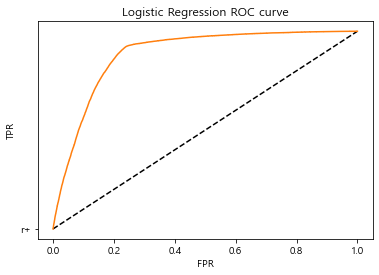

In [291]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_valid, pred)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='LogisticRegression')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Logistic Regression ROC curve')
plt.show()

In [292]:
# 데이터 컬럼에 따른 beta, exp(beta) 체크

column_name = ['const'] + X.columns.tolist()
beta = np.concatenate([model.intercept_, model.coef_.reshape(-1)]).round(2)
odds = np.exp(beta).round(2)
interpret = np.where(beta > 0, 'risky', 'protective')

beta_analysis = pd.DataFrame(np.c_[beta, odds, interpret], index=column_name,columns=['beta', 'exp(beta)', 'interpret'])
beta_analysis

,beta,exp(beta),interpret
const,-0.35,0.7,protective
hdl,-0.0,1.0,protective
ldl,-0.0,1.0,protective
혈색소,0.03,1.03,risky
복부비만,0.1,1.11,risky
성별_1.0,1.45,4.26,risky
성별_2.0,-1.8,0.17,protective
연령대_40.0,0.22,1.25,risky
연령대_45.0,0.34,1.4,risky
연령대_50.0,0.17,1.19,risky


## 최종선택

랜덤포레스트 변수 선택 후, 베이지안 최적화 까지 마친 모델에 test셋 성능 평가 :test1

In [294]:
print(test1.shape)
test1

(75751, 35)


,수축기,이완기,공복혈당,총콜레스테롤,트리글리세라이드,hdl,혈청크레아티닌,alt,gpt,bmi,복부비만,성별_1.0,성별_2.0,연령대_40.0,연령대_45.0,연령대_50.0,연령대_55.0,연령대_60.0,연령대_65.0,연령대_70.0,연령대_75.0,연령대_80.0,연령대_85.0,요단백_1.0,요단백_2.0,음주여부_0.0,음주여부_1.0,혈당수준_1,혈당수준_2,혈당수준_3,혈당수준_4,혈색소_cat_낮음,혈색소_cat_정상,혈색소_cat_높음,흡연
12214,106.0,82.0,102.0,251.0,88.0,74.0,0.5,13.0,14.0,22.9,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
195126,120.0,71.0,135.0,201.0,101.0,54.0,0.8,21.0,17.0,20.8,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
181762,110.0,60.0,95.0,197.0,89.0,56.0,0.8,21.0,21.0,22.9,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
320178,127.0,80.0,103.0,192.0,164.0,42.0,1.2,17.0,7.0,24.2,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
210827,125.0,81.0,82.0,214.0,133.0,41.0,0.9,33.0,53.0,24.2,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97360,112.0,83.0,110.0,218.0,286.0,30.0,1.0,47.0,31.0,27.8,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1
23853,143.0,75.0,93.0,214.0,87.0,62.0,0.5,13.0,18.0,22.2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
350350,120.0,80.0,99.0,187.0,65.0,67.0,1.0,15.0,11.0,18.4,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
131146,132.0,79.0,108.0,149.0,105.0,43.0,1.3,26.0,44.0,26.2,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1


In [295]:
X_test=test1.drop(['흡연'],axis=1)
Y_test=test1['흡연']

In [297]:
pred_rf_final = model_BO_rf_tuend1.predict(X_test)

print("최종 Test Set 결과")
print("accuracy_score : ",round(accuracy_score(Y_test, pred_rf_final),3))
print("recall_score : ",round(recall_score(Y_test, pred_rf_final),3))
print("precision_score : ",round(precision_score(Y_test, pred_rf_final),3))
print("f1_score : ",round(f1_score(Y_test, pred_rf_final),3))

최종 Test Set 결과
accuracy_score :  0.819
recall_score :  0.859
precision_score :  0.696
f1_score :  0.769


In [ ]:
%여기까지입니다!